In [912]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
#import csv

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [913]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df #read the csv file

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

Documentation:
1. 

In [914]:
df.shape #check the shape of the column

(1000, 40)

In [915]:
df.columns #check the all columns of our dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [916]:
df.describe() #check the parameters

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [917]:
df.info() #check the null values and Dtype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [918]:
df.drop(columns='_c39',inplace=True) #drop the column
#This column contains only null values

In [919]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1000, 39)


In [920]:
df.skew() #check the skewness of the dataset

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [921]:
df.duplicated().sum() #check the duplicate rows in our dataset

0

# Column1: months_as_customer 

In [922]:
df['months_as_customer'].unique() #check the unique value

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [923]:
print('Check the zeros in Column:-------->',df['months_as_customer'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['months_as_customer'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['months_as_customer'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.3621768477780205


In [924]:
df['months_as_customer'].value_counts() #check the count of unique values

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

In [925]:
df['months_as_customer'] = df['months_as_customer'].replace(0,df['months_as_customer'].mean())
#replace the zero value by column mean value

In [926]:
df['months_as_customer'].value_counts() #check the count of unique values

194.000    8
128.000    7
285.000    7
254.000    7
101.000    7
          ..
438.000    1
467.000    1
67.000     1
203.954    1
415.000    1
Name: months_as_customer, Length: 391, dtype: int64

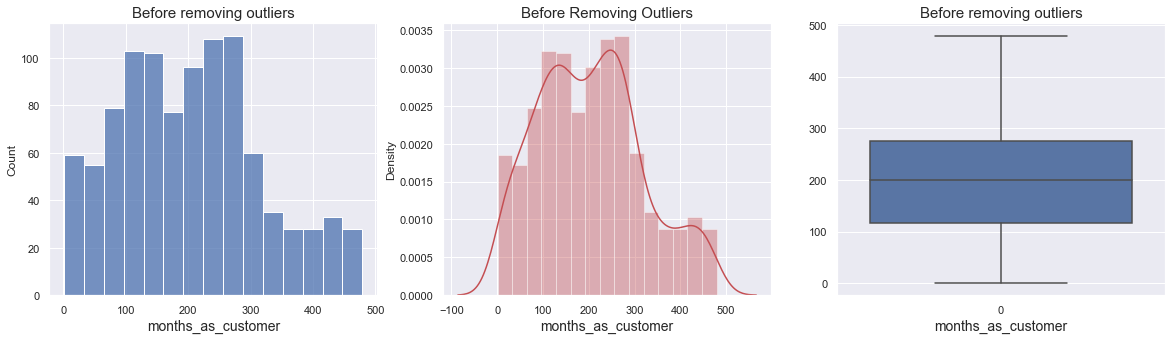

In [927]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['months_as_customer']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('months_as_customer', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['months_as_customer'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('months_as_customer', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['months_as_customer']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('months_as_customer', fontsize= 14)
plt.show()

In [928]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['months_as_customer'].mean())
print('Median of the column:----->',df['months_as_customer'].median())
print('Mode of the column:----->',st.mode(df['months_as_customer']))
print('std of the column:----->',df['months_as_customer'].std())

Mean of the column:-----> 204.157954
Median of the column:-----> 200.0
Mode of the column:-----> 194.0
std of the column:-----> 114.93199039025181


In [929]:
df['months_as_customer']= df['months_as_customer'].replace(194.0,df['months_as_customer'].mean())
#replace the mode value by column mean value

In [930]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['months_as_customer'].mean())
print('Median of the column:----->',df['months_as_customer'].median())
print('Mode of the column:----->',st.mode(df['months_as_customer']))
print('std of the column:----->',df['months_as_customer'].std())

Mean of the column:-----> 204.239217632
Median of the column:-----> 204.0
Mode of the column:-----> 204.157954
std of the column:-----> 114.92836684710356


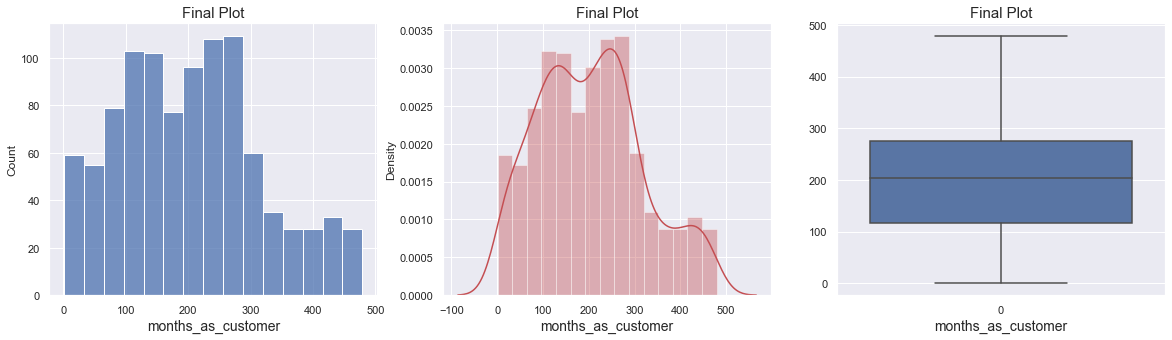

In [931]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['months_as_customer']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('months_as_customer', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['months_as_customer'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('months_as_customer', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['months_as_customer']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('months_as_customer', fontsize= 14)
plt.show()

In [932]:
df['months_as_customer'].skew() #check the improved skewness

0.3620775656746248

In [933]:
df['months_as_customer'][df.fraud_reported=='Y'].value_counts().head(10)

156.0    4
222.0    3
147.0    3
232.0    3
152.0    3
175.0    3
230.0    3
371.0    3
61.0     3
140.0    3
Name: months_as_customer, dtype: int64

Observation:
- DataCleaning
1. Only one zero value is found and it is replaced by column mean value
2. No Null values are found
3. skewness is improved
4. Value of mean, median, mode is improved and Normal curve is improved
5. No outliers found
- Results by EDA
1. We can see, 156 months as customers are more, who claims fraud than others.
2. Maximum peoples are lies between 200-210 months as customers

In [934]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1000, 39)


# Column2: 'age'

In [935]:
#check the unique, zeros, null and skew data
print('Unique Values:-------->\n',df['age'].unique())#check the unique value
time.sleep(1)#delay of 1 sec
print("\n",'*'*50)
time.sleep(1)
print('Check the zeros in Column:-------->',df['age'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['age'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['age'].skew())#check the skewness

Unique Values:-------->
 [48 42 29 41 44 39 34 37 33 61 23 38 58 26 31 62 55 40 35 43 45 25 30 28
 49 54 47 59 27 56 32 36 64 60 51 46 50 57 53 24 52 19 21 63 20 22]

 **************************************************
Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.47898804709224163


In [936]:
df['age'].value_counts() #check the count of unique values

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64

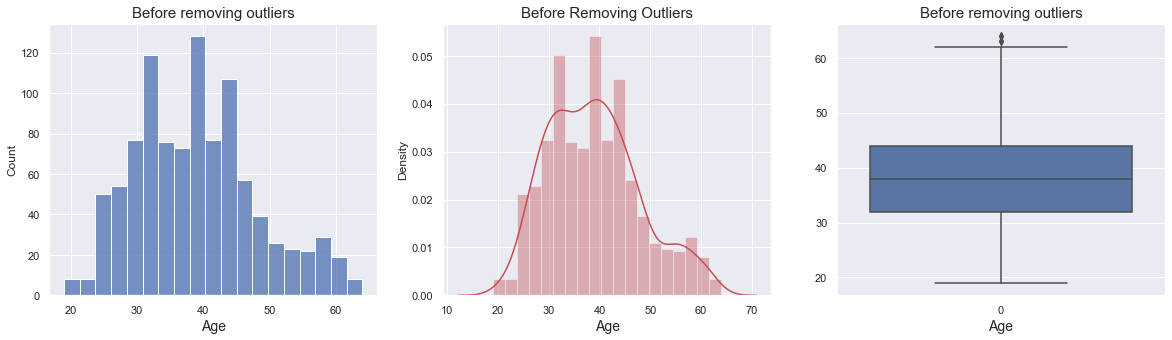

In [937]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['age']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['age'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['age']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

In [938]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['age'].mean())
print('Median of the column:----->',df['age'].median())
print('Mode of the column:----->',st.mode(df['age']))
print('std of the column:----->',df['age'].std())

Mean of the column:-----> 38.948
Median of the column:-----> 38.0
Mode of the column:-----> 43
std of the column:-----> 9.140286693580283


In [939]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['age'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['age'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['age'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['age'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 12.0

 **************************************************
Higher range:-
 (array([ 20,  67, 203, 538, 588, 712, 947, 998], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [940]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1000, 39)
New Shape:------>  (992, 39)


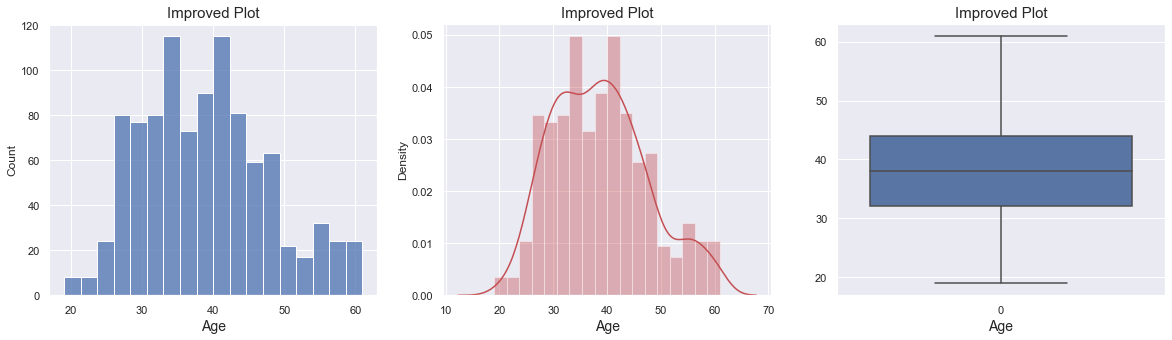

In [941]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['age']) #visualize the outliers by using histplot
plt.title('Improved Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['age'], color='r') #visualize the normalization curve by using distplot
plt.title('Improved Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['age']) #visualize the outliers by using boxplot
plt.title('Improved Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

In [942]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['age'].mean())
print('Median of the column:----->',df['age'].median())
print('Mode of the column:----->',st.mode(df['age']))
print('std of the column:----->',df['age'].std())

Mean of the column:-----> 38.756048387096776
Median of the column:-----> 38.0
Mode of the column:-----> 43
std of the column:-----> 8.922073428189174


In [943]:
df['age'] = df['age'].replace(43,df['age'].mean())
#mean, median, mode values are still not good
#so, we replace mode value by column mean values

In [944]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['age'].mean())
print('Median of the column:----->',df['age'].median())
print('Mode of the column:----->',st.mode(df['age']))
print('std of the column:----->',df['age'].std()) #now, values are looking good

Mean of the column:-----> 38.54641771266914
Median of the column:-----> 38.0
Mode of the column:-----> 38.756048387096776
std of the column:-----> 8.869545913588395


In [945]:
print('Check the skewness in Column:---------->',df['age'].skew())#check the skewness

Check the skewness in Column:----------> 0.5030189171777898


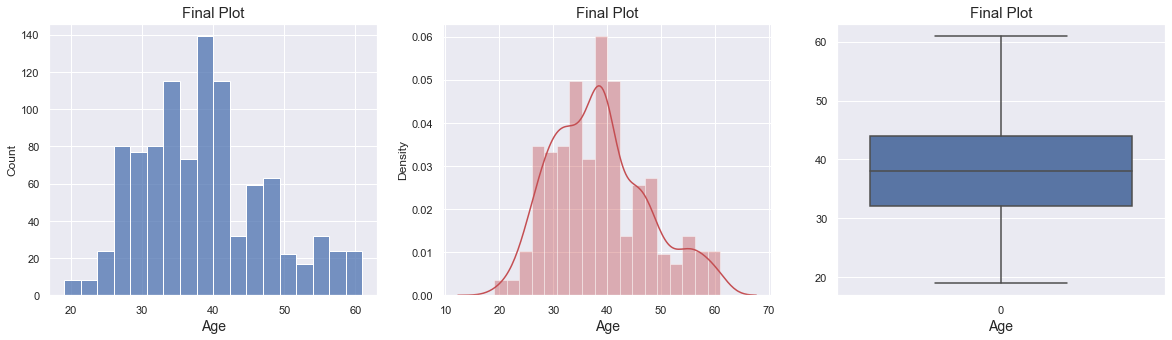

In [946]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['age']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['age'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['age']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Age', fontsize= 14)
plt.show()

Text(0.5, 1.0, 'Plot1: age vs fraud_reported')

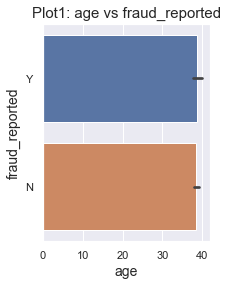

In [947]:
#visualize this column by Barplot
plt.figure(figsize=(3,4))
sns.barplot(x = 'age',y= 'fraud_reported', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('age', fontsize = 14)
plt.title('Plot1: age vs fraud_reported', fontsize = 15)

In [948]:
df.groupby('age')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between age and fraud_reported

age   fraud_reported
61.0  Y                 3
      N                 7
60.0  Y                 4
      N                 5
59.0  Y                 1
                       ..
23.0  N                 3
22.0  Y                 1
21.0  N                 6
20.0  N                 1
19.0  Y                 1
Name: fraud_reported, Length: 81, dtype: int64

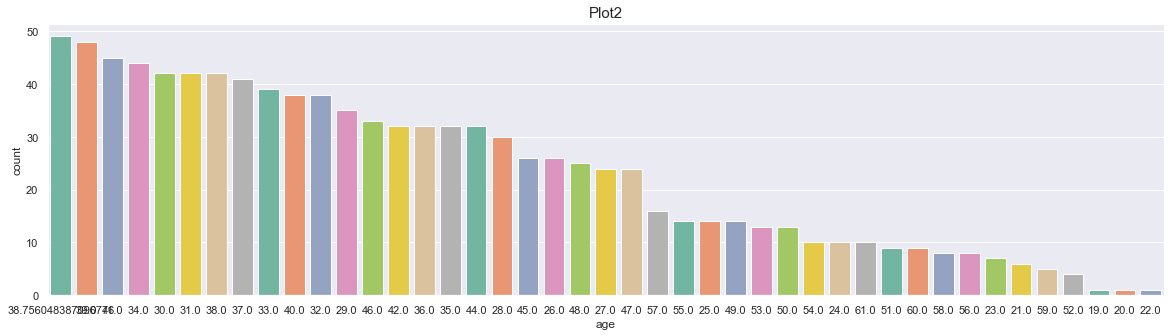

In [949]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="age",palette="Set2", data=df, order = df["age"].value_counts().index)
plt.title('Plot2', fontsize=15)
plt.show()

In [950]:
df['age'][df.fraud_reported=='Y'].value_counts().head(10)
#relationship between age and fraud_reported

41.000000    16
31.000000    14
34.000000    13
33.000000    12
38.756048    11
32.000000    11
38.000000    11
37.000000    10
39.000000    10
29.000000    10
Name: age, dtype: int64

Text(0.5, 1.0, 'Plot3: age vs months as customers')

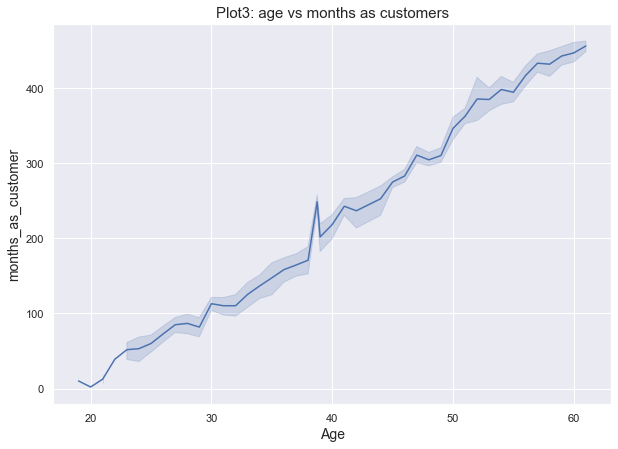

In [951]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(y= 'months_as_customer',x= 'age', data=df)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('months_as_customer', fontsize = 14)
plt.title('Plot3: age vs months as customers', fontsize = 15)

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. skewness is improved
4. Value of mean, median, mode is improved and Normal curve is improved
5. Outliers are removed
- Results by EDA
1. We can see, In Plot1, Normally the age of these kinds of fraud or not are around 35-45
2. In Plot2, Maximum peoples are ther age of 35-40 somewhere
3. if we see carefully the relationship the fraudulent peoples are more at the age of 41
4. In Plot3, As Age increases, the number of months as customers are increases, we see alomost linear curve.

In [952]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (992, 39)


# Columns3: policy_number

In [953]:
print('Unique Values:-------->\n',df['policy_number'].unique())#check the unique value

Unique Values:-------->
 [521585 342868 687698 227811 367455 104594 413978 429027 485665 636550
 543610 214618 842643 626808 644081 892874 558938 275265 921202 143972
 431876 285496 115399 736882 699044 863236 608513 914088 596785 908616
 666333 336614 584859 990493 129872 200152 933293 485664 982871 206213
 616337 448961 790442 108844 430029 529112 939631 866931 582011 691189
 537546 394975 729634 282195 420810 524836 307195 623648 485372 598554
 303987 343161 519312 132902 332867 356590 500533 348209 486676 260845
 657045 761189 175177 116700 166264 527945 627540 279422 484200 645258
 694662 960680 498140 498875 798177 614763 679370 958857 686816 127754
 918629 731450 307447 992145 900628 235220 740019 246882 797613 193442
 389238 760179 939905 872814 632627 283414 163161 853360 776860 149367
 395269 981123 143626 648397 154982 330591 319232 531640 368050 253791
 155724 824540 717392 965768 414779 428230 517240 469874 718428 620215
 618659 649082 437573 964657 932502 434507 935277 75

In [954]:
print('Check the zeros in Column:-------->',df['policy_number'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['policy_number'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['policy_number'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.04068895106085554


In [955]:
df['policy_number'].duplicated().sum() #check there is any duplicate policy number or not

0

Observation:
- Data Cleaning
1. No zero values are found
2. No Null values are found
3. No duplicate values are found, it means all policy numbers are unique
4. Less skewness found, which is good for our modal

In [956]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (992, 39)


# Columns4: policy_bind_date

In [957]:
df['policy_bind_date'].unique()#check the unique value

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '27-11-2005', '27-05-1994', '08-02-1991', '02-02-1996',
       '05-12-2013', '20-09-1990', '18-07-2002', '08-02-1990',
       '04-03-2014', '18-02-2000', '19-06-2008', '01-08-2003',
       '04-04-1992', '13-01-1991', '08-08-2010', '09-03-2003',
       '03-02-1993', '25-11-2002', '27-07-1997', '08-05-1995',
       '30-08-2012', '30-04-2006', '13-04-2003', '05-12-2007',
       '21-08-2006', '08-01-1990', '18-03-1990', '07-01-2008',
       '10-03-1997', '10-01-2004', '20-08-1994', '02-06-2002',
       '28-04-1994', '17-08-2014', '11-08-2007', '20-11-2008',
       '18-10-1995', '19-05-1993', '26-02-2005', '14-02-1990',
       '30-09-1993', '10-06-2014', '28-10-2008', '24-04

In [958]:
#divide the date, month, years into three columns.
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Policy_bind_Month']=df['policy_bind_date'].apply(lambda x:x.month)
df['Policy_bind_Day']=df['policy_bind_date'].apply(lambda x:x.day)
df['Policy_bind_Years']=df['policy_bind_date'].apply(lambda x:x.year)

In [959]:
df.columns #check the columns now

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Policy_bind_Month',
       'Policy_bind_Day', 'Policy_bind_Years'],
      dtype='object')

In [960]:
df.drop(columns='policy_bind_date', inplace = True) #drop the orignal column

In [961]:
#check the unique, zeros, null and skew data
print("Check the 'Policy_bind_Day' column")
print("\n",'*'*50)
time.sleep(1)
print('Unique Values:-------->\n',df['Policy_bind_Day'].unique())#check the unique value
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the zeros in Column:-------->',df['Policy_bind_Day'].all())#check the zero values
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['Policy_bind_Day'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['Policy_bind_Day'].skew())#check the skewness

Check the 'Policy_bind_Day' column

 **************************************************
Unique Values:-------->
 [17 27  9 25  6 10  2 26 29 20 28 19 15  8 12 18  3  4 13  5 30 21  1 14
 24 22 11  7 31 23 16]

 **************************************************
Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.03391991078979898


In [962]:
#check the unique, zeros, null and skew data
print("Check the 'Policy_bind_Month' column")
print("\n",'*'*50)
time.sleep(1)
print('Unique Values:-------->\n',df['Policy_bind_Month'].unique())#check the unique value
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the zeros in Column:-------->',df['Policy_bind_Month'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['Policy_bind_Month'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['Policy_bind_Month'].skew())#check the skewness

Check the 'Policy_bind_Month' column

 **************************************************
Unique Values:-------->
 [10  6  5 12  4  3  7 11  8  2  9  1]

 **************************************************
Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.0265718006321065


In [963]:
#check the unique, zeros, null and skew data
print("Check the 'Policy_bind_Years' column")
print("\n",'*'*50)
time.sleep(1)
print('Unique Values:-------->\n',df['Policy_bind_Years'].unique())#check the unique value
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the zeros in Column:-------->',df['Policy_bind_Years'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['Policy_bind_Years'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['Policy_bind_Years'].skew())#check the skewness

Check the 'Policy_bind_Years' column

 **************************************************
Unique Values:-------->
 [2014 2006 2000 1990 1997 2011 2002 1999 2012 1998 1992 2005 2004 1994
 1991 1996 2013 2008 2003 2010 1993 1995 2007 2001 2009 2015]

 **************************************************
Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.060470015940890846


In [964]:
df['Policy_bind_Day'].value_counts() #check the count of unique values

28    48
12    44
2     44
8     41
21    40
18    39
16    37
3     37
29    36
25    35
7     35
1     34
11    34
19    33
10    32
20    32
15    31
14    31
4     31
17    30
24    30
27    30
5     29
6     28
23    26
30    25
13    24
22    23
9     23
26    19
31    11
Name: Policy_bind_Day, dtype: int64

In [965]:
df['Policy_bind_Month'].value_counts() #check the count of unique values

7     96
11    90
9     87
4     86
5     84
6     82
1     80
8     80
3     79
10    79
12    75
2     74
Name: Policy_bind_Month, dtype: int64

In [966]:
df['Policy_bind_Years'].value_counts() #check the count of unique values

1991    55
2002    49
1992    48
1990    47
1997    44
2014    43
1996    43
2006    41
1994    41
2009    41
2001    41
1999    40
2007    40
2005    40
1995    39
2010    38
2003    37
2004    36
2013    35
2012    34
2008    33
1993    33
2011    31
2000    30
1998    30
2015     3
Name: Policy_bind_Years, dtype: int64

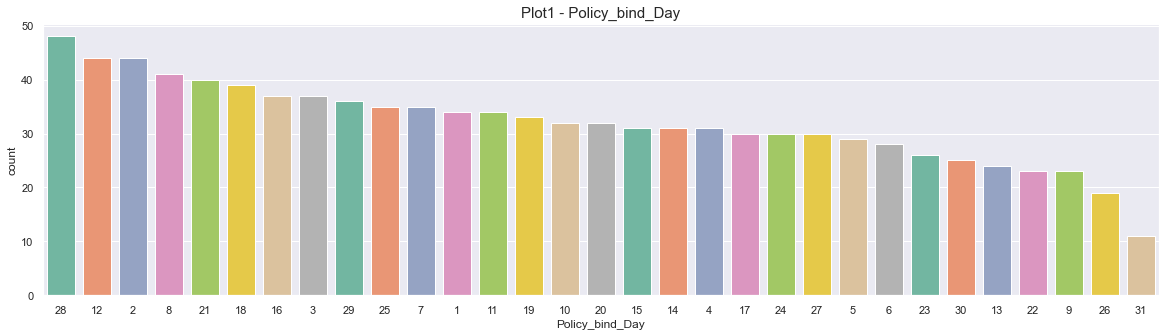

In [967]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Policy_bind_Day",palette="Set2", data=df, order = df["Policy_bind_Day"].value_counts().index)
plt.title('Plot1 - Policy_bind_Day', fontsize=15)
plt.show()

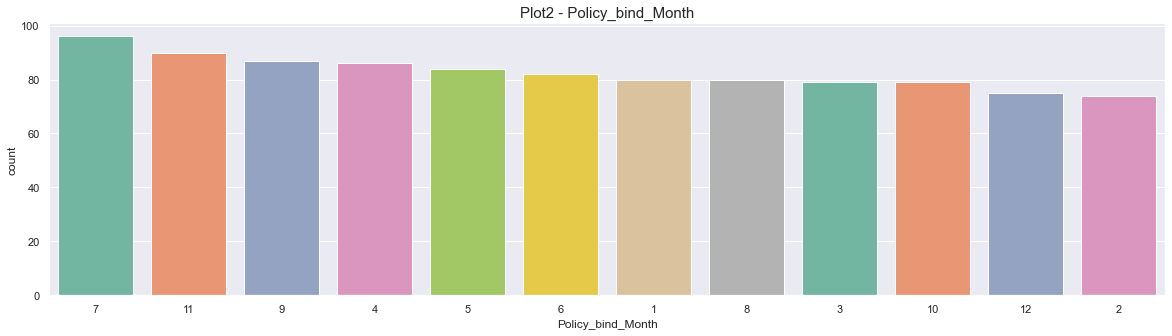

In [968]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Policy_bind_Month",palette="Set2", data=df, order = df["Policy_bind_Month"].value_counts().index)
plt.title('Plot2 - Policy_bind_Month', fontsize=15)
plt.show()

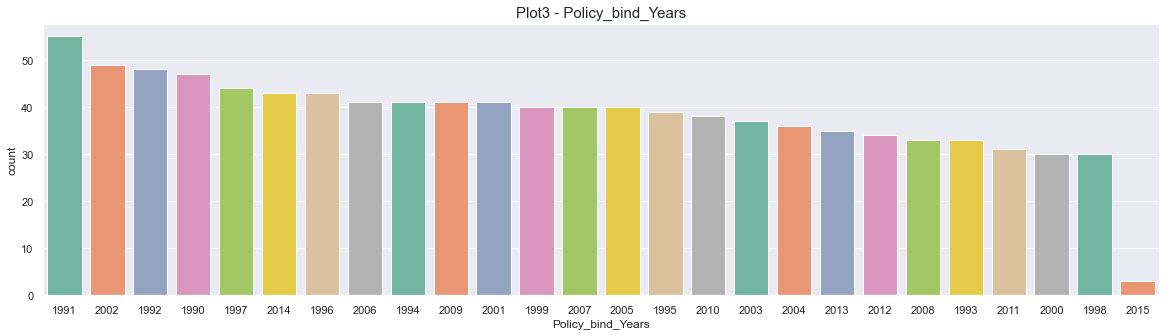

In [969]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Policy_bind_Years",palette="Set2", data=df, order = df["Policy_bind_Years"].value_counts().index)
plt.title('Plot3 - Policy_bind_Years', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Plot1: Policy_bind_Years vs fraud_reported')

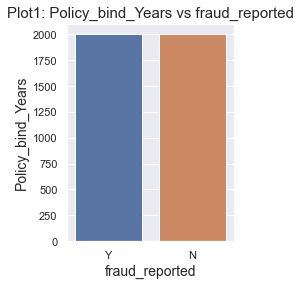

In [970]:
#visualize this column by Barplot
plt.figure(figsize=(3,4))
sns.barplot(y= 'Policy_bind_Years',x= 'fraud_reported', data=df)
plt.xlabel('fraud_reported', fontsize = 14)
plt.ylabel('Policy_bind_Years', fontsize = 14)
plt.title('Plot1: Policy_bind_Years vs fraud_reported', fontsize = 15)

In [971]:
df.groupby('Policy_bind_Years')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between Policy_bind_Years and fraud_reported

Policy_bind_Years  fraud_reported
2015               N                  3
2014               Y                 11
                   N                 32
2013               Y                  8
                   N                 27
2012               Y                 14
                   N                 20
2011               Y                  7
                   N                 24
2010               Y                  7
                   N                 31
2009               Y                  6
                   N                 35
2008               Y                 10
                   N                 23
2007               Y                  9
                   N                 31
2006               Y                  9
                   N                 32
2005               Y                  7
                   N                 33
2004               Y                  9
                   N                 27
2003               Y                 12
      

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. skewness is less

- Results by EDA
1. We can see, In Plot1, 28th day is more in number
2. In Plot2, 7th month is more in number
3. In Plot3, The count of year 1991 is more in numbers

In [972]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (992, 41)


# Columns5:  policy_state

In [973]:
df['policy_state'].unique() #check the unique values

array(['OH', 'IN', 'IL'], dtype=object)

In [974]:
df['policy_state'].value_counts() #check the count of unique numbers

OH    350
IL    334
IN    308
Name: policy_state, dtype: int64

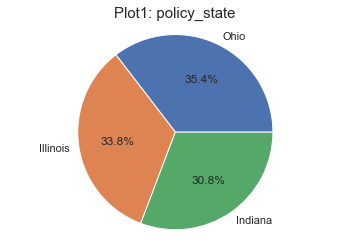

In [975]:
#visualize by using pieplot
Values = [350,334,304]
my_labels = 'Ohio','Illinois','Indiana'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: policy_state', fontsize=15)
plt.axis('equal')
plt.show()

Where: 
- OH - Ohio
- IL - Illinois
- IN - Indiana

Text(0.5, 1.0, 'Plot1: Policy_state vs age')

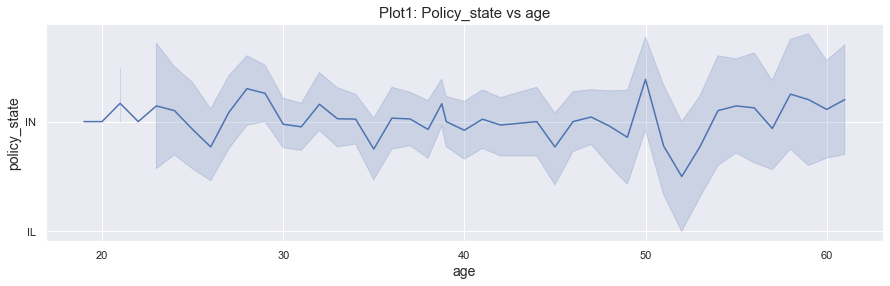

In [976]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'policy_state',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('policy_state', fontsize = 14)
plt.title('Plot1: Policy_state vs age', fontsize = 15)

In [977]:
df.groupby('age')['policy_state'].value_counts().sort_index(ascending=False).head(50)
#check the relationship between policy_state and age

age   policy_state
61.0  OH               4
      IN               4
      IL               2
60.0  OH               3
      IN               4
      IL               2
59.0  OH               2
      IN               2
      IL               1
58.0  OH               3
      IN               4
      IL               1
57.0  OH               5
      IN               5
      IL               6
56.0  OH               3
      IN               3
      IL               2
55.0  OH               6
      IN               4
      IL               4
54.0  OH               4
      IN               3
      IL               3
53.0  OH               4
      IN               2
      IL               7
52.0  IN               2
      IL               2
51.0  OH               2
      IN               3
      IL               4
50.0  OH               8
      IN               2
      IL               3
49.0  OH               4
      IN               4
      IL               6
48.0  OH               9
      

In [978]:
df.groupby('policy_state')['fraud_reported'].value_counts(normalize = True ).sort_index(ascending=False)
#check the relationship between policy_state and fraud_reported

policy_state  fraud_reported
OH            Y                 0.257143
              N                 0.742857
IN            Y                 0.256494
              N                 0.743506
IL            Y                 0.227545
              N                 0.772455
Name: fraud_reported, dtype: float64

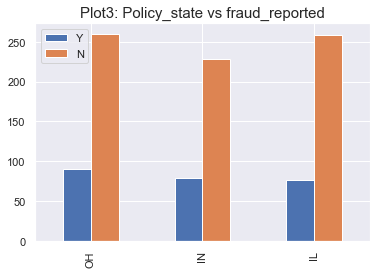

In [979]:
#visualize by using barplot
df_fraud_reported = {'Y': [90, 79, 76],
        'N': [260, 229, 258] }
df1 = pd.DataFrame(df_fraud_reported,columns=['Y','N'], index = ['OH','IN','IL'])
df1.plot.bar()
plt.title('Plot3: Policy_state vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. There are only 3 categories in this column OH, IN,IL
1. We can see, In Plot1, Policies are more in OH than others
2. In Plot2 and the relationship between 'age' & 'policy_state'- policies are taking more policies in their 47-50 age
3. In Plot3 and the relationship between Policy_state vs fraud_reported - maximum peoples are not fraudulent but peoples in Ohio claims fraud more than others

In [980]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (992, 41)


# Columns6: policy_csl

In [981]:
df['policy_csl'].unique()#check the unique values

array(['250/500', '100/300', '500/1000'], dtype=object)

In [982]:
df['policy_csl'].value_counts()#check the count of unique numbers

100/300     348
250/500     345
500/1000    299
Name: policy_csl, dtype: int64

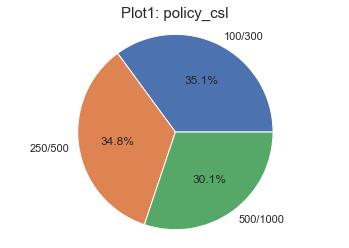

In [983]:
#visualize by using pieplot
Values = [348,345,299]
my_labels = '100/300','250/500','500/1000'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: policy_csl', fontsize=15)
plt.axis('equal')
plt.show()

In [984]:
df.groupby('policy_csl')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between policy_csl and fraud_reported

policy_csl  fraud_reported
500/1000    Y                  65
            N                 234
250/500     Y                  90
            N                 255
100/300     Y                  90
            N                 258
Name: fraud_reported, dtype: int64

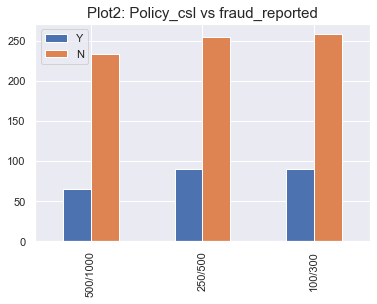

In [985]:
#visualize by using barplot
df_fraud_reported = {'Y': [65, 90, 90],
        'N': [234, 255, 258] }
df1 = pd.DataFrame(df_fraud_reported,columns=['Y','N'], index = ['500/1000','250/500','100/300'])
df1.plot.bar()
plt.title('Plot2: Policy_csl vs fraud_reported', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Plot3: Policy_csl vs age')

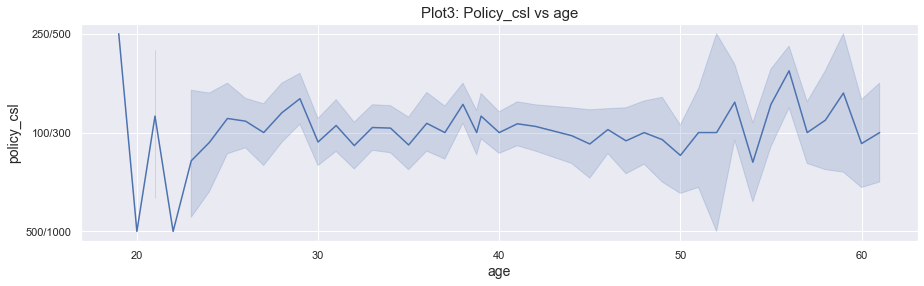

In [986]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'policy_csl',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('policy_csl', fontsize = 14)
plt.title('Plot3: Policy_csl vs age', fontsize = 15)

Observation:
- Results by EDA
1. There are only 3 categories in this column '500/1000','250/500','100/300'
2. We can see, In Plot1, Policy csl of 100/300 are more than others
3. In Plot2 and the relationship between Policy_state vs fraud_reported - maximum peoples are not fraudulent but  in '250/500 and'100/300' csl claim fraud more than others
4. In Plot3 and the relationship between 'age' & 'policy_csl'- At the age of 50-55, 250/500 csl are more but at the age of 20-25, 500/1000 are more

In [987]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (992, 41)


# Columns7: policy_deductable

In [988]:
df['policy_deductable'].unique() #check the unique values

array([1000, 2000,  500], dtype=int64)

In [989]:
#check the unique, zeros, null and skew data
print('Unique Values:-------->',df['policy_deductable'].unique())#check the unique value
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the zeros in Column:-------->',df['policy_deductable'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['policy_deductable'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['policy_deductable'].skew())#check the skewness

Unique Values:--------> [1000 2000  500]

 **************************************************
Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.47203499123125264


In [990]:
df['policy_deductable'].value_counts() #check the counts of unique values

1000    348
500     338
2000    306
Name: policy_deductable, dtype: int64

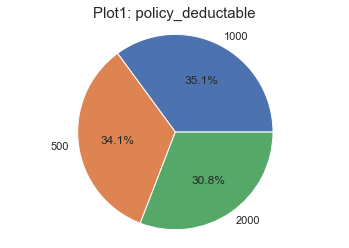

In [991]:
#visualize by using pieplot
Values = [348,338,306]
my_labels = '1000','500','2000'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: policy_deductable', fontsize=15)
plt.axis('equal')
plt.show()

In [992]:
df.groupby('policy_deductable')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between policy_deductable and fraud_reported

policy_deductable  fraud_reported
2000               Y                  81
                   N                 225
1000               Y                  77
                   N                 271
500                Y                  87
                   N                 251
Name: fraud_reported, dtype: int64

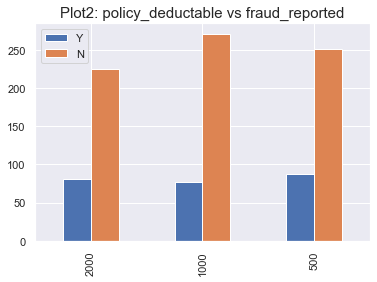

In [993]:
#visualize by using barplot
df_fraud_reported = {'Y': [81, 77, 87],
        'N': [225, 271, 251] }
df1 = pd.DataFrame(df_fraud_reported,columns=['Y','N'], index = ['2000','1000','500'])
df1.plot.bar()
plt.title('Plot2: policy_deductable vs fraud_reported', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Plot3: policy_deductable vs age')

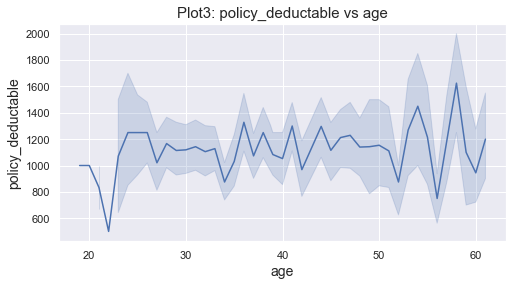

In [994]:
#visualize this column by lineplot
plt.figure(figsize=(8,4))
sns.lineplot(y= 'policy_deductable',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('policy_deductable', fontsize = 14)
plt.title('Plot3: policy_deductable vs age', fontsize = 15)

In [995]:
df.groupby('policy_deductable')['policy_state'].value_counts().sort_index(ascending=False)
#check the relationship between policy_deductable and policy_state

policy_deductable  policy_state
2000               OH              116
                   IN               84
                   IL              106
1000               OH              117
                   IN              115
                   IL              116
500                OH              117
                   IN              109
                   IL              112
Name: policy_state, dtype: int64

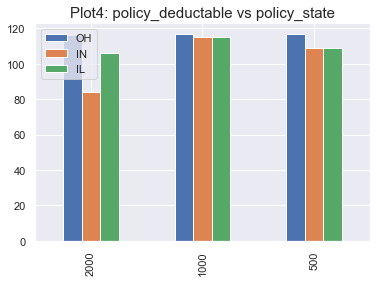

In [996]:
#visualize by using barplot
df_fraud_reported = {'OH': [116, 117, 117],
        'IN': [84, 115, 109], 'IL':[106,115,109] }
df1 = pd.DataFrame(df_fraud_reported,columns=['OH','IN','IL'], index = ['2000','1000','500'])
df1.plot.bar()
plt.title('Plot4: policy_deductable vs policy_state', fontsize = 15)
plt.show()

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. skewness is less

- Results by EDA
1. We can see, In Plot1, policy_deductable 1000 is more in number
2. In Plot2, 500 deduction is more in claiming fraud
3. In Plot3, At the age of 50-60, deductable amount is more than other age group
4. In Plot4, peoples of Ohio is more in number in terms of policy_deductable.

In [997]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (992, 41)


# Columns8: policy_annual_premium

In [998]:
df['policy_annual_premium'].unique() #check the unique values

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73,  875.15,
        972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07, 1291.7 ,
       1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68, 1334.15,
        988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66, 1475.93,
        538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87, 1245.89,
       1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57, 1082.49,
       1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51, 1848.81,
       1641.73, 1362.87, 1239.22, 1061.33, 1279.08, 1105.49, 1055.53,
        895.83, 1632.93, 1405.99, 1425.54, 1038.09, 1307.11, 1489.24,
        976.67, 1340.43, 1267.81, 1234.2 , 1318.06,  769.95, 1514.72,
        873.64, 1612.43, 1318.24, 1226.83, 1326.44, 1136.83, 1322.78,
       1483.25, 1515.3 , 1075.18, 1690.27, 1352.83, 1148.73,  969.5 ,
       1463.82, 1474

In [999]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['policy_annual_premium'].all())
time.sleep(1)#check the zero value in column
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['policy_annual_premium'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['policy_annual_premium'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.0006952312406245185


In [1000]:
df['policy_annual_premium'].value_counts() #check the counts of unique values

1073.83    2
1074.07    2
1374.22    2
1362.87    2
1558.29    2
          ..
1616.65    1
793.15     1
1217.84    1
1185.44    1
1337.56    1
Name: policy_annual_premium, Length: 983, dtype: int64

In [1001]:
df['policy_annual_premium'].duplicated().sum() #check the duplicate values

9

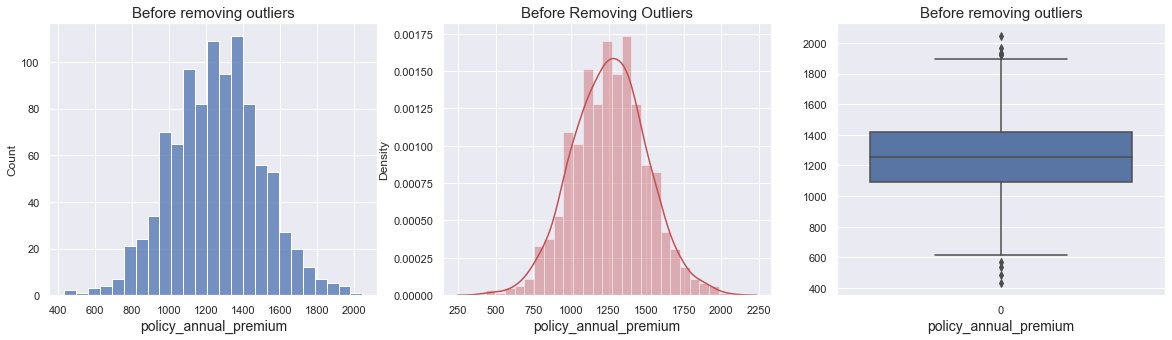

In [1002]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['policy_annual_premium']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['policy_annual_premium'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['policy_annual_premium']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)
plt.show()

In [1003]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['policy_annual_premium'].mean())
print('Median of the column:----->',df['policy_annual_premium'].median())
print('Mode of the column:----->',st.mode(df['policy_annual_premium']))
print('std of the column:----->',df['policy_annual_premium'].std())

Mean of the column:-----> 1257.3891431451627
Median of the column:-----> 1257.5949999999998
Mode of the column:-----> 1215.36
std of the column:-----> 244.31108687801154


In [1004]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['policy_annual_premium'], 30,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['policy_annual_premium'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['policy_annual_premium'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['policy_annual_premium'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 290.77499999999986

 **************************************************
Higher range:-
 (array([131, 226, 473, 483, 540, 691, 741, 790, 872, 964], dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 42, 245, 264, 376, 596, 623, 653, 676, 727, 757], dtype=int64),)


In [1005]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (992, 41)
New Shape:------>  (972, 41)


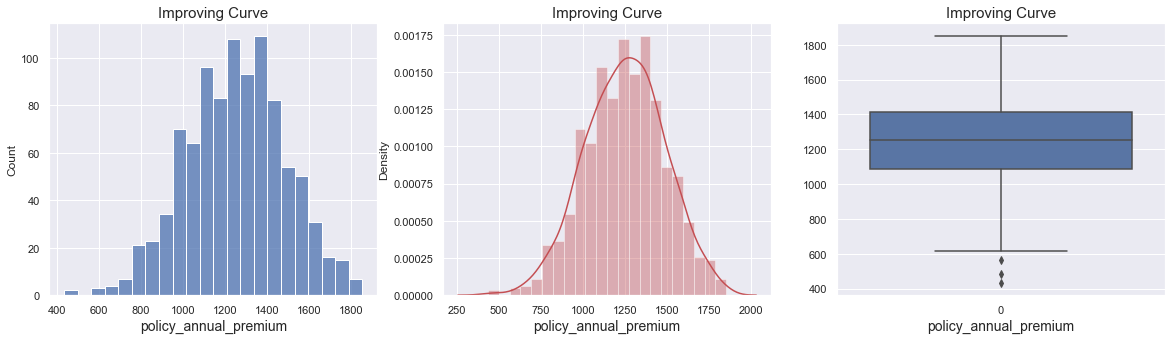

In [1006]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['policy_annual_premium']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['policy_annual_premium'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['policy_annual_premium']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)
plt.show()

In [1007]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['policy_annual_premium'], 30,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['policy_annual_premium'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['policy_annual_premium'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['policy_annual_premium'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 286.91499999999996

 **************************************************
Higher range:-
 (array([ 61, 861], dtype=int64),)

 **************************************************
Lower range:- 
 (array([242, 260, 371, 587, 613, 642, 664, 713, 741], dtype=int64),)


In [1008]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (972, 41)
New Shape:------>  (961, 41)


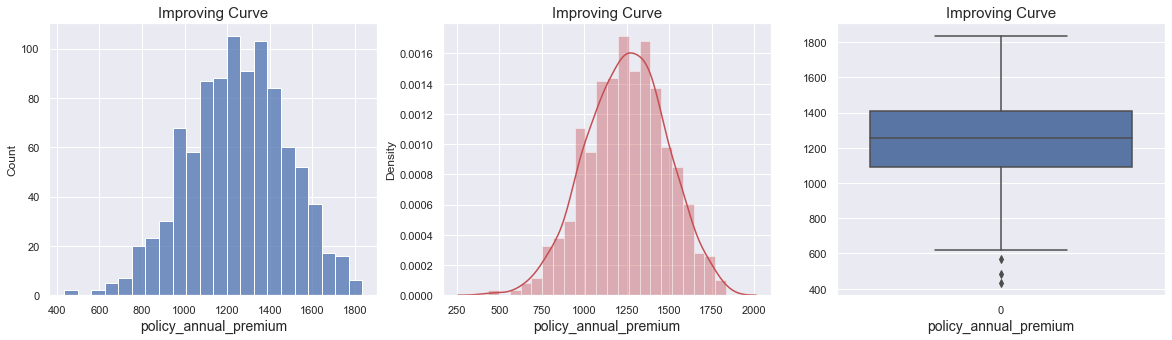

In [1009]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['policy_annual_premium']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['policy_annual_premium'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['policy_annual_premium']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)
plt.show()

In [1010]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['policy_annual_premium'], 33,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['policy_annual_premium'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['policy_annual_premium'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['policy_annual_premium'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 267.395

 **************************************************
Higher range:-
 (array([337, 444, 892], dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 17, 241, 258, 267, 363, 368, 448, 583, 590, 608, 636, 657, 705,
       732, 806, 954], dtype=int64),)


In [1011]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (961, 41)
New Shape:------>  (942, 41)


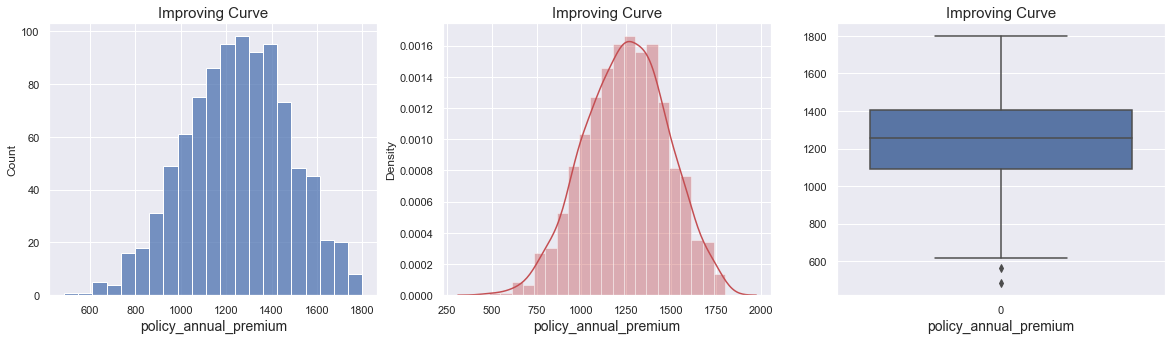

In [1012]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['policy_annual_premium']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['policy_annual_premium'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['policy_annual_premium']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)
plt.show()

In [1013]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['policy_annual_premium'], 33,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['policy_annual_premium'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['policy_annual_premium'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['policy_annual_premium'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 263.8750000000002

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([358, 362, 440, 574, 580, 597, 624, 644, 691, 717, 790, 936],
      dtype=int64),)


In [1014]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (942, 41)
New Shape:------>  (930, 41)


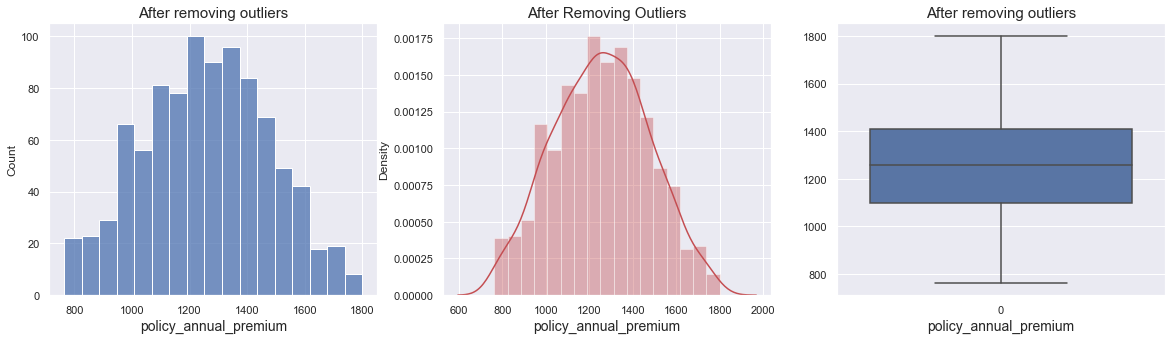

In [1015]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['policy_annual_premium']) #visualize the outliers by using histplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['policy_annual_premium'], color='r') #visualize the normalization curve by using distplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['policy_annual_premium']) #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)
plt.show()

In [1016]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['policy_annual_premium'].mean())
print('Median of the column:----->',df['policy_annual_premium'].median())
print('Mode of the column:----->',st.mode(df['policy_annual_premium']))
print('std of the column:----->',df['policy_annual_premium'].std())

Mean of the column:-----> 1256.8810860215071
Median of the column:-----> 1256.6
Mode of the column:-----> 1215.36
std of the column:-----> 219.84216650626672


In [1017]:
df['policy_annual_premium'] = df['policy_annual_premium'].replace(1215.36,df['policy_annual_premium'].mean())
#replacing mode by mean to improve curve

In [1018]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['policy_annual_premium'].mean())
print('Median of the column:----->',df['policy_annual_premium'].median())
print('Mode of the column:----->',st.mode(df['policy_annual_premium']))
print('std of the column:----->',df['policy_annual_premium'].std())

Mean of the column:-----> 1256.9703786796179
Median of the column:-----> 1256.9405430107536
Mode of the column:-----> 1256.8810860215071
std of the column:-----> 219.83370686359424


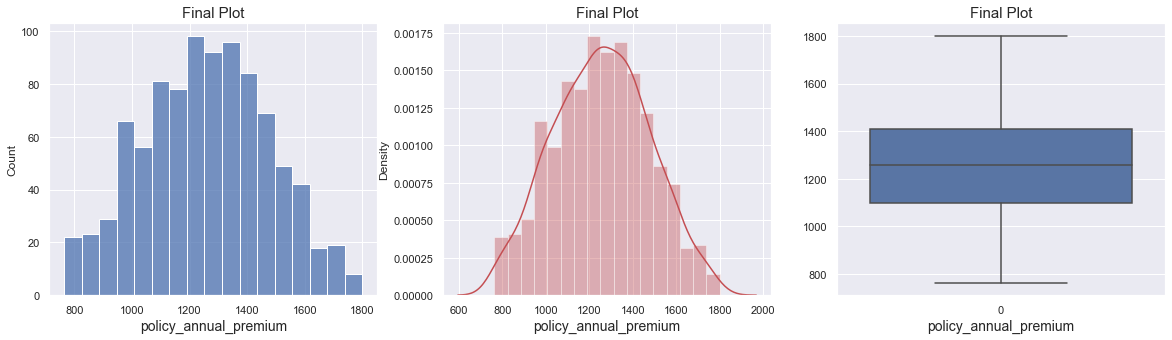

In [1019]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['policy_annual_premium']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['policy_annual_premium'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['policy_annual_premium']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('policy_annual_premium', fontsize= 14)
plt.show()

In [1020]:
df['policy_annual_premium'].skew() #now, check the skewness

0.009221826511779234

Text(0.5, 1.0, 'Plot1: policy_annual_premium vs fraud_reported')

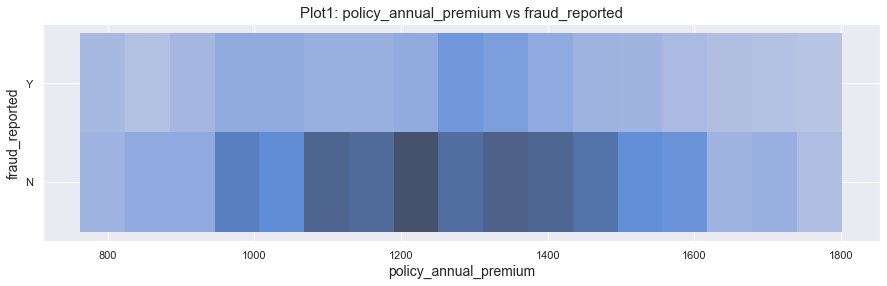

In [1021]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.histplot(x= 'policy_annual_premium',y= 'fraud_reported', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('policy_annual_premium', fontsize = 14)
plt.title('Plot1: policy_annual_premium vs fraud_reported', fontsize = 15)

Text(0.5, 1.0, 'Plot2: policy_annual_premium vs age')

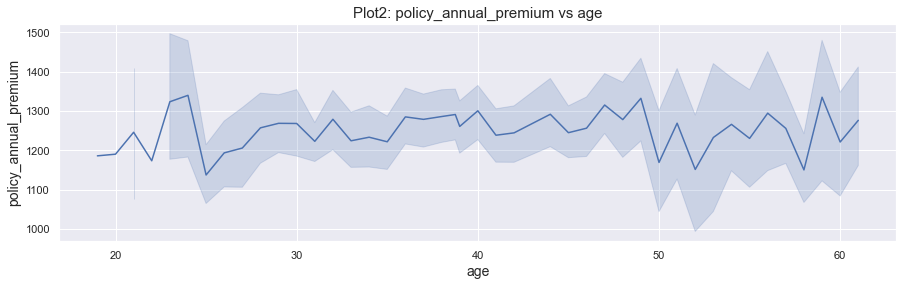

In [1022]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'policy_annual_premium',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('policy_annual_premium', fontsize = 14)
plt.title('Plot2: policy_annual_premium vs age', fontsize = 15)

In [1023]:
df['policy_annual_premium'].describe() #check the parameters

count     930.000000
mean     1256.970379
std       219.833707
min       763.670000
25%      1097.780000
50%      1256.940543
75%      1410.740000
max      1800.760000
Name: policy_annual_premium, dtype: float64

Text(0.5, 1.0, 'Plot3: policy_annual_premium vs months_as_customer')

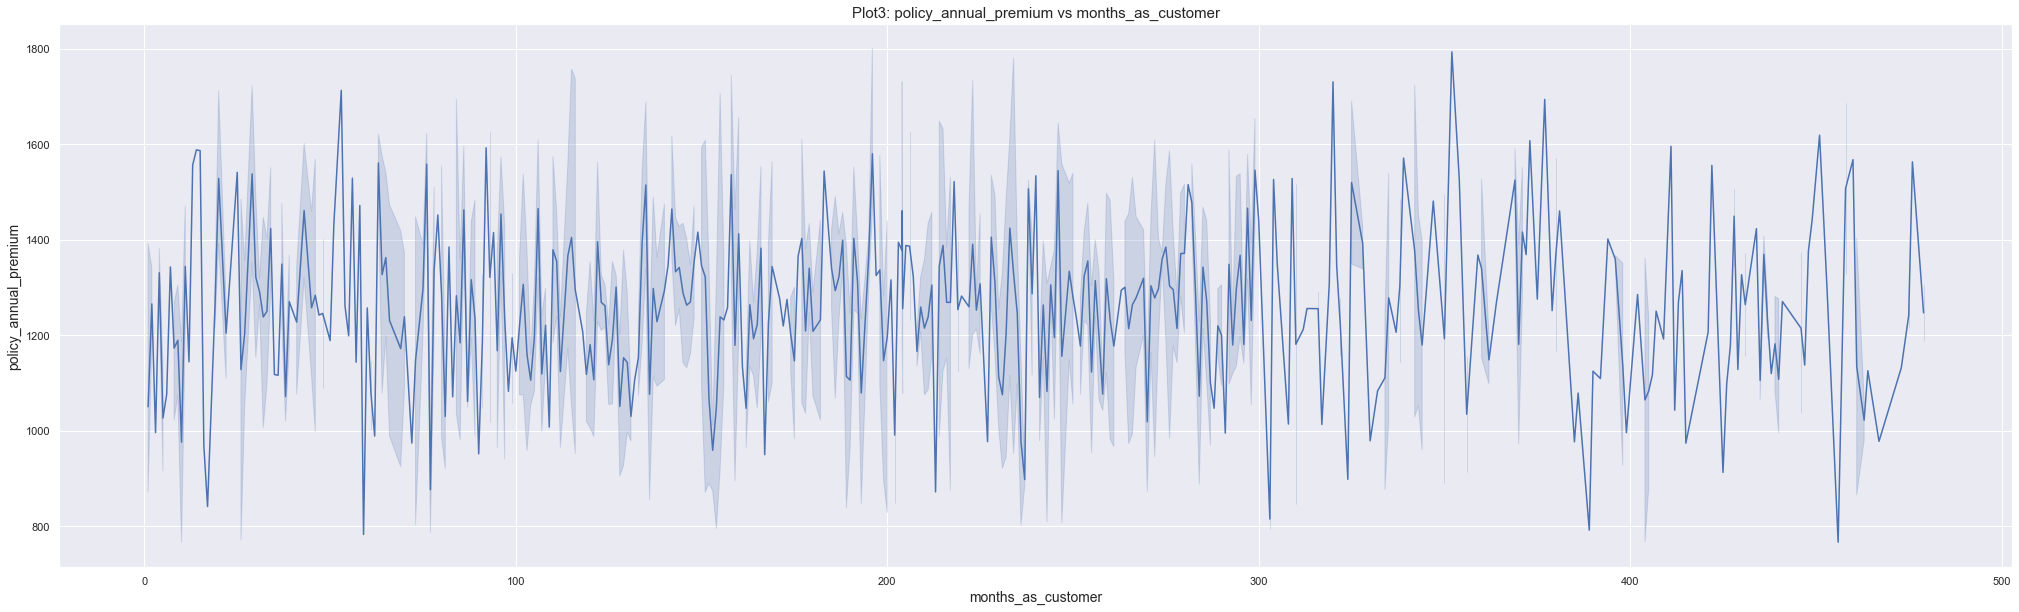

In [1024]:
#visualize this column by lineplot
plt.figure(figsize=(35,10))
sns.lineplot(y= 'policy_annual_premium',x= 'months_as_customer', data=df)
plt.xlabel('months_as_customer', fontsize = 14)
plt.ylabel('policy_annual_premium', fontsize = 14)
plt.title('Plot3: policy_annual_premium vs months_as_customer', fontsize = 15)

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. skewness is less
4. Outliers are removed

- Results by EDA
1. We can see, In Plot1, people who have policy_annual_premium range 1000-1400 are not fraudulent
2. In Plot2, policy_annual_premium are almost same for all age group
3. In Plot3, it is very difficult to say much in this plot

In [1025]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 41)


# Columns9: umbrella_limit 

In [1026]:
df['umbrella_limit'].unique() #check the unique value

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [1027]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['umbrella_limit'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['umbrella_limit'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['umbrella_limit'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 1.8315745763628402


In [1028]:
df['umbrella_limit'] = df['umbrella_limit'].replace(0,df['umbrella_limit'].mean())
#replace zero value by mean value of the column

In [1029]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['umbrella_limit'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['umbrella_limit'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['umbrella_limit'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 1.9772406090848647


In [1030]:
df['umbrella_limit'].value_counts() #check the counts of unique values

 1.094624e+06    743
 6.000000e+06     49
 5.000000e+06     42
 4.000000e+06     37
 7.000000e+06     28
 3.000000e+06     12
 8.000000e+06      8
 9.000000e+06      5
 2.000000e+06      3
 1.000000e+07      2
-1.000000e+06      1
Name: umbrella_limit, dtype: int64

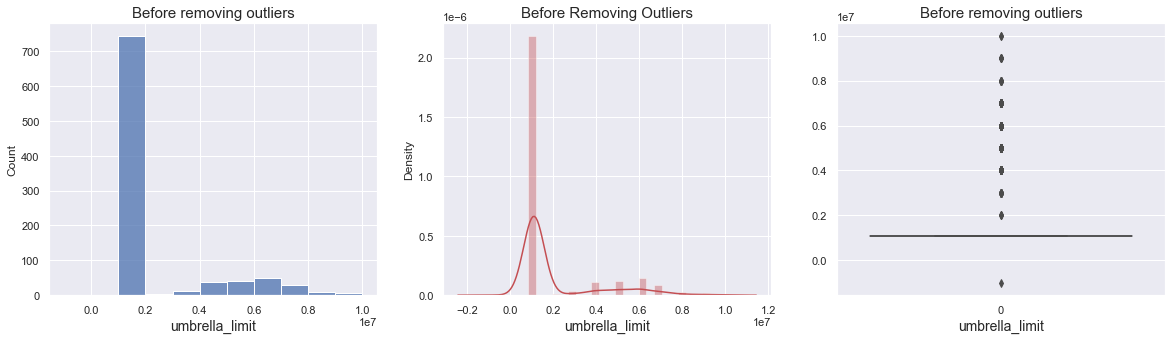

In [1031]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['umbrella_limit']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('umbrella_limit', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['umbrella_limit'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('umbrella_limit', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['umbrella_limit']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('umbrella_limit', fontsize= 14)
plt.show()

In [1032]:
df.drop(columns= 'umbrella_limit',inplace = True)
#drop the column

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. skewness is not good
4. Outliers are more, so, we need to drop this column.

In [1033]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 40)


# Columns10:  insured_zip

In [1034]:
df['insured_zip'].unique() #check the unique value

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 472135, 477670, 442479, 443920, 453148, 434733, 613982,
       436984, 607730, 609837, 432211, 473328, 610393, 614780, 472248,
       603381, 479224, 430141, 620757, 615901, 474615, 456446, 470577,
       441648, 468104, 459407, 472573, 433473, 446326, 435481, 477310,
       609930, 603993, 437818, 478423, 467784, 606714, 464691, 431683,
       431725, 609216, 452787, 468767, 450149, 458364, 476458, 478575,
       449718, 463181, 441992, 452597, 614417, 472895, 475847, 476978,
       600648, 608335, 471600, 441175, 603123, 457767, 618498, 605486,
       617970, 432934, 456762, 601748, 607763, 436973, 471300, 453277,
       465100, 603248, 601112, 438830, 464959, 439787, 464839, 448984,
       440327, 460742, 446895, 609374, 451672, 604450, 432896, 618929,
       451312, 605141, 459504, 432781, 452748, 618316, 455365, 470603,
      

In [1035]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['insured_zip'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['insured_zip'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['insured_zip'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.8090945793940344


In [1036]:
df['insured_zip'].value_counts()#check the counts of unique values

477695    2
456602    2
446895    2
431202    2
469429    2
         ..
604874    1
473645    1
447188    1
608982    1
448722    1
Name: insured_zip, Length: 925, dtype: int64

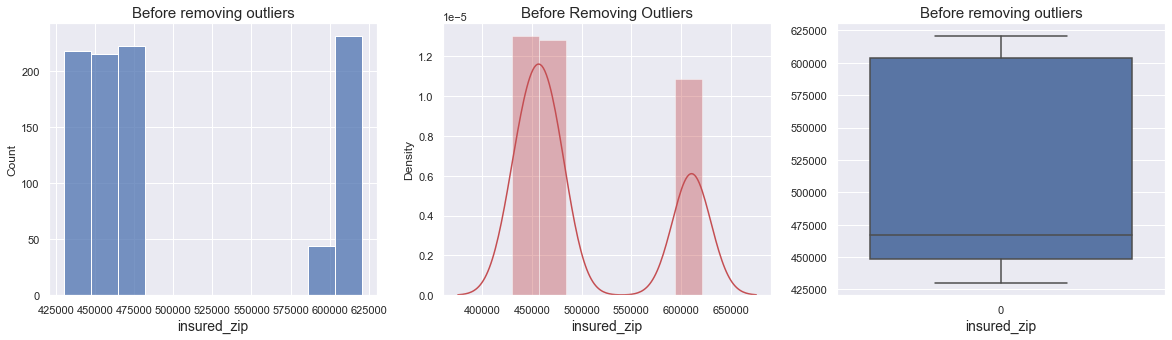

In [1037]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['insured_zip']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('insured_zip', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['insured_zip'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('insured_zip', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['insured_zip']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('insured_zip', fontsize= 14)
plt.show()

In [1038]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['insured_zip'].mean())
print('Median of the column:----->',df['insured_zip'].median())
print('Mode of the column:----->',st.mode(df['insured_zip']))
print('std of the column:----->',df['insured_zip'].std())

Mean of the column:-----> 501672.55161290325
Median of the column:-----> 466683.5
Mode of the column:-----> 446895
std of the column:-----> 71748.10024974005


In [1039]:
df.drop(columns= 'insured_zip',inplace = True)
#drop the column

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. skewness is not good
4. No symmetry found
5. That's why we drop this column

In [1040]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 39)


# Columns11: insured_sex 

In [1041]:
df['insured_sex'].unique() #check the unique values

array(['MALE', 'FEMALE'], dtype=object)

In [1042]:
df['insured_sex'].value_counts() #check the counts of the unique values

FEMALE    502
MALE      428
Name: insured_sex, dtype: int64

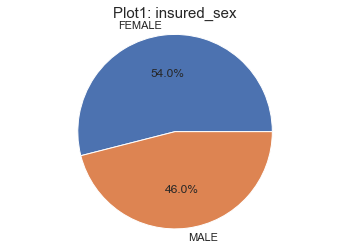

In [1043]:
#visualize by using pieplot
Values = [502,428]
my_labels = 'FEMALE','MALE'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: insured_sex', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Plot2: insured_sex vs fraud_reported')

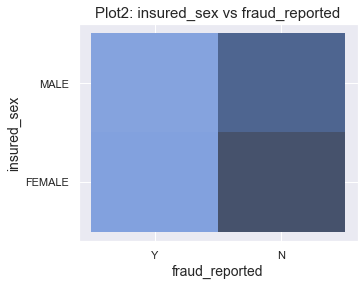

In [1044]:
#visualize this column by lineplot
plt.figure(figsize=(5,4))
sns.histplot(y= 'insured_sex',x= 'fraud_reported', data=df)
plt.xlabel('fraud_reported', fontsize = 14)
plt.ylabel('insured_sex', fontsize = 14)
plt.title('Plot2: insured_sex vs fraud_reported', fontsize = 15)

In [1045]:
df.groupby('insured_sex')['age'].value_counts().sort_index(ascending=False)
#check the relationship between insured_sex and age

insured_sex  age 
MALE         61.0     2
             60.0     4
             59.0     2
             58.0     6
             57.0    10
                     ..
FEMALE       24.0     9
             23.0     4
             21.0     3
             20.0     1
             19.0     1
Name: age, Length: 83, dtype: int64

Text(0.5, 1.0, 'Plot3: insured_sex vs age')

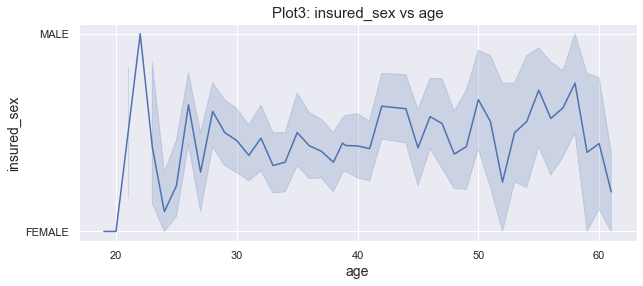

In [1046]:
#visualize this column by lineplot
plt.figure(figsize=(10,4))
sns.lineplot(y= 'insured_sex',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('insured_sex', fontsize = 14)
plt.title('Plot3: insured_sex vs age', fontsize = 15)

In [1047]:
df.groupby('insured_sex')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between insured_sex and fraud_reported

insured_sex  fraud_reported
MALE         Y                 111
             N                 317
FEMALE       Y                 118
             N                 384
Name: fraud_reported, dtype: int64

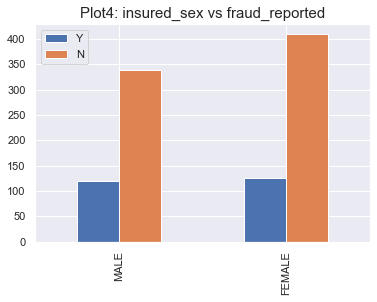

In [1048]:
#visualize by using barplot
df_fraud_reported = {'Y': [120, 125],
        'N': [338, 409] }
df1 = pd.DataFrame(df_fraud_reported,columns=['Y','N'], index = ['MALE','FEMALE'])
df1.plot.bar()
plt.title('Plot4: insured_sex vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. We can see, In Plot1, Females are more than males
2. In Plot2, Both female and male, mostly peoples are not fraudulent
3. In Plot3 and relationship between insured-sex and age that females are younger in age and males are older in age are more than other age group.
4. In Plot4 and relationship between insured-sex and fraud_reported that females are more fraudulent than males and this difference is very less, m-120, f-125

In [1049]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 39)


# Columns12: insured_education_level

In [1050]:
df['insured_education_level'].unique() #check the unique value

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [1051]:
df['insured_education_level'].value_counts() #check the count of unique value

High School    148
JD             145
MD             137
Masters        134
Associate      131
PhD            119
College        116
Name: insured_education_level, dtype: int64

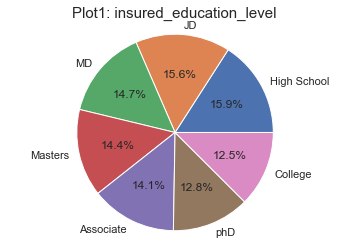

In [1052]:
#visualize by using pieplot
Values = [148,145,137,134,131,119,116]
my_labels = 'High School','JD','MD','Masters','Associate','phD','College'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: insured_education_level', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Plot2: age vs insured_education_level')

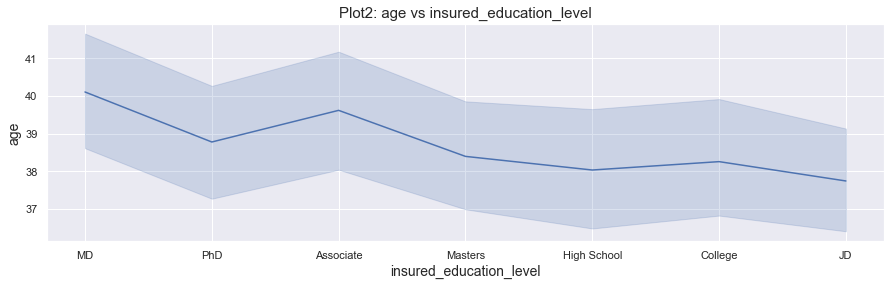

In [1053]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'age',x= 'insured_education_level', data=df)
plt.xlabel('insured_education_level', fontsize = 14)
plt.ylabel('age', fontsize = 14)
plt.title('Plot2: age vs insured_education_level', fontsize = 15)

In [1054]:
df.groupby('policy_state')['insured_education_level'].value_counts().sort_index(ascending=False)
#check the relationship between policy_state and insured_education_level

policy_state  insured_education_level
OH            PhD                        46
              Masters                    45
              MD                         50
              JD                         46
              High School                48
              College                    40
              Associate                  55
IN            PhD                        27
              Masters                    41
              MD                         44
              JD                         56
              High School                50
              College                    32
              Associate                  38
IL            PhD                        46
              Masters                    48
              MD                         43
              JD                         43
              High School                50
              College                    44
              Associate                  38
Name: insured_education_level, dtype: 

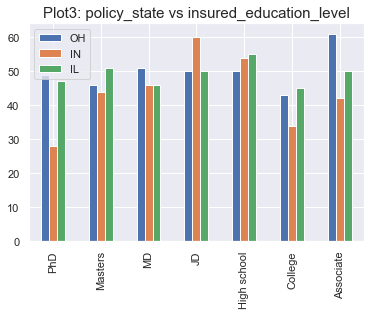

In [1055]:
#visualize by using barplot
df_education = {'OH': [49,46,51,50,50,43,61],
        'IN': [28,44,46,60,54,34,42], 'IL': [47,51,46,50,55,45,50]}
df1 = pd.DataFrame(df_education,columns=['OH','IN','IL'], index = ['PhD','Masters','MD','JD','High school','College','Associate'])
df1.plot.bar()
plt.title('Plot3: policy_state vs insured_education_level', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Plot4: policy_annual_premium vs insured_education_level')

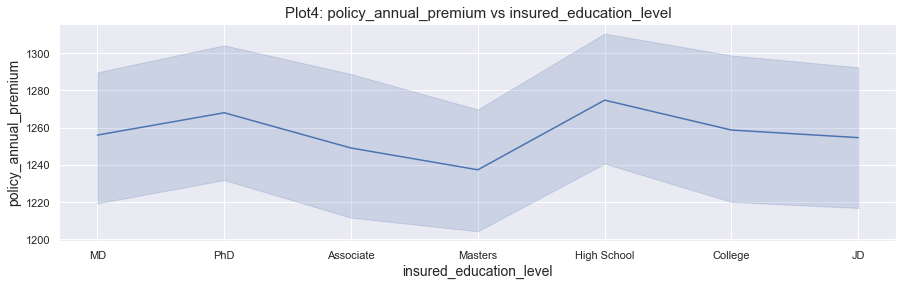

In [1056]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'policy_annual_premium',x= 'insured_education_level', data=df)
plt.xlabel('insured_education_level', fontsize = 14)
plt.ylabel('policy_annual_premium', fontsize = 14)
plt.title('Plot4: policy_annual_premium vs insured_education_level', fontsize = 15)

In [1057]:
df.groupby('insured_sex')['insured_education_level'].value_counts().sort_index(ascending=False)
#check the relationship between insured_sex and insured_education_level

insured_sex  insured_education_level
MALE         PhD                        53
             Masters                    59
             MD                         69
             JD                         65
             High School                74
             College                    53
             Associate                  55
FEMALE       PhD                        66
             Masters                    75
             MD                         68
             JD                         80
             High School                74
             College                    63
             Associate                  76
Name: insured_education_level, dtype: int64

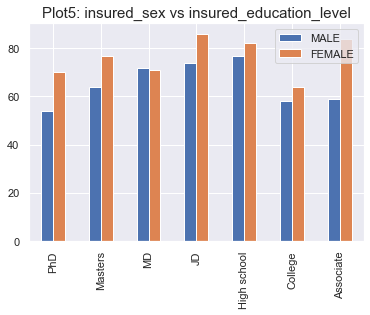

In [1058]:
#visualize by using barplot
df_education = {'MALE': [54,64,72,74,77,58,59],
        'FEMALE': [70,77,71,86,82,64,84]}
df1 = pd.DataFrame(df_education,columns=['MALE','FEMALE'], index = ['PhD','Masters','MD','JD','High school','College','Associate'])
df1.plot.bar()
plt.title('Plot5: insured_sex vs insured_education_level', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. We can see, In plot1, JD and High School education level peoples are more than others
2. In plot2, The age of MD education level peoples are more than others
3. In plot3 and the relationship between policy_state and insured_education_level, In Phd, associate, MD level peoples are more from Ohio, masters and college peoples are more in IL and rest for third one
4. In plot4, high school level peoples has high policy annual premium
5. In plot5, we can see, females are more educated than males in each and every field.

In [1059]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 39)


# Columns13: insured_occupation

In [1060]:
df['insured_occupation'].unique() #check the unique values

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [1061]:
df['insured_occupation'].value_counts() #check the counts of unique value

machine-op-inspct    84
prof-specialty       79
tech-support         75
exec-managerial      73
sales                70
priv-house-serv      68
craft-repair         68
transport-moving     66
other-service        65
armed-forces         65
protective-serv      59
adm-clerical         58
farming-fishing      50
handlers-cleaners    50
Name: insured_occupation, dtype: int64

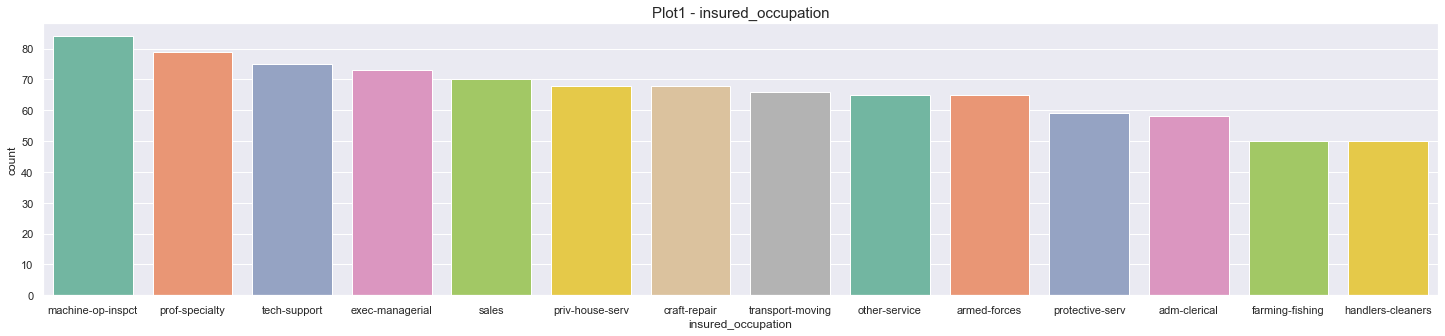

In [1062]:
#plotting each class frequency
fig = plt.figure(figsize=(25,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_occupation",palette="Set2", data=df, order = df["insured_occupation"].value_counts().index)
plt.title('Plot1 - insured_occupation', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Plot2: insured_occupation vs age')

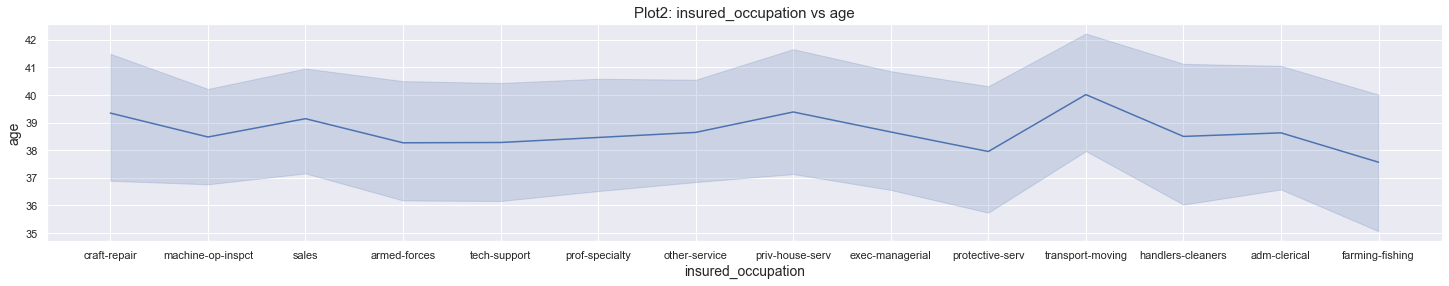

In [1063]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_occupation',y= 'age', data=df)
plt.ylabel('age', fontsize = 14)
plt.xlabel('insured_occupation', fontsize = 14)
plt.title('Plot2: insured_occupation vs age', fontsize = 15)

Text(0.5, 1.0, 'Plot3: insured_occupation vs policy_state')

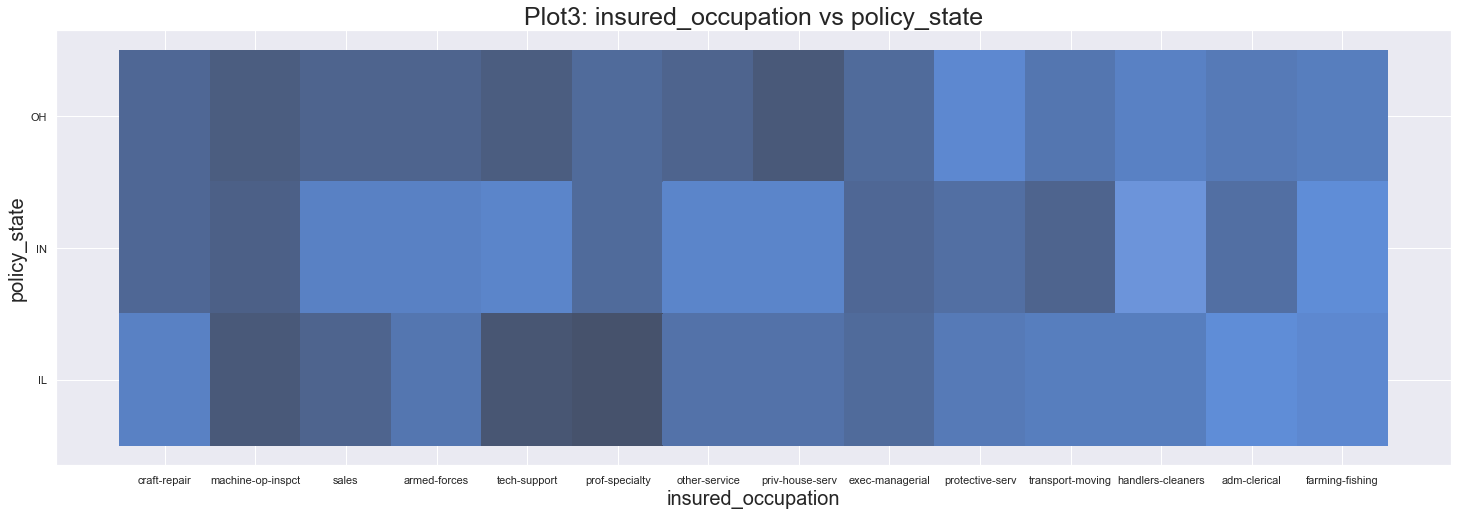

In [1064]:
#visualize this column by histplot
plt.figure(figsize=(25,8))
sns.histplot(x= 'insured_occupation',y= 'policy_state', data=df)
plt.ylabel('policy_state', fontsize = 20)
plt.xlabel('insured_occupation', fontsize = 20)
plt.title('Plot3: insured_occupation vs policy_state', fontsize = 25)

Text(0.5, 1.0, 'Plot4: insured_occupation vs policy_annual_premium')

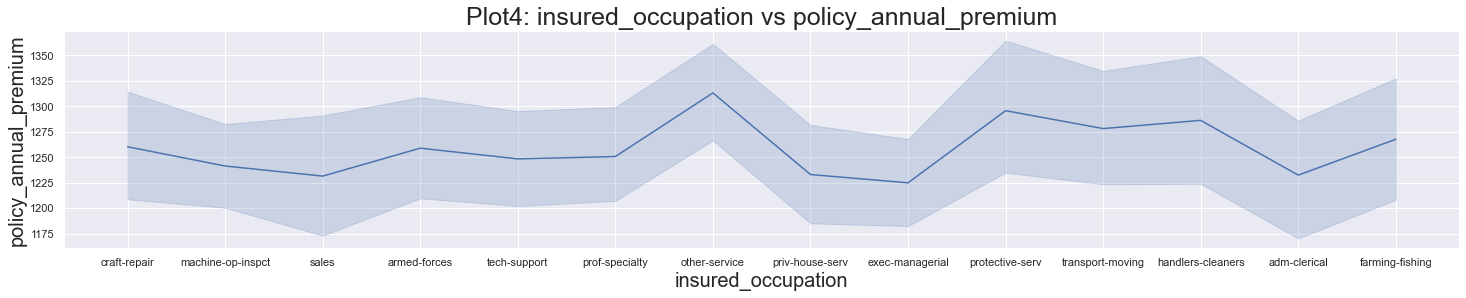

In [1065]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_occupation',y= 'policy_annual_premium', data=df)
plt.ylabel('policy_annual_premium', fontsize = 20)
plt.xlabel('insured_occupation', fontsize = 20)
plt.title('Plot4: insured_occupation vs policy_annual_premium', fontsize = 25)

Text(0.5, 1.0, 'Plot5: insured_occupation vs insured_education_level')

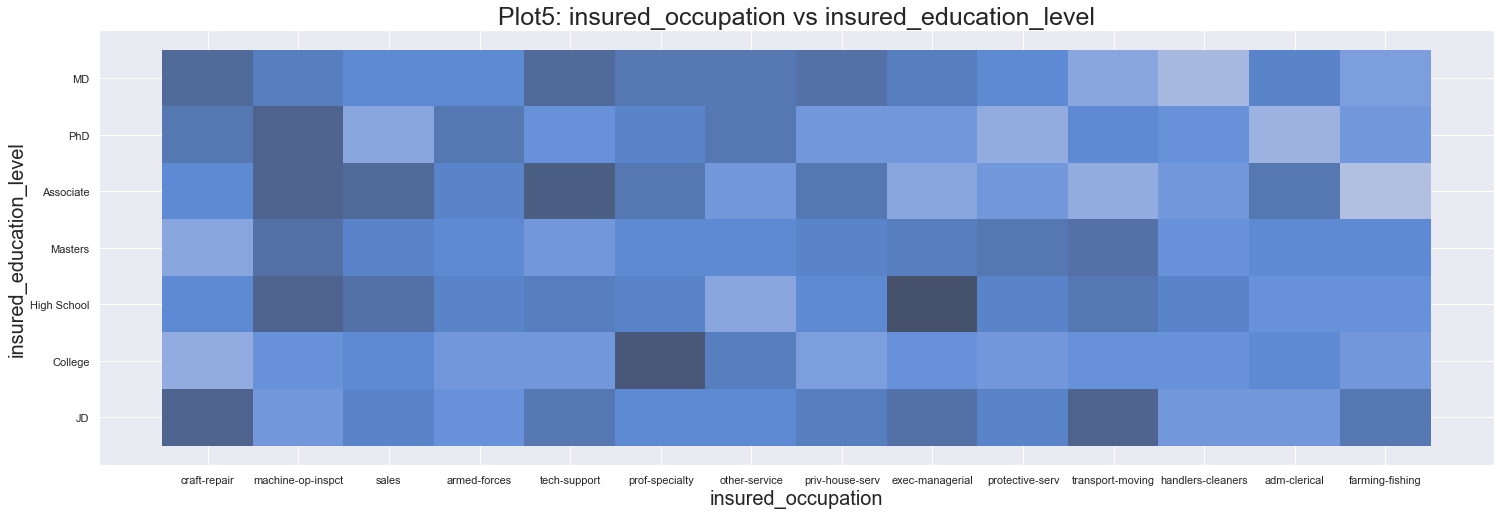

In [1066]:
#visualize this column by lineplot
plt.figure(figsize=(25,8))
sns.histplot(x= 'insured_occupation',y= 'insured_education_level', data=df)
plt.ylabel('insured_education_level', fontsize = 20)
plt.xlabel('insured_occupation', fontsize = 20)
plt.title('Plot5: insured_occupation vs insured_education_level', fontsize = 25)

Observation:
- Results by EDA
1. We can see, In plot1, machine-op-inspct occupation are more than other occupation.
2. In plot2, The age of Transport Moving occupation peoples are more than others
3. In plot3, machine-op-inspct peoples are more in IN, prof-specialty peoples are more in IL and private_house_serv are more in Ohio
4. In plot4, Other services occupation peoples have high policy annual premium
5. In plot5, we can see in histogram, machine-op-inspct occupation peoples has Associate, masters, high school level education, prof-specialty occupation have College level education, exec-managerial has high school level education

In [1067]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 39)


# Columns14: insured_hobbies

In [1068]:
df['insured_hobbies'].unique() #check the unique values

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [1069]:
df['insured_hobbies'].value_counts() # check the counts of unique value

exercise          55
reading           54
bungie-jumping    54
movies            53
kayaking          52
hiking            51
yachting          51
paintball         51
camping           51
golf              48
base-jumping      47
board-games       46
video-games       45
polo              44
skydiving         43
chess             41
dancing           40
sleeping          38
cross-fit         34
basketball        32
Name: insured_hobbies, dtype: int64

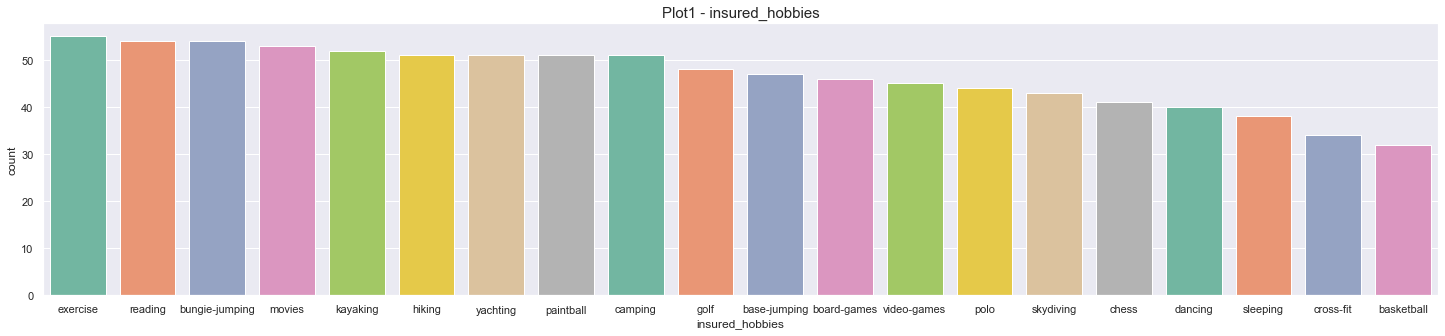

In [1070]:
#plotting each class frequency
fig = plt.figure(figsize=(25,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_hobbies",palette="Set2", data=df, order = df["insured_hobbies"].value_counts().index)
plt.title('Plot1 - insured_hobbies', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Plot2: insured_hobbies vs age')

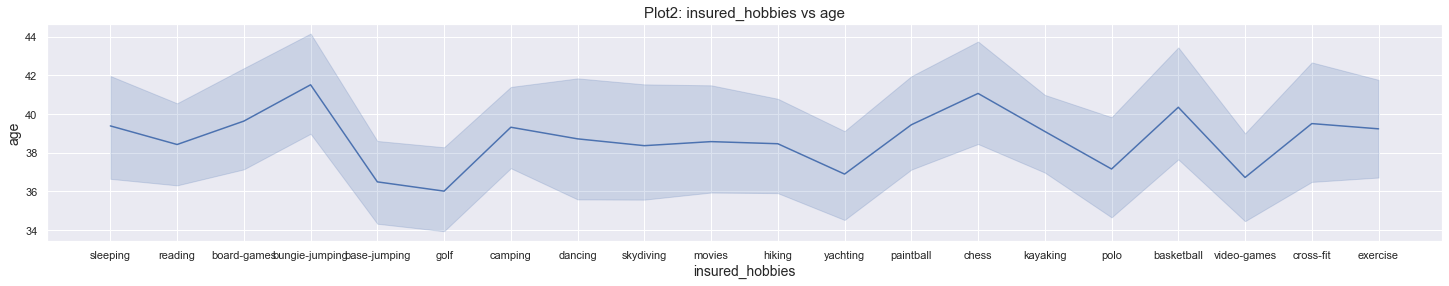

In [1071]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_hobbies',y= 'age', data=df)
plt.ylabel('age', fontsize = 14)
plt.xlabel('insured_hobbies', fontsize = 14)
plt.title('Plot2: insured_hobbies vs age', fontsize = 15)

Text(0.5, 1.0, 'Plot3: insured_hobbies vs policy_annual_premium')

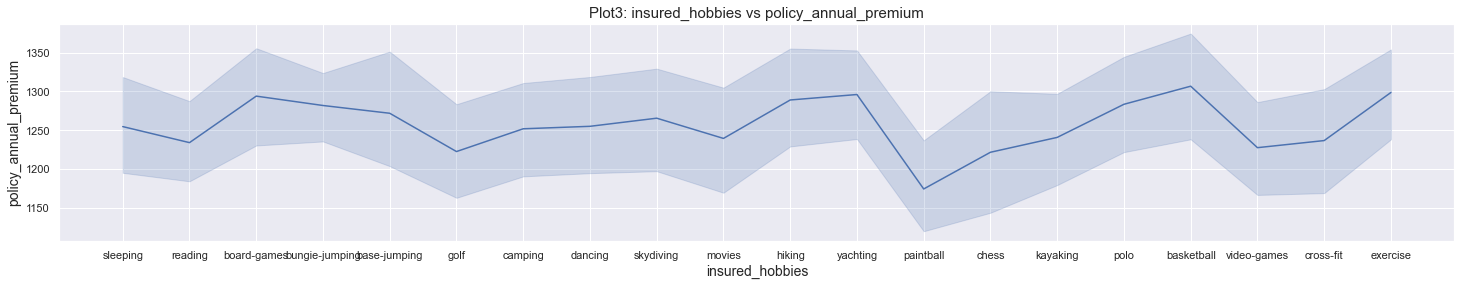

In [1072]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_hobbies',y= 'policy_annual_premium', data=df)
plt.ylabel('policy_annual_premium', fontsize = 14)
plt.xlabel('insured_hobbies', fontsize = 14)
plt.title('Plot3: insured_hobbies vs policy_annual_premium', fontsize = 15)

Text(0.5, 1.0, 'Plot4: insured_hobbies vs insured_occupation')

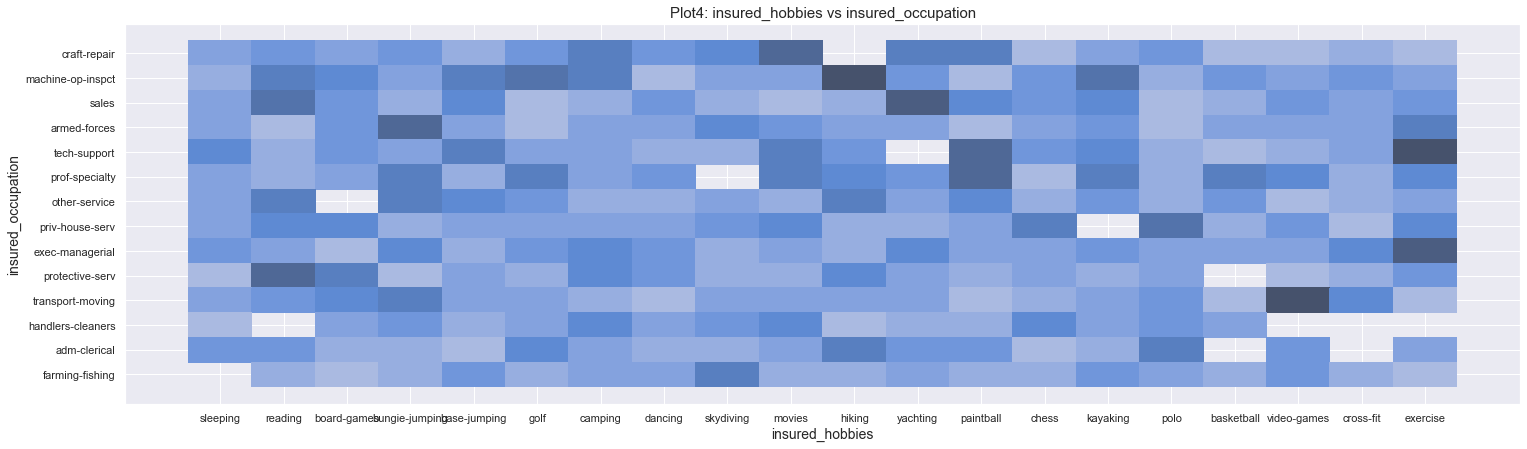

In [1073]:
#visualize this column by lineplot
plt.figure(figsize=(25,7))
sns.histplot(x= 'insured_hobbies',y= 'insured_occupation', data=df)
plt.ylabel('insured_occupation', fontsize = 14)
plt.xlabel('insured_hobbies', fontsize = 14)
plt.title('Plot4: insured_hobbies vs insured_occupation', fontsize = 15)

Text(0.5, 1.0, 'Plot5: insured_hobbies vs insured_education_level')

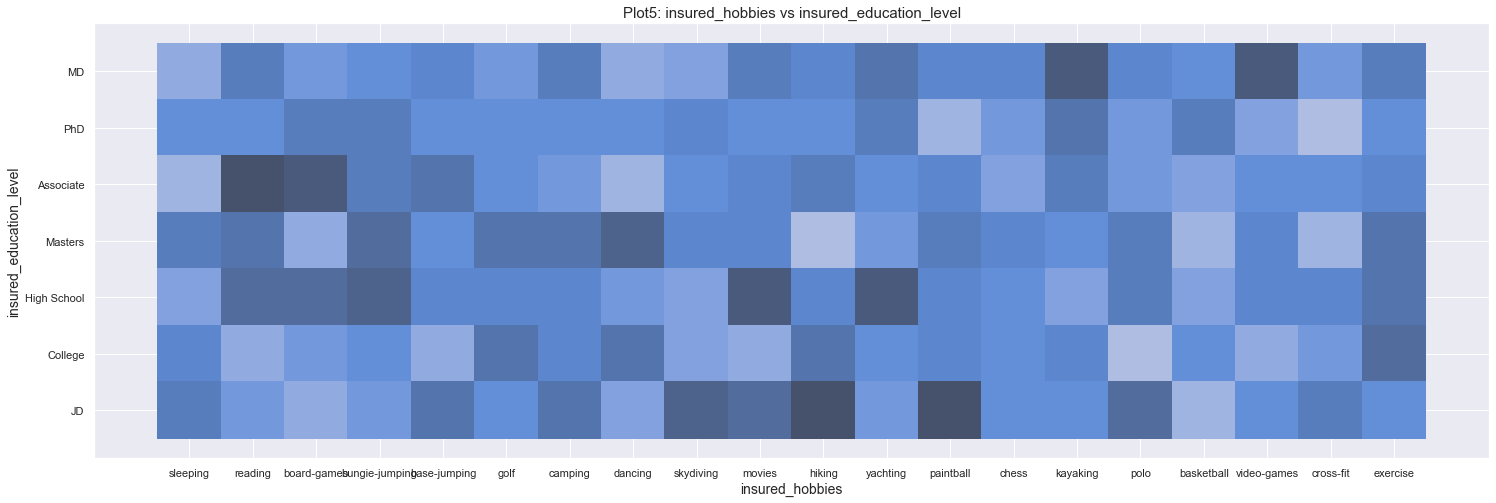

In [1074]:
#visualize this column by lineplot
plt.figure(figsize=(25,8))
sns.histplot(x= 'insured_hobbies',y= 'insured_education_level', data=df)
plt.ylabel('insured_education_level', fontsize = 14)
plt.xlabel('insured_hobbies', fontsize = 14)
plt.title('Plot5: insured_hobbies vs insured_education_level', fontsize = 15)

Observation:
- Results by EDA
1. We can see, In plot1, people who have exercise as hobby has more in count
2. In plot2, The age of bungie-jumping peoples are more than others
3. In plot3, it is very difficult to say which one is higher but people who have paintball as a hobby have low policy annual premium
4. In plot4, machine-op-inspct likes hiking the most
5. In plot5, we can see, associate level likes reading, JD level likes hiking the most 

In [1075]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 39)


# Columns15: insured_relationship

In [1076]:
df['insured_relationship'].unique() #check the unique values

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [1077]:
df['insured_relationship'].value_counts() #check the counts of unique value

own-child         168
not-in-family     166
other-relative    163
husband           158
wife              143
unmarried         132
Name: insured_relationship, dtype: int64

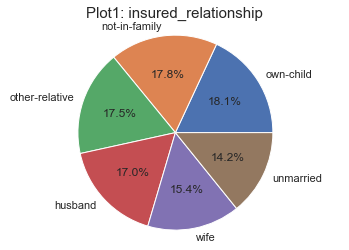

In [1078]:
#visualize by using pieplot
Values = [168,166,163,158,143,132]
my_labels = 'own-child','not-in-family','other-relative','husband','wife','unmarried'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: insured_relationship', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Plot2: insured_relationship vs months_as_customer')

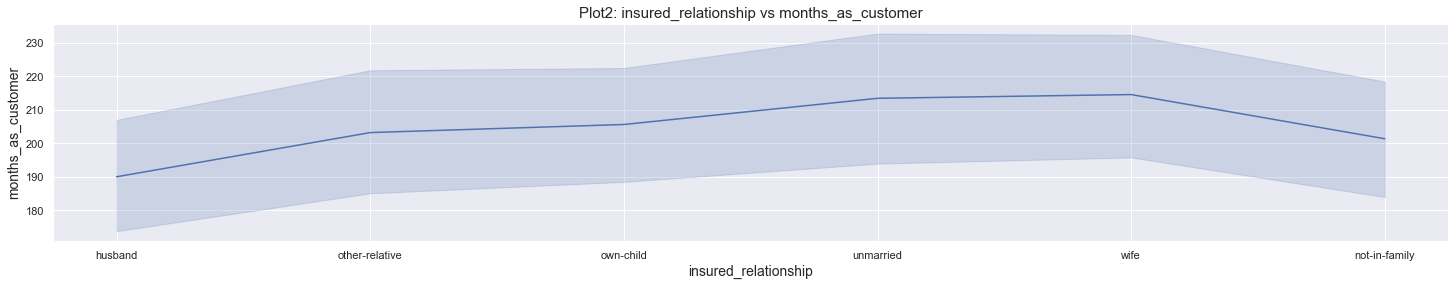

In [1079]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_relationship',y= 'months_as_customer', data=df)
plt.ylabel('months_as_customer', fontsize = 14)
plt.xlabel('insured_relationship', fontsize = 14)
plt.title('Plot2: insured_relationship vs months_as_customer', fontsize = 15)

Text(0.5, 1.0, 'Plot3: insured_relationship vs age')

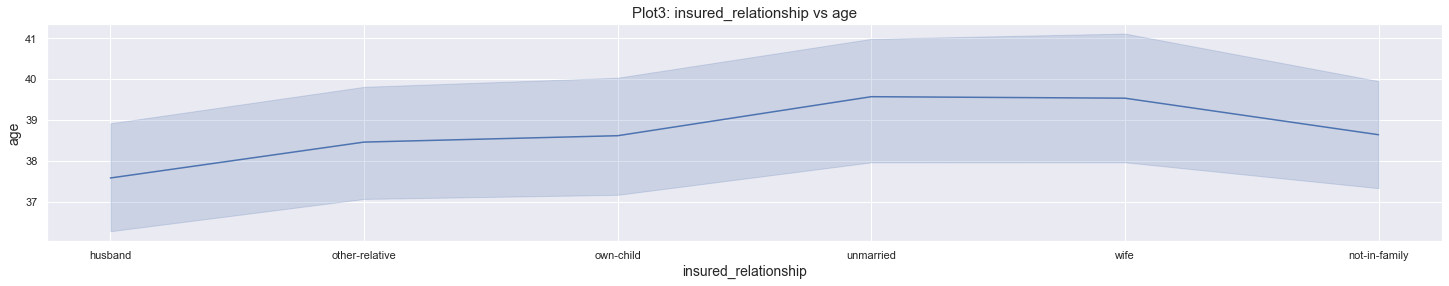

In [1080]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_relationship',y= 'age', data=df)
plt.ylabel('age', fontsize = 14)
plt.xlabel('insured_relationship', fontsize = 14)
plt.title('Plot3: insured_relationship vs age', fontsize = 15)

Text(0.5, 1.0, 'Plot4: insured_relationship vs policy_annual_premium')

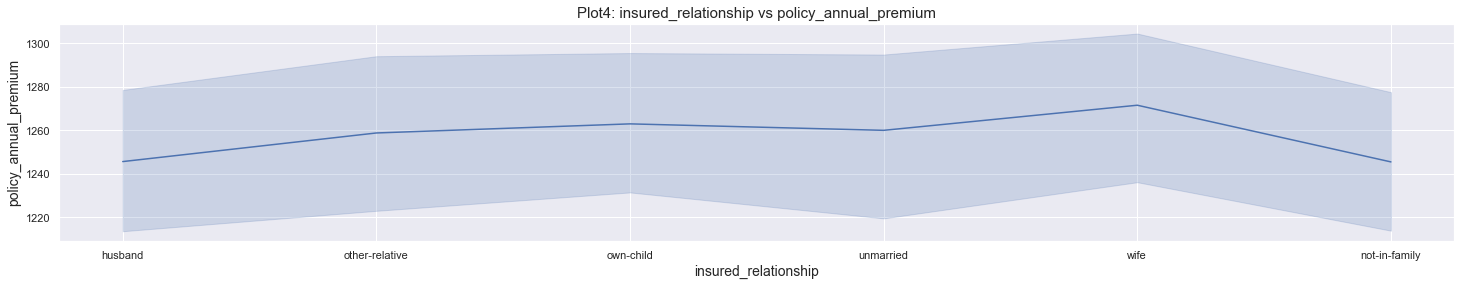

In [1081]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'insured_relationship',y= 'policy_annual_premium', data=df)
plt.ylabel('policy_annual_premium', fontsize = 14)
plt.xlabel('insured_relationship', fontsize = 14)
plt.title('Plot4: insured_relationship vs policy_annual_premium', fontsize = 15)

Text(0.5, 1.0, 'Plot5: insured_relationship vs fraud_reported')

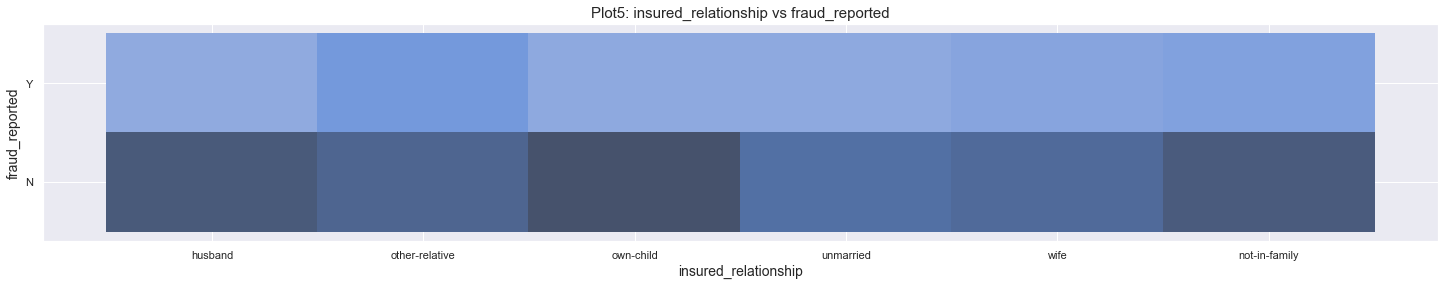

In [1082]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.histplot(x= 'insured_relationship',y= 'fraud_reported', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('insured_relationship', fontsize = 14)
plt.title('Plot5: insured_relationship vs fraud_reported', fontsize = 15)

Observation:
- Results by EDA
1. In plot1, own-child percentage is higher than others
2. In plot2, wife and unmarried peoples has higher months as customers than others
3. In plot3, wife and unmarried peoples has higher age than others
4. In Plot4, Wife have more policy_annual_premium than others
5. In plot5, maximum peoples are not fraudulent but other relatives category have higher rate of claiming fraud than others

In [1083]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (930, 39)


# Columns15: capital-gains

In [1084]:
df['capital-gains'].unique() #check the unique values

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  45500,  57000,  46700,  72700,  31000,  53200,
        27500,  81100,  51400,  65700,  48500,  36400,  35300,  88400,
        47600,  71500,  36100,  56600,  94800,  36900,  69100,  62400,
        35700,  43400,  43300,  56200,  37800,  78300,  52700,  57300,
          800,  55200,  90700,  67700,  61500,  37300,  50500,  34300,
        28800,  52600,  34400,  62000,  41200,  44300,  58000,  51100,
        47200,  59600,  70500,  40700,  42400,  57900,  60000,  65300,
        84900,  45300,  68900,  46300,  76000,  58600,  54100,  58100,
        13100,  31900,  17600,  52000,  29000,  62500,  39600,  49700,
        47700,  38100,  71400,  75400,  88800,  53900,  27000,  72200,
        29600,  51000,  62700,  25000,  68500,  42900,  29300,  45100,
        63100,  66400,  25500,  59900,  62200,  24000,  24800,  47800,
        53000,  24400,  65600,  39900,  40600,  33300,  54000,  60300,
      

In [1085]:
df['capital-gains'].value_counts() #check the counts of unique value

0        471
46300      5
51500      4
68500      4
58500      3
        ... 
40100      1
33200      1
37300      1
67000      1
72700      1
Name: capital-gains, Length: 324, dtype: int64

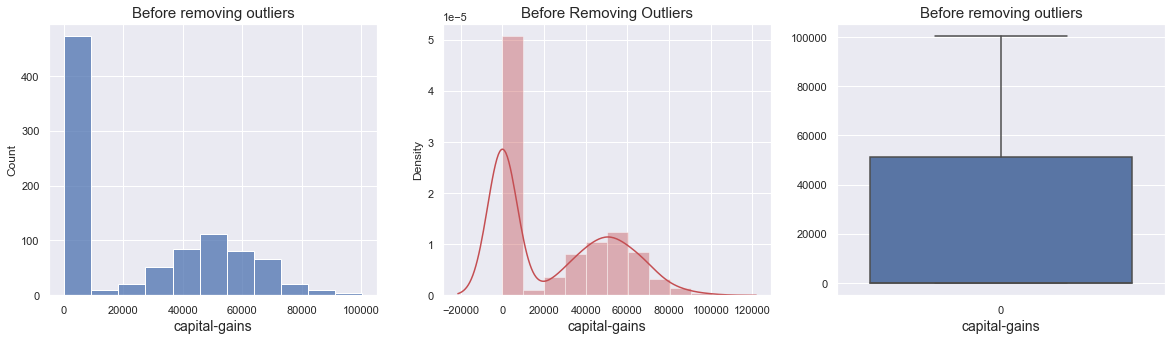

In [1086]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-gains']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-gains'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['capital-gains']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)
plt.show()

In [1087]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-gains'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-gains'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-gains'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.47569243148510953


In [1088]:
df['capital-gains']=df['capital-gains'].loc[(df['capital-gains']!=0)]#drop zero values

In [1089]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-gains'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-gains'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-gains'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 471

 **************************************************
Check the skewness in Column:----------> 0.06463856132095529


In [1090]:
df.dropna(subset=["capital-gains"], inplace=True) #drop the null values

In [1091]:
df['capital-gains'].value_counts() #check the counts of unique values

46300.0    5
68500.0    4
51500.0    4
48900.0    3
29300.0    3
          ..
59800.0    1
61500.0    1
54000.0    1
78300.0    1
43900.0    1
Name: capital-gains, Length: 323, dtype: int64

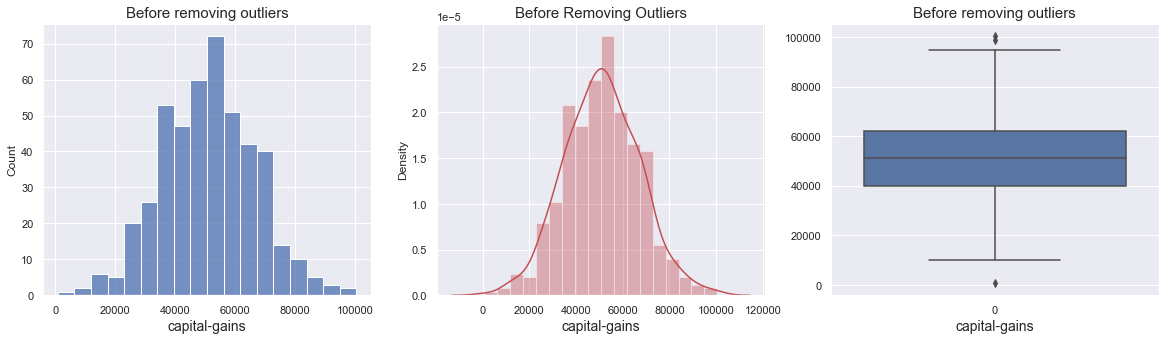

In [1092]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-gains']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-gains'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['capital-gains']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)
plt.show()

In [1093]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['capital-gains'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['capital-gains'], 73,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['capital-gains'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['capital-gains'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 21150.0

 **************************************************
Higher range:-
 (array([ 28, 241, 367], dtype=int64),)

 **************************************************
Lower range:- 
 (array([41], dtype=int64),)


In [1094]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (459, 39)
New Shape:------>  (455, 39)


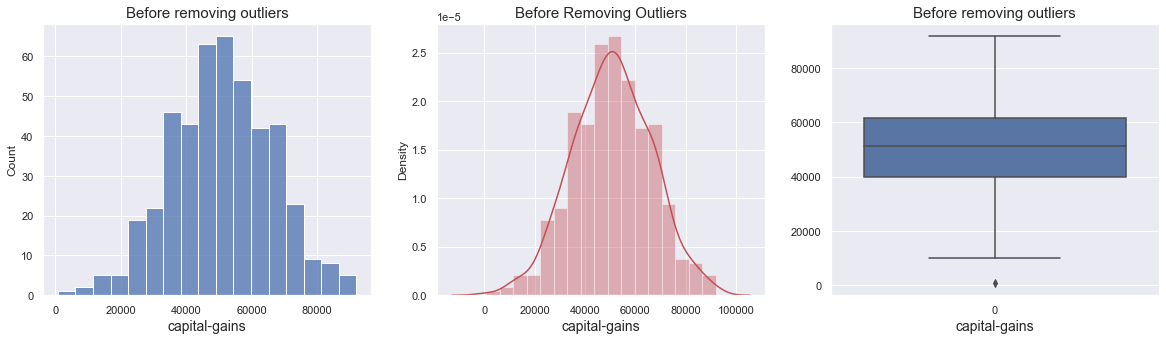

In [1095]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-gains']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-gains'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['capital-gains']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)
plt.show()

In [1096]:
df['capital-gains'].unique() #check the unique values
#we see only one value is very less that is 800

array([53300., 35100., 48900., 66000., 38400., 52800., 41300., 55700.,
       63600., 45500., 57000., 46700., 72700., 31000., 53200., 27500.,
       81100., 51400., 65700., 48500., 36400., 35300., 88400., 47600.,
       71500., 36100., 56600., 36900., 69100., 62400., 35700., 43400.,
       43300., 56200., 37800., 78300., 52700., 57300.,   800., 55200.,
       90700., 67700., 61500., 37300., 50500., 34300., 28800., 52600.,
       34400., 62000., 41200., 44300., 58000., 51100., 47200., 59600.,
       70500., 40700., 42400., 57900., 60000., 65300., 84900., 45300.,
       68900., 46300., 76000., 58600., 54100., 58100., 13100., 31900.,
       17600., 52000., 29000., 62500., 39600., 49700., 47700., 38100.,
       71400., 75400., 88800., 53900., 27000., 72200., 29600., 51000.,
       62700., 25000., 68500., 42900., 29300., 45100., 63100., 66400.,
       25500., 59900., 62200., 24000., 24800., 47800., 53000., 24400.,
       65600., 39900., 40600., 33300., 54000., 60300., 41500., 44400.,
      

In [1097]:
df['capital-gains'] = df['capital-gains'].replace(800,df['capital-gains'].mean())
#now, we can easily replace 800 to column mean

In [1098]:
df['capital-gains'].unique() #now, check the unique value
#we can see, 800 is replaced by column mean

array([53300.        , 35100.        , 48900.        , 66000.        ,
       38400.        , 52800.        , 41300.        , 55700.        ,
       63600.        , 45500.        , 57000.        , 46700.        ,
       72700.        , 31000.        , 53200.        , 27500.        ,
       81100.        , 51400.        , 65700.        , 48500.        ,
       36400.        , 35300.        , 88400.        , 47600.        ,
       71500.        , 36100.        , 56600.        , 36900.        ,
       69100.        , 62400.        , 35700.        , 43400.        ,
       43300.        , 56200.        , 37800.        , 78300.        ,
       52700.        , 57300.        , 50795.16483516, 55200.        ,
       90700.        , 67700.        , 61500.        , 37300.        ,
       50500.        , 34300.        , 28800.        , 52600.        ,
       34400.        , 62000.        , 41200.        , 44300.        ,
       58000.        , 51100.        , 47200.        , 59600.        ,
      

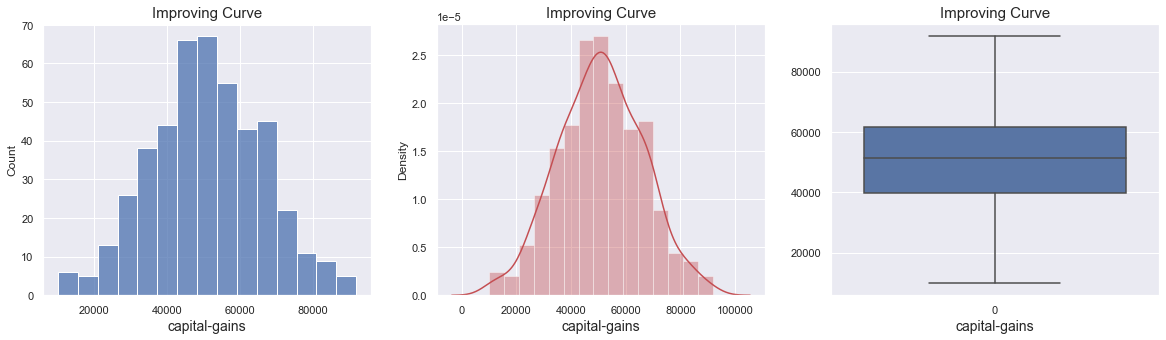

In [1099]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-gains']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-gains'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['capital-gains']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)
plt.show() #Now, check the normal curve

In [1100]:
df['capital-gains'].describe() #check the quartiles

count      455.000000
mean     50905.044318
std      15374.207434
min      10000.000000
25%      39900.000000
50%      51300.000000
75%      61600.000000
max      91900.000000
Name: capital-gains, dtype: float64

In [1101]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-gains'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-gains'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-gains'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.005515429975590974


In [1102]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['capital-gains'].mean())
print('Median of the column:----->',df['capital-gains'].median())
print('Mode of the column:----->',st.mode(df['capital-gains']))
print('std of the column:----->',df['capital-gains'].std())

Mean of the column:-----> 50905.04431831904
Median of the column:-----> 51300.0
Mode of the column:-----> 46300.0
std of the column:-----> 15374.207433665304


In [1103]:
df['capital-gains'] = df['capital-gains'].replace(46300.0, df['capital-gains'].mean())
#mean, median, mode values are not so good, so, replace mdoe value by column mean 

In [1104]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['capital-gains'].mean())
print('Median of the column:----->',df['capital-gains'].median())
print('Mode of the column:----->',st.mode(df['capital-gains']))
print('std of the column:----->',df['capital-gains'].std())

Mean of the column:-----> 50955.64920093793
Median of the column:-----> 51300.0
Mode of the column:-----> 50905.04431831904
std of the column:-----> 15366.526500560713


In [1105]:
print('Check the skewness in Column:---------->',df['capital-gains'].skew())#check the skewness

Check the skewness in Column:----------> -0.015149211738111387


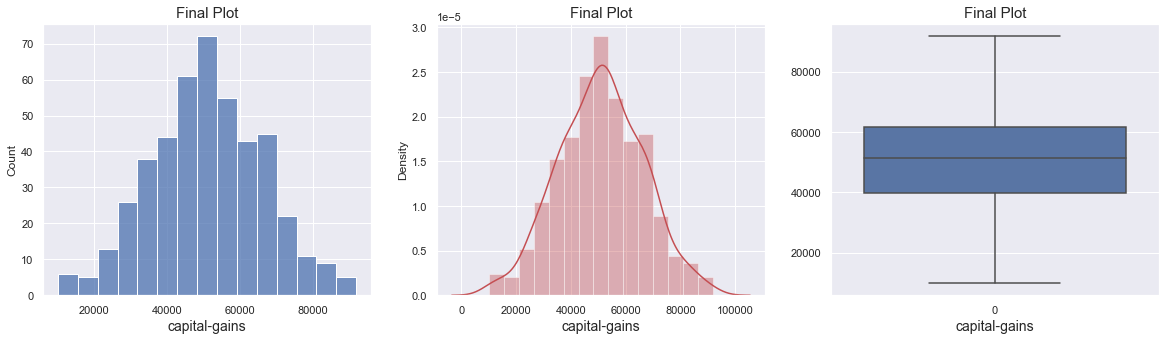

In [1106]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-gains']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-gains'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['capital-gains']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('capital-gains', fontsize= 14)
plt.show()

Text(0.5, 1.0, 'Plot1: capital-gains vs age')

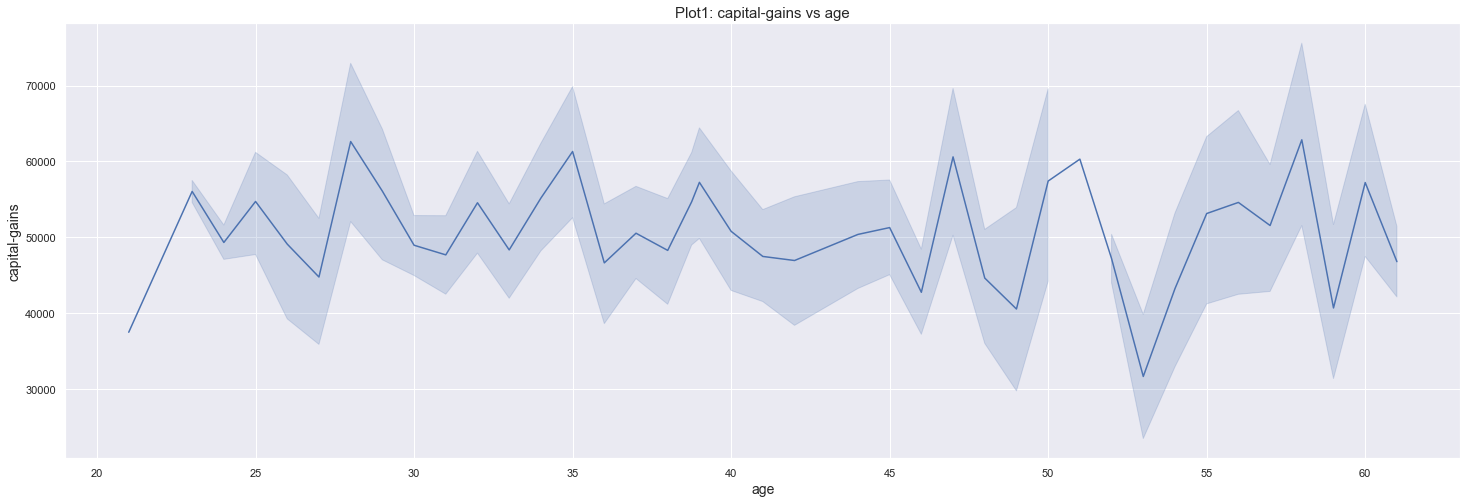

In [1107]:
#visualize this column by lineplot
plt.figure(figsize=(25,8))
sns.lineplot(y= 'capital-gains',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('capital-gains', fontsize = 14)
plt.title('Plot1: capital-gains vs age', fontsize = 15)

Text(0.5, 1.0, 'Plot2: capital-gains vs insured_sex')

<Figure size 1800x288 with 0 Axes>

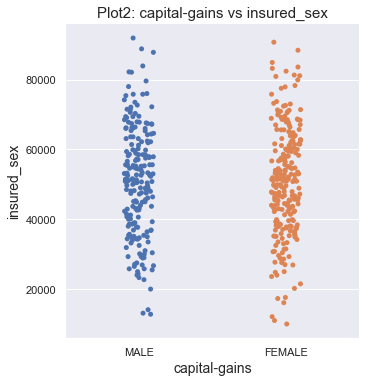

In [1108]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.catplot(y= 'capital-gains',x= 'insured_sex', data=df)
plt.ylabel('insured_sex', fontsize = 14)
plt.xlabel('capital-gains', fontsize = 14)
plt.title('Plot2: capital-gains vs insured_sex', fontsize = 15)

Text(0.5, 1.0, 'Plot3: capital-gains vs policy_state')

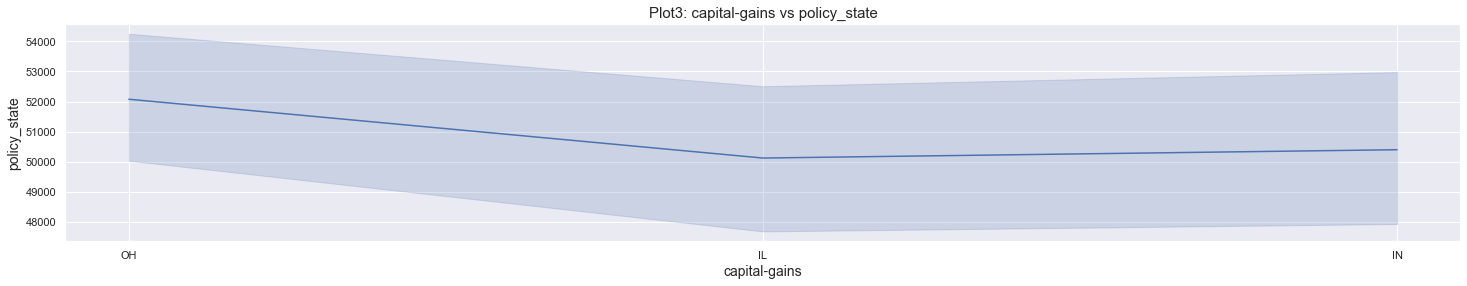

In [1109]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-gains',x= 'policy_state', data=df)
plt.ylabel('policy_state', fontsize = 14)
plt.xlabel('capital-gains', fontsize = 14)
plt.title('Plot3: capital-gains vs policy_state', fontsize = 15)

Text(0.5, 1.0, 'Plot4: capital-gains vs policy_annual_premium')

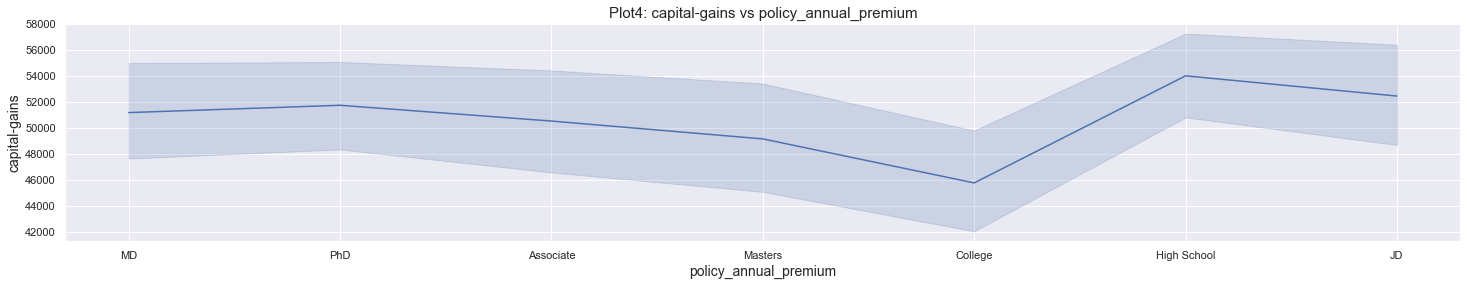

In [1110]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-gains',x= 'insured_education_level', data=df)
plt.xlabel('policy_annual_premium', fontsize = 14)
plt.ylabel('capital-gains', fontsize = 14)
plt.title('Plot4: capital-gains vs policy_annual_premium', fontsize = 15)

Text(0.5, 1.0, 'Plot5: capital-gains vs insured_occupation')

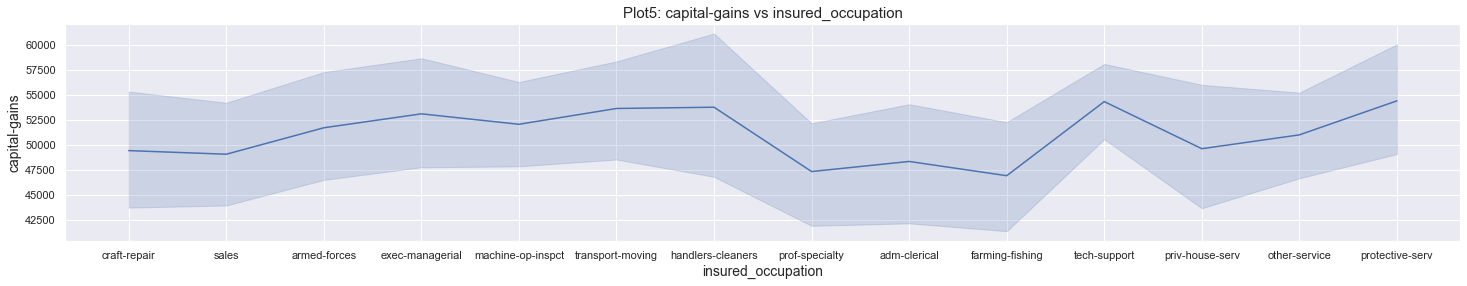

In [1111]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-gains',x= 'insured_occupation', data=df)
plt.xlabel('insured_occupation', fontsize = 14)
plt.ylabel('capital-gains', fontsize = 14)
plt.title('Plot5: capital-gains vs insured_occupation', fontsize = 15)

Text(0.5, 1.0, 'Plot6: capital-gains vs Policy_bind_Years')

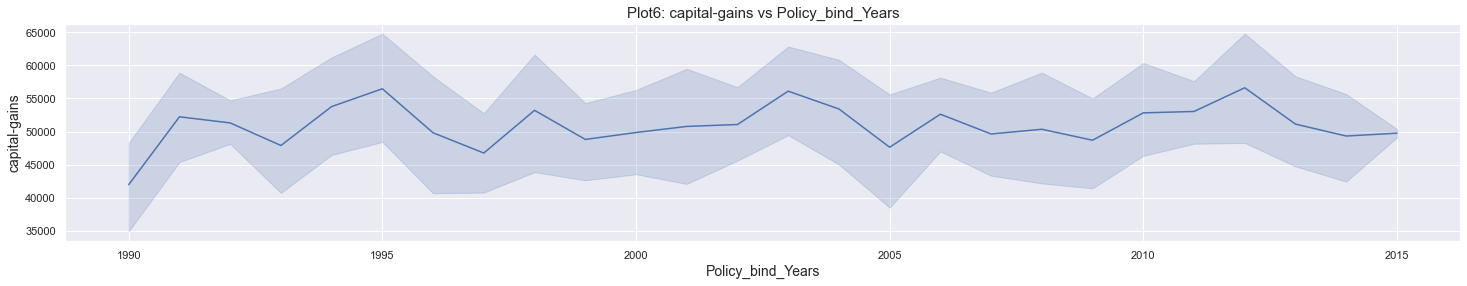

In [1112]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-gains',x= 'Policy_bind_Years', data=df)
plt.xlabel('Policy_bind_Years', fontsize = 14)
plt.ylabel('capital-gains', fontsize = 14)
plt.title('Plot6: capital-gains vs Policy_bind_Years', fontsize = 15)

Text(0.5, 1.0, 'Plot7: capital-gains vs fraud_reported')

<Figure size 1800x288 with 0 Axes>

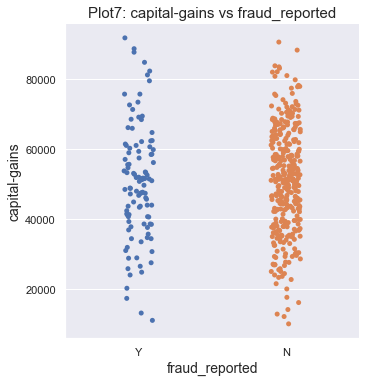

In [1113]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.catplot(y= 'capital-gains',x= 'fraud_reported', data=df)
plt.xlabel('fraud_reported', fontsize = 14)
plt.ylabel('capital-gains', fontsize = 14)
plt.title('Plot7: capital-gains vs fraud_reported', fontsize = 15)

Observation:
- Data Cleaning
1. 471 zero values found
2. No null values found
3. Skewness is improved from 0.47 to -0.015
4. Outliers are removed
5. Mean, median, mode values are improved
- Results by EDA
1. In plot1, As the age is low capital gains is low and at the age around 55-60, capital-gains is high. 
2. In plot2, Females has high and more capital gains than male
3. In plot3, Ohio has high capital gains than other states
4. In Plot4, PhD peoples have high capital gains than others
5. In plot5, Machine-opt-inspect have high capital gains than others
6. In plot6, We can see, around 1993-1995 and 2003-2004 capital gains has higher value than other years
7. In plot7, less peoples are reported as fraudulent and their capital gains are around 10000 to 90000 but not more than not fraudulent peoples

In [1114]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (455, 39)


# Column16: capital-loss

In [1115]:
df['capital-loss'].unique() #check the unique value

array([      0,  -62400,  -46000,  -32800,  -55500,  -37800,  -27300,
        -68200,  -30200,  -64000,  -49200,  -28700,  -46500,  -39600,
        -55000,  -45800,  -91200,  -66200,  -50000,  -50300,  -40600,
        -80600,  -20800,  -58400,  -31700,  -58100,  -24300,  -38800,
        -56800,  -63100,  -36200,  -69700,  -32100,  -47300,  -54800,
        -65600,  -20400,  -77500,  -38200,  -44600,  -44500,  -66900,
        -82400,  -59100,  -59300,  -31400,  -59900,  -58900,  -22300,
        -67900,  -57500,  -90200,  -13800,  -34400,  -36700,  -72500,
        -60500,  -60200,  -68700,  -10600,  -53700,  -53800,  -24700,
        -70200,  -51500,  -33100,  -19800,  -63400,  -37600,  -27600,
        -32300,  -82700,  -55600,  -77600,  -57100,  -63900,  -73900,
        -46800,  -73600,  -53600,  -48700,  -64300,  -43800,  -74300,
        -73400,  -83200,  -54300,  -37900,  -41600,  -36900,  -64700,
        -64100,  -43700,  -56900,  -91400,  -53300,  -45500,  -15600,
        -71000,  -51

In [1116]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-loss'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-loss'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-loss'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.3737384761467247


In [1117]:
df['capital-loss'].value_counts() #check the counts of unique value

 0        210
-50300      5
-49200      4
-32800      4
-68200      3
         ... 
-10600      1
-59100      1
-78600      1
-37600      1
-64000      1
Name: capital-loss, Length: 199, dtype: int64

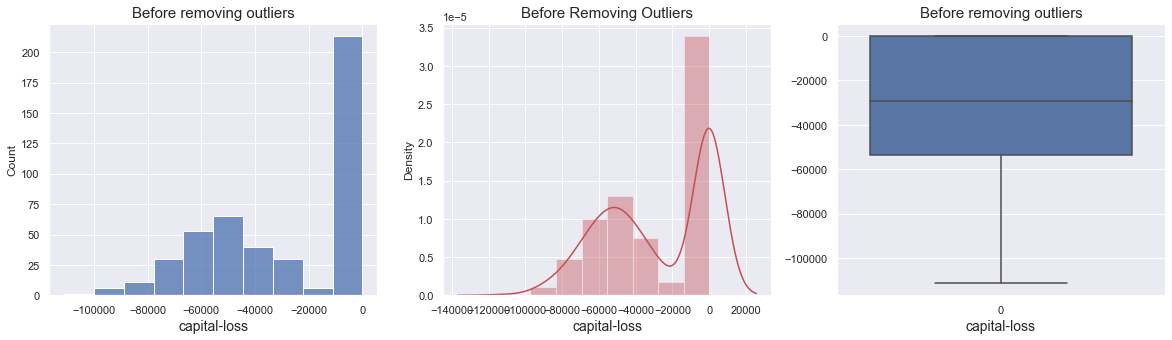

In [1118]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-loss']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-loss'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['capital-loss']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)
plt.show()

In [1119]:
df['capital-loss']=df['capital-loss'].loc[(df['capital-loss']!=0)] #drop the zero value

In [1120]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-loss'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-loss'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-loss'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 210

 **************************************************
Check the skewness in Column:----------> -0.11602215933553853


In [1121]:
df.dropna(subset=["capital-loss"], inplace=True) #drop the null values

In [1122]:
df['capital-loss'].unique() #check the unique values

array([ -62400.,  -46000.,  -32800.,  -55500.,  -37800.,  -27300.,
        -68200.,  -30200.,  -64000.,  -49200.,  -28700.,  -46500.,
        -39600.,  -55000.,  -45800.,  -91200.,  -66200.,  -50000.,
        -50300.,  -40600.,  -80600.,  -20800.,  -58400.,  -31700.,
        -58100.,  -24300.,  -38800.,  -56800.,  -63100.,  -36200.,
        -69700.,  -32100.,  -47300.,  -54800.,  -65600.,  -20400.,
        -77500.,  -38200.,  -44600.,  -44500.,  -66900.,  -82400.,
        -59100.,  -59300.,  -31400.,  -59900.,  -58900.,  -22300.,
        -67900.,  -57500.,  -90200.,  -13800.,  -34400.,  -36700.,
        -72500.,  -60500.,  -60200.,  -68700.,  -10600.,  -53700.,
        -53800.,  -24700.,  -70200.,  -51500.,  -33100.,  -19800.,
        -63400.,  -37600.,  -27600.,  -32300.,  -82700.,  -55600.,
        -77600.,  -57100.,  -63900.,  -73900.,  -46800.,  -73600.,
        -53600.,  -48700.,  -64300.,  -43800.,  -74300.,  -73400.,
        -83200.,  -54300.,  -37900.,  -41600.,  -36900.,  -647

In [1123]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-loss'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-loss'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-loss'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.11602215933553857


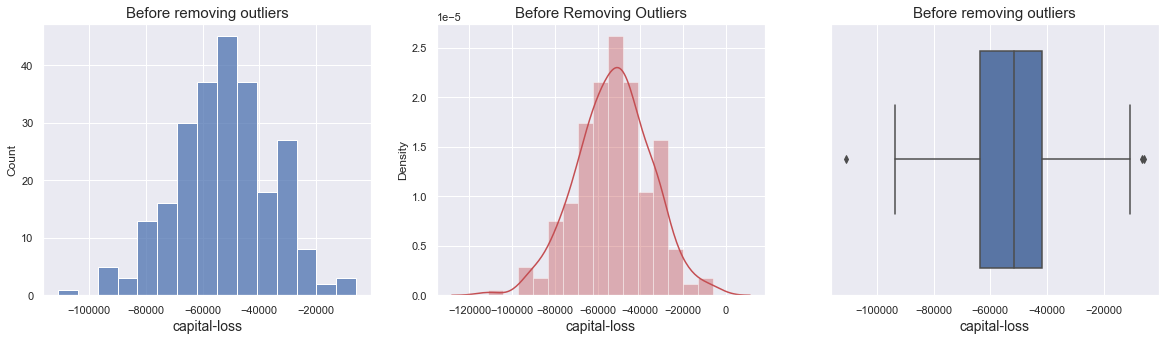

In [1124]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-loss']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-loss'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['capital-loss']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)
plt.show()

In [1125]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['capital-loss'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['capital-loss'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['capital-loss'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['capital-loss'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 22100.0

 **************************************************
Higher range:-
 (array([135, 239], dtype=int64),)

 **************************************************
Lower range:- 
 (array([198], dtype=int64),)


In [1126]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (245, 39)
New Shape:------>  (242, 39)


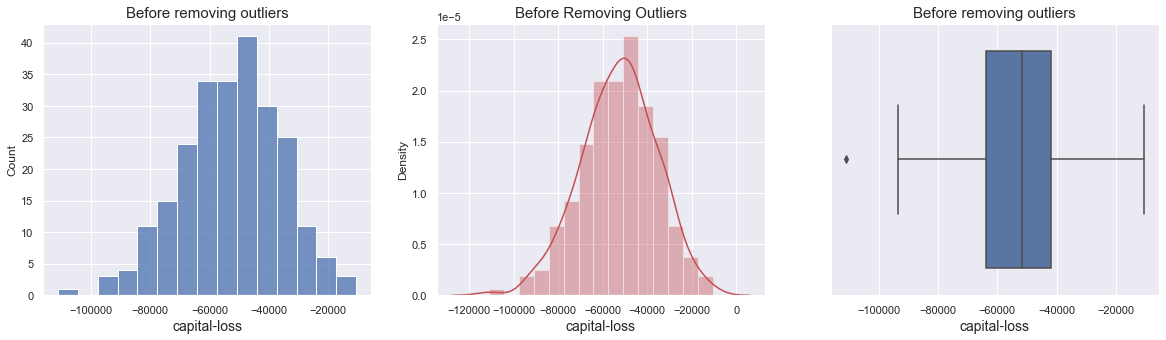

In [1127]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-loss']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-loss'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['capital-loss']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)
plt.show()

In [1128]:
df['capital-loss'].unique() #check the unique value
#we can see, there is only one value which is greater than -100000, that is -111100 

array([ -62400.,  -46000.,  -32800.,  -55500.,  -37800.,  -27300.,
        -68200.,  -30200.,  -64000.,  -49200.,  -28700.,  -46500.,
        -39600.,  -55000.,  -45800.,  -91200.,  -66200.,  -50000.,
        -50300.,  -40600.,  -80600.,  -20800.,  -58400.,  -31700.,
        -58100.,  -24300.,  -38800.,  -56800.,  -63100.,  -36200.,
        -69700.,  -32100.,  -47300.,  -54800.,  -65600.,  -20400.,
        -77500.,  -38200.,  -44600.,  -44500.,  -66900.,  -82400.,
        -59100.,  -59300.,  -31400.,  -59900.,  -58900.,  -22300.,
        -67900.,  -57500.,  -90200.,  -13800.,  -34400.,  -36700.,
        -72500.,  -60500.,  -60200.,  -68700.,  -10600.,  -53700.,
        -53800.,  -24700.,  -70200.,  -51500.,  -33100.,  -19800.,
        -63400.,  -37600.,  -27600.,  -32300.,  -82700.,  -55600.,
        -77600.,  -57100.,  -63900.,  -73900.,  -46800.,  -73600.,
        -53600.,  -48700.,  -64300.,  -43800.,  -74300.,  -73400.,
        -83200.,  -54300.,  -37900.,  -41600.,  -36900.,  -647

In [1129]:
df['capital-loss'] = df['capital-loss'].replace(-111100,df['capital-loss'].mean())
#replace this value by column mean

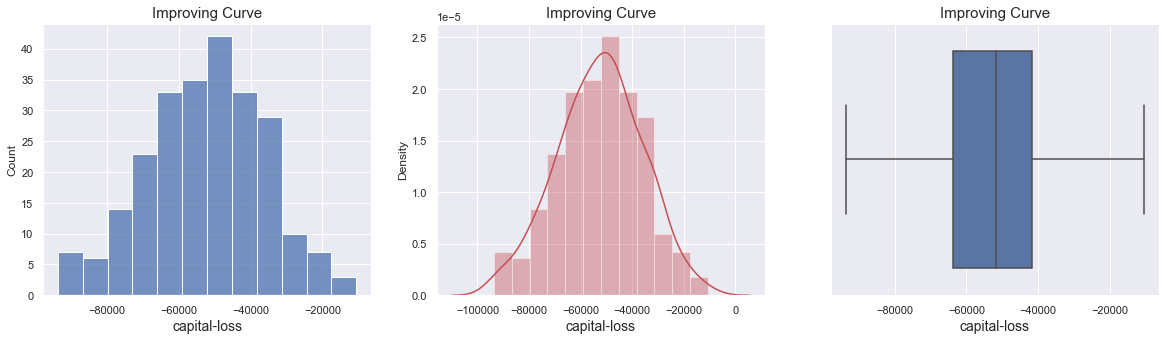

In [1130]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-loss']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-loss'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['capital-loss']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)
plt.show()

In [1131]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['capital-loss'].mean())
print('Median of the column:----->',df['capital-loss'].median())
print('Mode of the column:----->',st.mode(df['capital-loss']))
print('std of the column:----->',df['capital-loss'].std())

Mean of the column:-----> -52544.15340482207
Median of the column:-----> -51800.0
Mode of the column:-----> -50300.0
std of the column:-----> 16365.210736577235


In [1132]:
df['capital-loss'] = df['capital-loss'].replace(-50300.0,df['capital-loss'].mean())
#replace the mode value by column mean to get more normal curve

In [1133]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['capital-loss'].mean())
print('Median of the column:----->',df['capital-loss'].median())
print('Mode of the column:----->',st.mode(df['capital-loss']))
print('std of the column:----->',df['capital-loss'].std())

Mean of the column:-----> -52590.52021070682
Median of the column:-----> -52522.07670241104
Mode of the column:-----> -52544.15340482207
std of the column:-----> 16361.95213492755


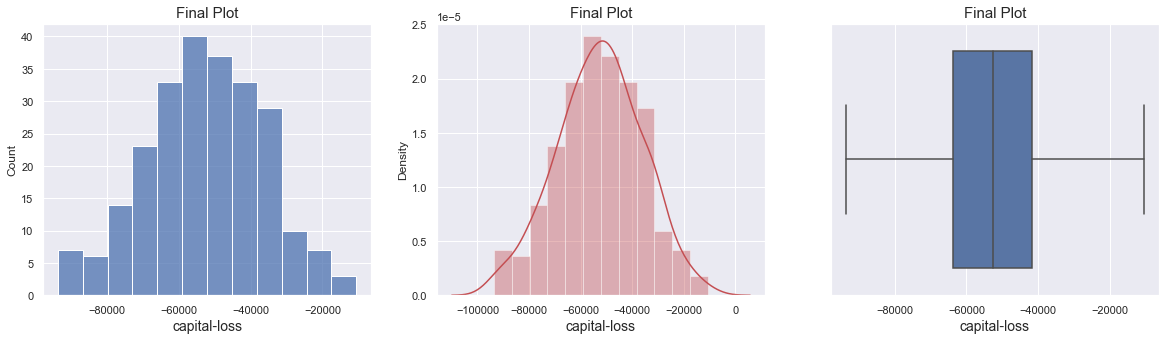

In [1134]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['capital-loss']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['capital-loss'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['capital-loss']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('capital-loss', fontsize= 14)
plt.show()

In [1135]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['capital-loss'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['capital-loss'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['capital-loss'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.10207826070112849


Text(0.5, 1.0, 'Plot1: capital-gains vs age')

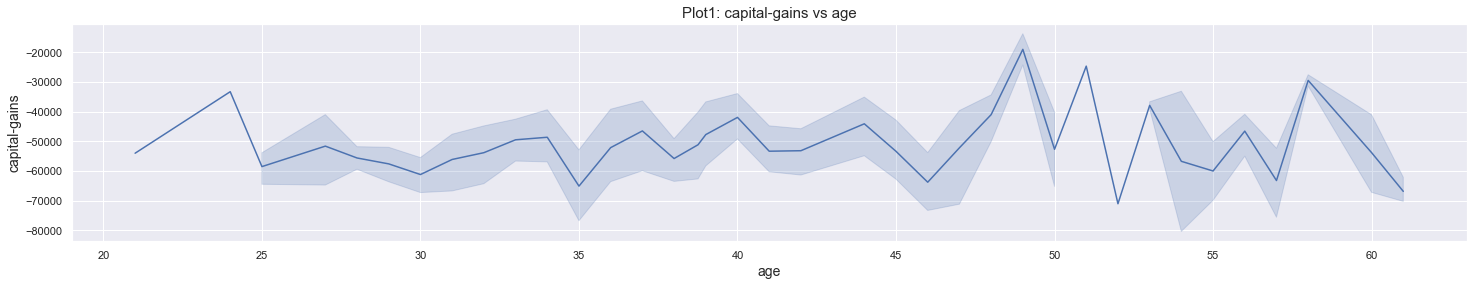

In [1136]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('capital-gains', fontsize = 14)
plt.title('Plot1: capital-gains vs age', fontsize = 15)

Text(0.5, 1.0, 'Plot2: capital-loss vs policy_state')

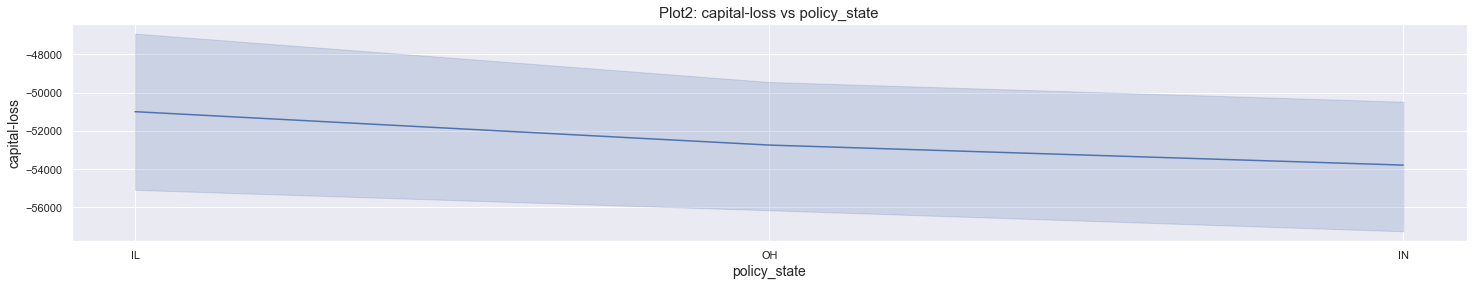

In [1137]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'policy_state', data=df)
plt.xlabel('policy_state', fontsize = 14)
plt.ylabel('capital-loss', fontsize = 14)
plt.title('Plot2: capital-loss vs policy_state', fontsize = 15)

Text(0.5, 1.0, 'Plot3: capital-loss vs insured_sex')

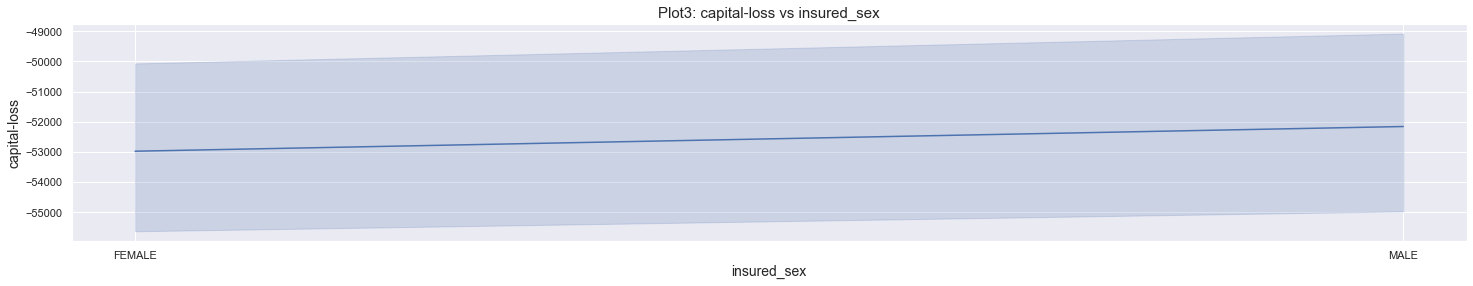

In [1138]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'insured_sex', data=df)
plt.xlabel('insured_sex', fontsize = 14)
plt.ylabel('capital-loss', fontsize = 14)
plt.title('Plot3: capital-loss vs insured_sex', fontsize = 15)

Text(0.5, 1.0, 'Plot4: capital-loss vs insured_education_level')

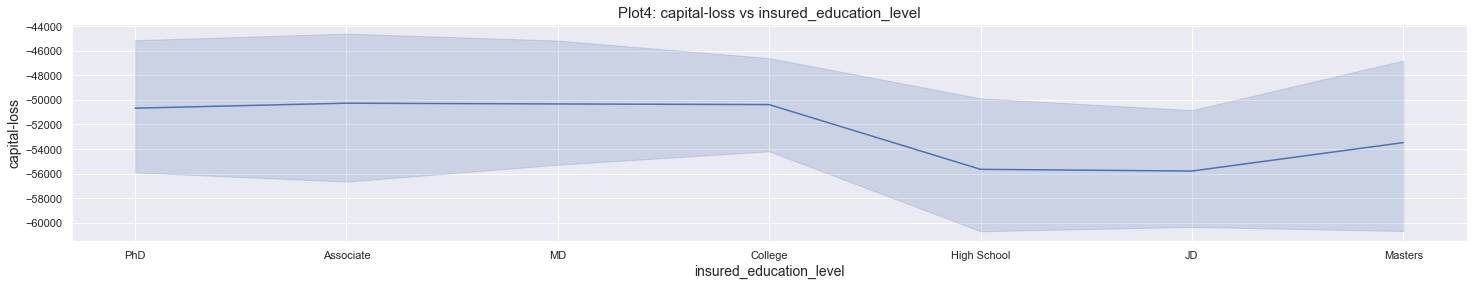

In [1139]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'insured_education_level', data=df)
plt.xlabel('insured_education_level', fontsize = 14)
plt.ylabel('capital-loss', fontsize = 14)
plt.title('Plot4: capital-loss vs insured_education_level', fontsize = 15)

Text(0.5, 1.0, 'Plot5: capital-loss vs insured_occupation')

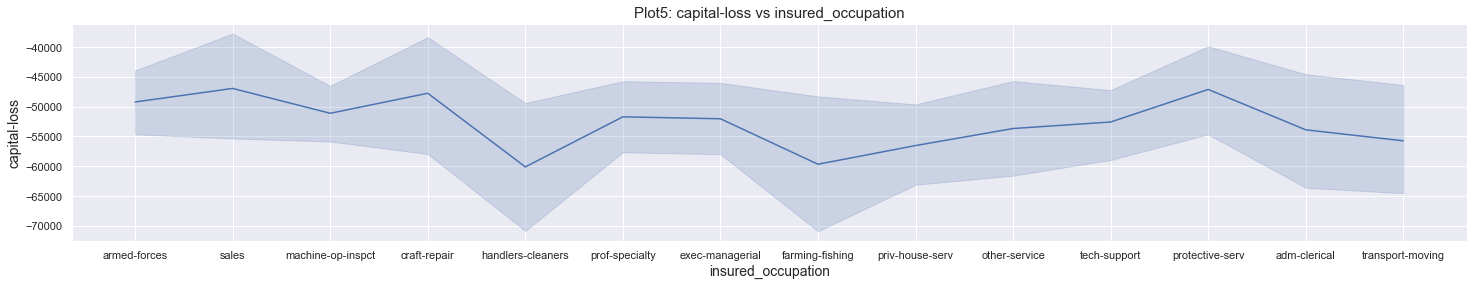

In [1140]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'insured_occupation', data=df)
plt.xlabel('insured_occupation', fontsize = 14)
plt.ylabel('capital-loss', fontsize = 14)
plt.title('Plot5: capital-loss vs insured_occupation', fontsize = 15)

Text(0.5, 1.0, 'Plot7: capital-loss vs fraud_reported')

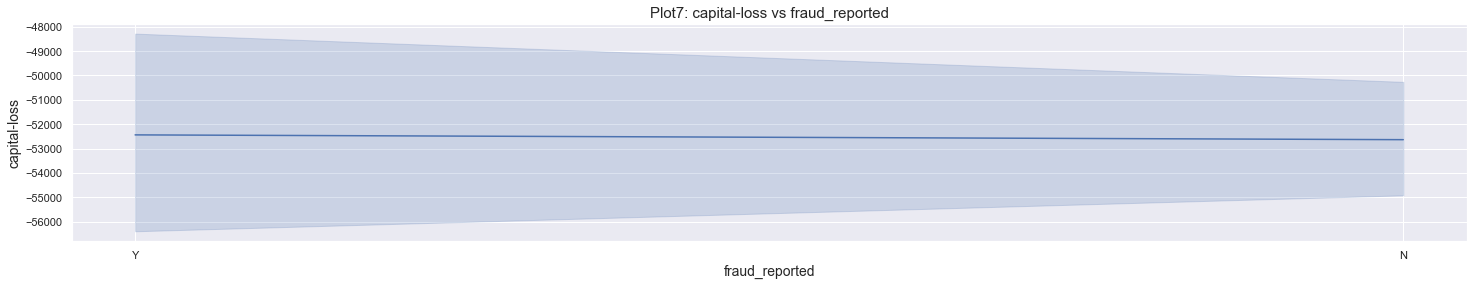

In [1141]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'fraud_reported', data=df)
plt.xlabel('fraud_reported', fontsize = 14)
plt.ylabel('capital-loss', fontsize = 14)
plt.title('Plot7: capital-loss vs fraud_reported', fontsize = 15)

Text(0.5, 1.0, 'Plot6: capital-loss vs Policy_bind_Years')

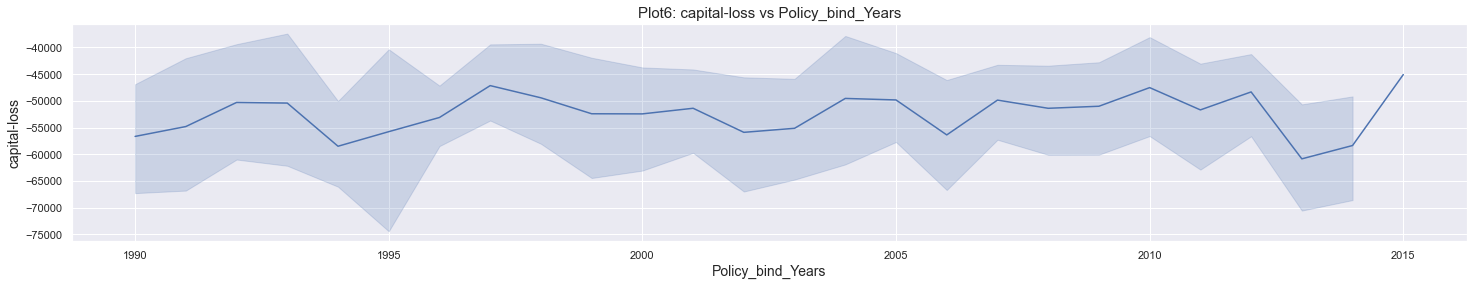

In [1142]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(y= 'capital-loss',x= 'Policy_bind_Years', data=df)
plt.xlabel('Policy_bind_Years', fontsize = 14)
plt.ylabel('capital-loss', fontsize = 14)
plt.title('Plot6: capital-loss vs Policy_bind_Years', fontsize = 15)

Observation:
- Data Cleaning
1. 210 zero values found
2. No null values found
3. Skewness is improved from -0.3 to -0.1
4. Outliers are removed
5. Mean, median, mode values are improved
- Results by EDA
1. In plot1, As the age is low, capital loss is high and at the age around 55-60, capital-loss is low. 
2. In plot2, IN has high capital loss than other states
3. In plot3, Males has high capital loss than females
4. In Plot4, JD and high school peoples has high capital loss than others
5. In plot5, Handler-cleaners and tech-support has high capital loss than others
6. In plot6, We can see, around 2003-2005 has capital loss higher than other years
7. In plot7, almost constant line see in fraud_reported vs capital loss curve

In [1143]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 39)


# Column17: incident_date

In [1144]:
df['incident_date'].unique() #check the unique values

array(['10-01-2015', '17-02-2015', '08-01-2015', '15-01-2015',
       '19-01-2015', '22-02-2015', '11-01-2015', '07-01-2015',
       '09-01-2015', '24-01-2015', '14-02-2015', '27-01-2015',
       '27-02-2015', '28-02-2015', '30-01-2015', '20-02-2015',
       '08-02-2015', '19-02-2015', '09-02-2015', '21-02-2015',
       '29-01-2015', '15-02-2015', '01-01-2015', '06-01-2015',
       '26-02-2015', '06-02-2015', '01-02-2015', '18-02-2015',
       '24-02-2015', '05-02-2015', '25-01-2015', '28-01-2015',
       '21-01-2015', '12-01-2015', '13-02-2015', '02-01-2015',
       '16-01-2015', '10-02-2015', '14-01-2015', '16-02-2015',
       '02-02-2015', '26-01-2015', '17-01-2015', '23-02-2015',
       '18-01-2015', '31-01-2015', '04-02-2015', '04-01-2015',
       '03-01-2015', '25-02-2015', '22-01-2015', '20-01-2015',
       '11-02-2015', '01-03-2015', '23-01-2015', '13-01-2015',
       '12-02-2015', '07-02-2015'], dtype=object)

In [1145]:
#divide the date, month, years into three columns.
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_Month']=df['incident_date'].apply(lambda x:x.month)
df['incident_Day']=df['incident_date'].apply(lambda x:x.day)
df['incident_Years']=df['incident_date'].apply(lambda x:x.year)

In [1146]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['incident_Month'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['incident_Month'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['incident_Month'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 1.387423946615087


In [1147]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['incident_Day'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['incident_Day'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['incident_Day'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.06554106455630816


In [1148]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['incident_Years'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['incident_Years'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['incident_Years'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0


In [1149]:
df['incident_Years'].value_counts() #check the counts of unique values

2015    242
Name: incident_Years, dtype: int64

In [1150]:
df.drop(columns='incident_Years',inplace = True) #drop the column

In [1151]:
df.drop(columns='incident_date',inplace = True) #drop the column

Observation:
- Data Cleaning
1. No zero values found
2. No null values found
3. Skewness is less
4. split the column into three parts Day, month, years
5. Years column contain same value which is 2015, so, we have to drop this value
6. we drop the main 'incident_date' column also, which is unnecessary

In [1152]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# column18: incident_type

In [1153]:
df['incident_type'].unique() #check the unique value

array(['Single Vehicle Collision', 'Vehicle Theft', 'Parked Car',
       'Multi-vehicle Collision'], dtype=object)

In [1154]:
df['incident_type'].value_counts() #check the counts of unique value

Multi-vehicle Collision     103
Single Vehicle Collision     97
Parked Car                   21
Vehicle Theft                21
Name: incident_type, dtype: int64

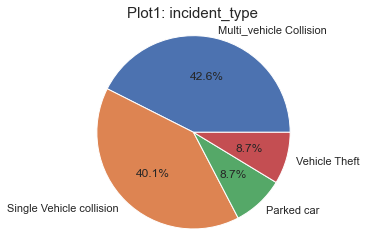

In [1155]:
#visualize by using pieplot
Values = [103,97,21,21]
my_labels = 'Multi_vehicle Collision','Single Vehicle collision','Parked car','Vehicle Theft'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: incident_type', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Plot1: incident_type vs age')

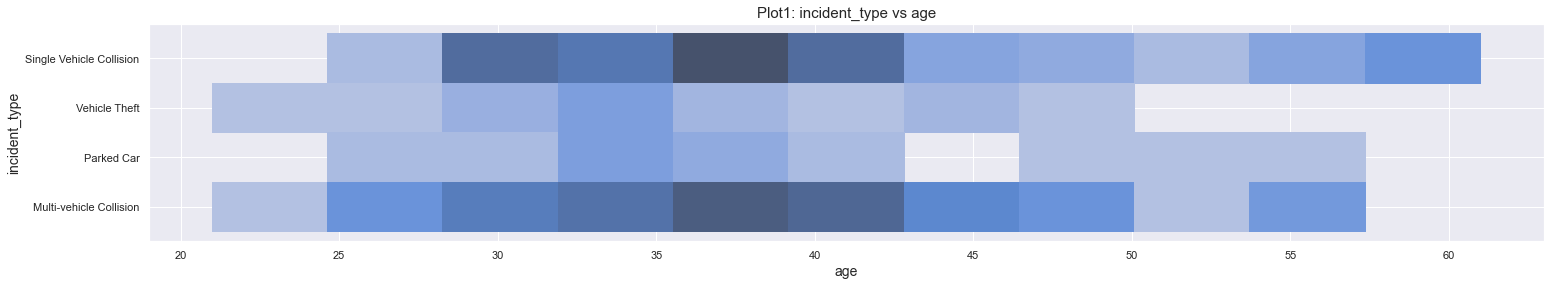

In [1156]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.histplot(y= 'incident_type',x= 'age', data=df)
plt.xlabel('age', fontsize = 14)
plt.ylabel('incident_type', fontsize = 14)
plt.title('Plot1: incident_type vs age', fontsize = 15)

In [1157]:
df.groupby('incident_type')['insured_sex'].value_counts().sort_index(ascending=False)
#check the relationship between insured_sex and incident_type

incident_type             insured_sex
Vehicle Theft             MALE           10
                          FEMALE         11
Single Vehicle Collision  MALE           46
                          FEMALE         51
Parked Car                MALE            8
                          FEMALE         13
Multi-vehicle Collision   MALE           51
                          FEMALE         52
Name: insured_sex, dtype: int64

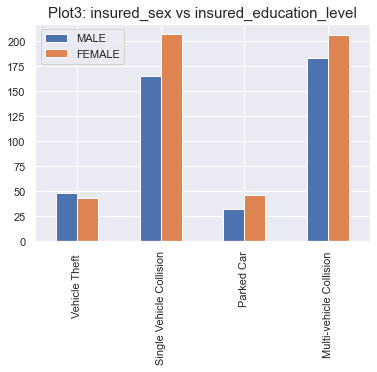

In [1158]:
#visualize by using barplot
df_education = {'MALE': [48,165,32,183],
        'FEMALE': [43,207,46,206]}
df1 = pd.DataFrame(df_education,columns=['MALE','FEMALE'], index = ['Vehicle Theft ','Single Vehicle Collision','Parked Car','Multi-vehicle Collision'])
df1.plot.bar()
plt.title('Plot3: insured_sex vs insured_education_level', fontsize = 15)
plt.show()

In [1159]:
df.groupby('incident_type')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and incident_type

incident_type             fraud_reported
Vehicle Theft             Y                  3
                          N                 18
Single Vehicle Collision  Y                 27
                          N                 70
Parked Car                N                 21
Multi-vehicle Collision   Y                 27
                          N                 76
Name: fraud_reported, dtype: int64

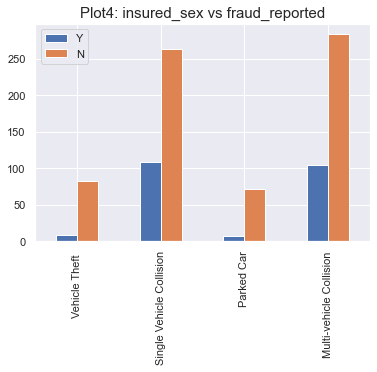

In [1160]:
#visualize by using barplot
df_type = {'Y': [8,109,7,105],
        'N': [83,263,71,284]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['Vehicle Theft ','Single Vehicle Collision','Parked Car','Multi-vehicle Collision'])
df1.plot.bar()
plt.title('Plot4: insured_sex vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Multi vehicle collision are more in percentage than others. 
2. In plot2, At the age of around 40, Multi vehicle collision are more in numbers than others
3. In plot3, Females has more collisions than males
4. In Plot4, fraud reported in case of single vehicle collision are more than others

In [1161]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# column19: collision_type

In [1162]:
df['collision_type'].unique() #check the unique value

array(['Front Collision', '?', 'Rear Collision', 'Side Collision'],
      dtype=object)

In [1163]:
df['collision_type'].value_counts() #check the counts of unique value

Front Collision    71
Side Collision     65
Rear Collision     64
?                  42
Name: collision_type, dtype: int64

In [1164]:
df['collision_type'] = df['collision_type'].replace('?', 'Front Collision')
#replace the ? mark with front collision 

In [1165]:
df['collision_type'].value_counts() #now, check the counts of unique value

Front Collision    113
Side Collision      65
Rear Collision      64
Name: collision_type, dtype: int64

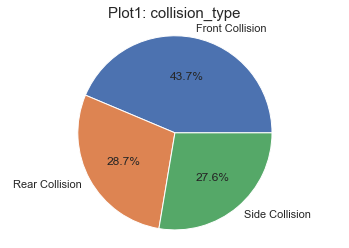

In [1166]:
#visualize by using pieplot
Values = [406,267,257]
my_labels = 'Front Collision','Rear Collision','Side Collision'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: collision_type', fontsize=15)
plt.axis('equal')
plt.show()

In [1167]:
df.groupby('collision_type')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and collision_type

collision_type   fraud_reported
Side Collision   Y                 13
                 N                 52
Rear Collision   Y                 21
                 N                 43
Front Collision  Y                 23
                 N                 90
Name: fraud_reported, dtype: int64

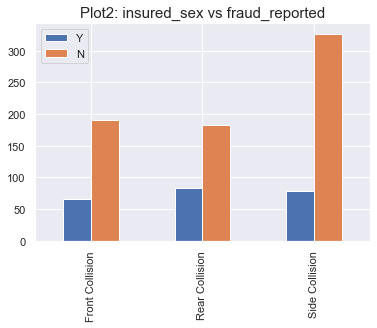

In [1168]:
#visualize by using barplot
df_type = {'Y': [66,84,79],
        'N': [191,183,327]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['Front Collision','Rear Collision','Side Collision'])
df1.plot.bar()
plt.title('Plot2: insured_sex vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Front collision are more in percentage than others. 
2. In plot2, fraud reported in front collision are less than others
3. In plot2, fraud reported in Rear collision are less than others

In [1169]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# Column20: incident_severity

In [1170]:
df['incident_severity'].unique() #check the unique values

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [1171]:
df['incident_severity'].value_counts() #check the counts of unique values

Minor Damage      87
Total Loss        79
Major Damage      59
Trivial Damage    17
Name: incident_severity, dtype: int64

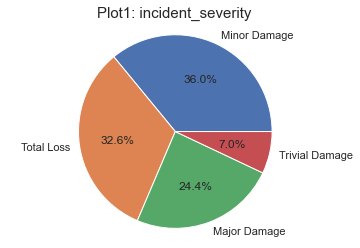

In [1172]:
#visualize by using pieplot
Values = [87,79,59,17]
my_labels = 'Minor Damage','Total Loss','Major Damage','Trivial Damage'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: incident_severity', fontsize=15)
plt.axis('equal')
plt.show()

In [1173]:
df.groupby('incident_severity')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and incident_severity

incident_severity  fraud_reported
Trivial Damage     Y                  2
                   N                 15
Total Loss         Y                 11
                   N                 68
Minor Damage       Y                  6
                   N                 81
Major Damage       Y                 38
                   N                 21
Name: fraud_reported, dtype: int64

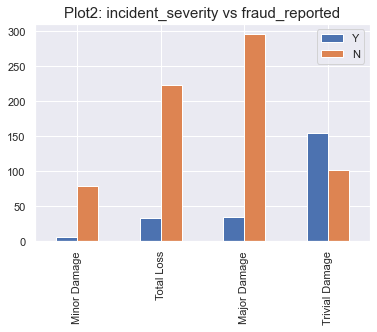

In [1174]:
#visualize by using barplot
df_type = {'Y': [6,33,35,155],
        'N': [79,224,296,102]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['Minor Damage','Total Loss','Major Damage','Trivial Damage'])
df1.plot.bar()
plt.title('Plot2: incident_severity vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Minor Damage are more in percentage than others. 
2. In plot2, fraud reported in Minor Damage are less than others
3. In plot2, fraud reported in Trivial Damage are more than others

In [1175]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# Column21: authorities_contacted

In [1176]:
df['authorities_contacted'].unique() #check the unique values

array(['Police', 'None', 'Other', 'Ambulance', 'Fire'], dtype=object)

In [1177]:
df['authorities_contacted'].value_counts() #check the count of unique values

Police       67
Ambulance    56
Other        47
Fire         47
None         25
Name: authorities_contacted, dtype: int64

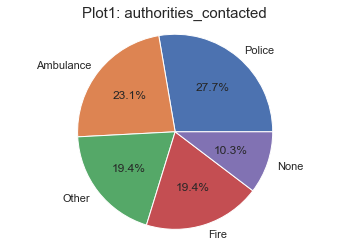

In [1178]:
#visualize by using pieplot
Values = [67,56,47,47,25]
my_labels = 'Police','Ambulance','Other','Fire','None'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: authorities_contacted', fontsize=15)
plt.axis('equal')
plt.show()

In [1179]:
df.groupby('authorities_contacted')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and authorities_contacted

authorities_contacted  fraud_reported
Police                 Y                 14
                       N                 53
Other                  Y                 15
                       N                 32
None                   Y                  2
                       N                 23
Fire                   Y                 14
                       N                 33
Ambulance              Y                 12
                       N                 44
Name: fraud_reported, dtype: int64

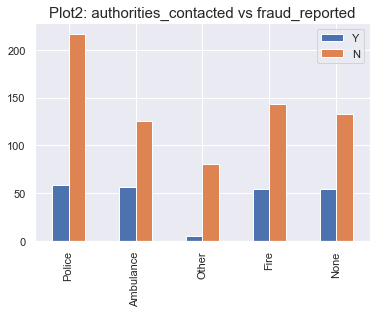

In [1180]:
#visualize by using barplot
df_type = {'Y': [59,57,5,54,54],
        'N': [217,126,81,144,133]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['Police','Ambulance','Other','Fire','None'])
df1.plot.bar()
plt.title('Plot2: authorities_contacted vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Police are more in percentage than others. 
2. In plot2, fraud reported in police category are more than others
3. In plot2, fraud reported in other category are less than others

In [1181]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# Column22: incident_state

In [1182]:
df['incident_state'].unique() #check the unqiue value

array(['OH', 'NY', 'SC', 'VA', 'WV', 'NC', 'PA'], dtype=object)

In [1183]:
df['incident_state'].value_counts() #check the counts of unique value

NY    67
WV    60
SC    58
VA    27
NC    21
OH     6
PA     3
Name: incident_state, dtype: int64

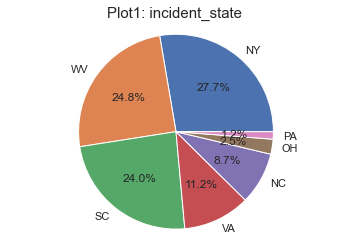

In [1184]:
#visualize by using pieplot
Values = [67,60,58,27,21,6,3]
my_labels = 'NY','WV','SC','VA','NC','OH','PA'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: incident_state', fontsize=15)
plt.axis('equal')
plt.show()

In [1185]:
df.groupby('incident_state')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and incident_state

incident_state  fraud_reported
WV              Y                 12
                N                 48
VA              Y                  3
                N                 24
SC              Y                 18
                N                 40
PA              Y                  1
                N                  2
OH              Y                  3
                N                  3
NY              Y                 14
                N                 53
NC              Y                  6
                N                 15
Name: fraud_reported, dtype: int64

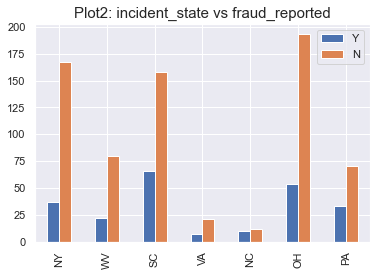

In [1186]:
#visualize by using barplot
df_type = {'Y': [37,22,66,7,10,54,33],
        'N': [167,80,158,21,12,193,70]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['NY','WV','SC','VA','NC','OH','PA'])
df1.plot.bar()
plt.title('Plot2: incident_state vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, NY are more in percentage than others. 
2. In plot2, fraud reported in SC as well as OH are more than others
3. In plot2, fraud reported in VA as well as NC are less than others

In [1187]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# Column23: incident_city

In [1188]:
df['incident_city'].unique() #check the unique value

array(['Arlington', 'Springfield', 'Northbrook', 'Columbus', 'Hillsdale',
       'Northbend', 'Riverwood'], dtype=object)

In [1189]:
df['incident_city'].value_counts() #check the counts of unique value

Arlington      43
Springfield    41
Columbus       34
Hillsdale      32
Northbrook     31
Riverwood      31
Northbend      30
Name: incident_city, dtype: int64

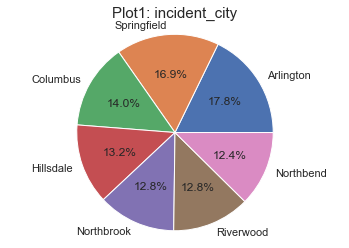

In [1190]:
#visualize by using pieplot
Values = [43,41,34,32,31,31,30]
my_labels = 'Arlington','Springfield','Columbus','Hillsdale','Northbrook','Riverwood','Northbend'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: incident_city', fontsize=15)
plt.axis('equal')
plt.show()

In [1191]:
df.groupby('incident_city')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and incident_city

incident_city  fraud_reported
Springfield    Y                  9
               N                 32
Riverwood      Y                  7
               N                 24
Northbrook     Y                  4
               N                 27
Northbend      Y                  6
               N                 24
Hillsdale      Y                  9
               N                 23
Columbus       Y                  8
               N                 26
Arlington      Y                 14
               N                 29
Name: fraud_reported, dtype: int64

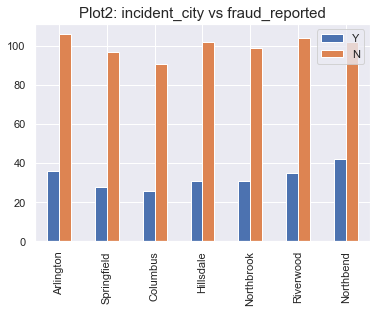

In [1192]:
#visualize by using barplot
df_type = {'Y': [36,28,26,31,31,35,42],
        'N': [106,97,91,102,99,104,102]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['Arlington','Springfield','Columbus','Hillsdale','Northbrook','Riverwood','Northbend'])
df1.plot.bar()
plt.title('Plot2: incident_city vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Arlington are more in percentage than others. 
2. In plot2, fraud reported in Northbend, riverwood as well as Arlington are more than others
3. In plot2, fraud reported in Columbus are less than others

In [1193]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 40)


# Column24: incident_location

In [1194]:
df['incident_location'].unique() #check the unique value

array(['6956 Maple Drive', '3041 3rd Ave', '6582 Elm Lane',
       '6851 3rd Drive', '3842 Solo Ridge', '8101 3rd Ridge',
       '2526 Embaracadero Ave', '3790 Andromedia Hwy',
       '8353 Britain Ridge', '3104 Sky Drive', '1699 Oak Drive',
       '7466 MLK Ridge', '5821 2nd St', '4866 4th Hwy', '4296 Pine Hwy',
       '9169 Pine Ridge', '5783 Oak Ave', '8006 Maple Hwy',
       '6751 Pine Ridge', '3087 Oak Hwy', '2333 Maple Lane',
       '1135 Solo Lane', '3289 Britain Drive', '2199 Texas Drive',
       '1028 Sky Lane', '8085 Andromedia St', '7253 MLK St',
       '4539 Texas St', '8118 Elm Ridge', '3814 Britain Drive',
       '1598 3rd Drive', '7740 MLK St', '8983 Francis Ridge',
       '2808 Elm St', '4965 MLK Drive', '2577 Washington Drive',
       '9358 Texas Ridge', '9101 2nd Hwy', '9484 Pine Drive',
       '7582 Pine Drive', '5621 4th Ave', '1562 Britain St',
       '1681 Cherokee Hwy', '1815 Cherokee Drive', '9316 Pine Ave',
       '2733 Texas Drive', '8689 Maple Hwy', '4098 Wea

In [1195]:
df['incident_location'].value_counts() #check the counts of unique value

1371 Texas Lane        1
9787 Andromedia Ave    1
7705 Best Ridge        1
1699 Oak Drive         1
5821 2nd St            1
                      ..
3835 5th Ave           1
7782 Rock St           1
1951 Best Ave          1
1275 4th Ridge         1
5771 Best St           1
Name: incident_location, Length: 242, dtype: int64

In [1196]:
df.drop(columns='incident_location', inplace=True ) #drop this column

Observation:
1. Incident loaction is not necessary data for fraud detection, that's why we drop this column

In [1197]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 39)


# Column25: incident_hour_of_the_day

In [1198]:
df['incident_hour_of_the_day'].unique() #check the unqiue value

array([ 5, 20, 12, 19,  8,  1, 15, 14,  7, 22,  6, 13,  3, 16,  4,  0, 21,
        9, 23, 18, 11, 17, 10,  2], dtype=int64)

In [1199]:
df['incident_hour_of_the_day'].value_counts() #check the counts of unique value

0     15
3     15
17    15
9     13
21    13
23    13
18    12
12    11
8     11
5     11
10    11
13    11
4     10
16    10
22     9
20     9
7      9
6      8
14     8
19     7
15     7
1      6
11     5
2      3
Name: incident_hour_of_the_day, dtype: int64

In [1200]:
df.drop(columns='incident_hour_of_the_day', inplace=True ) #drop this column

Observation:
1. incident_hour_of_the_day is not necessary data for fraud detection, that's why we drop this column

In [1201]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 38)


# Column26: number_of_vehicles_involved

In [1202]:
df['number_of_vehicles_involved'].unique() #check the unique values

array([1, 3, 2, 4], dtype=int64)

In [1203]:
df['number_of_vehicles_involved'].value_counts() #check the counts of unique value

1    139
3     91
4      8
2      4
Name: number_of_vehicles_involved, dtype: int64

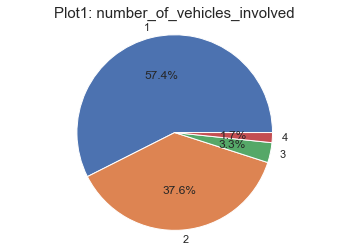

In [1204]:
#visualize by using pieplot
Values = [139,91,8,4]
my_labels = '1','2','3','4'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: number_of_vehicles_involved', fontsize=15)
plt.axis('equal')
plt.show()

In [1205]:
df.groupby('number_of_vehicles_involved')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and number_of_vehicles_involved

number_of_vehicles_involved  fraud_reported
4                            Y                   2
                             N                   6
3                            Y                  24
                             N                  67
2                            Y                   1
                             N                   3
1                            Y                  30
                             N                 109
Name: fraud_reported, dtype: int64

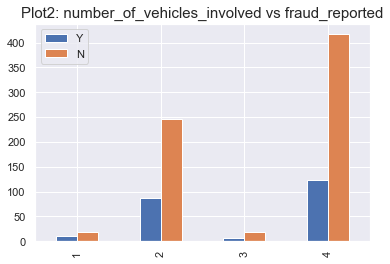

In [1206]:
#visualize by using barplot
df_type = {'Y': [11,87,7,124],
        'N': [19,246,19,417]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['1','2','3','4'])
df1.plot.bar()
plt.title('Plot2: number_of_vehicles_involved vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Collision by 1 vehicle are more than others
2. In plot2, 4 Vehicle collisions are more in number and 1 and 3 vehicle collisions are very less in number when we compared it by fraud recorded 

In [1207]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 38)


# Column27: property_damage

In [1208]:
df['property_damage'].unique() #check the unique value

array(['?', 'NO', 'YES'], dtype=object)

In [1209]:
df['property_damage'].value_counts() #check the counts of unique value

NO     90
?      78
YES    74
Name: property_damage, dtype: int64

In [1210]:
df.drop(columns='property_damage', inplace=True ) #drop this column

Observation:
1. 78 '?' in this column, which is not good for our model
2. we can not replace these 78 values to any other data.
3. finally, we decide to drop this column

In [1211]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 37)


# Column28: bodily_injuries

In [1212]:
df['bodily_injuries'].unique()#check the unique value

array([1, 0, 2], dtype=int64)

In [1213]:
df['bodily_injuries'].value_counts()#check the counts of unique value

2    91
0    77
1    74
Name: bodily_injuries, dtype: int64

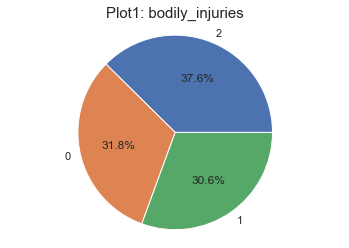

In [1214]:
#visualize by using pieplot
Values = [91,77,74]
my_labels = '2','0','1'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: bodily_injuries', fontsize=15)
plt.axis('equal')
plt.show()

In [1215]:
df.groupby('bodily_injuries')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and bodily_injuries

bodily_injuries  fraud_reported
2                Y                 22
                 N                 69
1                Y                 17
                 N                 57
0                Y                 18
                 N                 59
Name: fraud_reported, dtype: int64

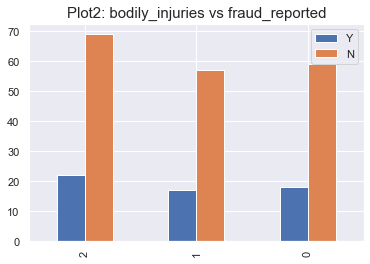

In [1216]:
#visualize by using barplot
df_type = {'Y': [22,17,18],
        'N': [69,57,59]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['2','1','0'])
df1.plot.bar()
plt.title('Plot2: bodily_injuries vs fraud_reported', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Category 2 is more than others
2. In plot2, Category 2 is more than others in fraud reported 

In [1217]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 37)


# column29: witnesses

In [1218]:
df['witnesses'].unique()#check the unique value

array([2, 1, 0, 3], dtype=int64)

In [1219]:
df['witnesses'].value_counts()#check the counts of unique value

0    66
1    65
3    56
2    55
Name: witnesses, dtype: int64

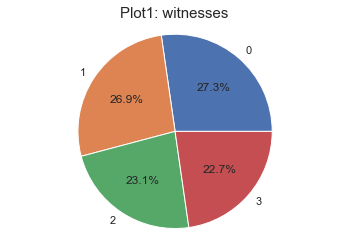

In [1220]:
#visualize by using pieplot
Values = [66,65,56,55]
my_labels = '0','1','2','3'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: witnesses', fontsize=15)
plt.axis('equal')
plt.show()

In [1221]:
df.groupby('witnesses')['fraud_reported'].value_counts().sort_index(ascending=False)
#check the relationship between fraud_reported and witnesses

witnesses  fraud_reported
3          Y                 17
           N                 39
2          Y                 12
           N                 43
1          Y                 14
           N                 51
0          Y                 14
           N                 52
Name: fraud_reported, dtype: int64

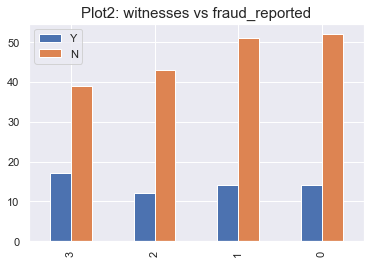

In [1222]:
#visualize by using barplot
df_type = {'Y': [17,12,14,14],
        'N': [39,43,51,52]}
df1 = pd.DataFrame(df_type,columns=['Y','N'], index = ['3','2','1','0'])
df1.plot.bar()
plt.title('Plot2: witnesses vs fraud_reported', fontsize = 15)
plt.show()

Observation:
1. In plot1, category 0 is more than others
2. In plot2, 3 witnesses are more than other category

In [1223]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 37)


# column30:police_report_available

In [1224]:
df['police_report_available'].unique()#check the unique value

array(['NO', 'YES', '?'], dtype=object)

In [1225]:
df['police_report_available'].value_counts()#check the counts of unique value

?      83
YES    80
NO     79
Name: police_report_available, dtype: int64

In [1226]:
df.drop(columns='police_report_available', inplace=True ) #drop this column

Observation:
1. 83 '?' in this column, which is not good for our model
2. we can not replace these 83 values to any other data.
3. finally, we decide to drop this column

In [1227]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (242, 36)


# column31:total_claim_amount

In [1228]:
df['total_claim_amount'].unique()#check the unique value

array([ 63400,   6500,   7280,  46200,  72930,  60400,  71520,   5720,
        77110,  53100,  56400,  70510,   2640,  56430,  65790,  89700,
        68530,  68310,  61290,  50800,   6490,  70680,   6930,  28800,
         2970,   4320,  70000,  47700,  51260,  70400,  36300,  40320,
        63840,  51000,  78120,   3690,  76120,   8190,  71680,  63570,
        54240,   6200,   6160,  86060, 107900,  99990,  44910,  85150,
       100800,  73920,  50490,   7040,  59400,  76700,  54400,   8800,
        34320,  57060,  73500,  53680,  33550,  69100,  79750,  71060,
         6300,  65400,  75400,  53640,  57640,  53280,  64920,  64080,
         4730,  59900,  51570,  93730,  87300,  65800,  36720,  64320,
        74280,  80520,  63600,  77660,   5640,  53440,  87100,  50380,
        39480,  63240,  74200,  64900,  78000,  67200,  63250,  42700,
        54000,  54160,  51480,   5220,  44880,  53020,  24200,  61270,
        95810,  58200,  54340,  81960,   7400,  54810,  56070,  56000,
      

In [1229]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['total_claim_amount'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['total_claim_amount'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['total_claim_amount'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.6289137432656302


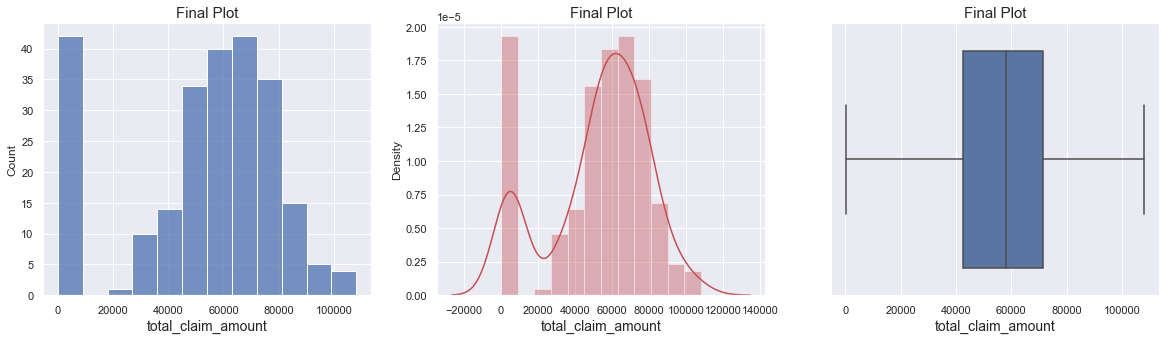

In [1230]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['total_claim_amount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['total_claim_amount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['total_claim_amount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)
plt.show()

In [1231]:
df['total_claim_amount'].value_counts()#check the counts of unique value

4320     3
50000    2
79090    2
75400    2
59400    2
        ..
56000    1
4290     1
72900    1
5830     1
8190     1
Name: total_claim_amount, Length: 228, dtype: int64

In [1232]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total_claim_amount'].mean())
print('Median of the column:----->',df['total_claim_amount'].median())
print('Mode of the column:----->',st.mode(df['total_claim_amount']))
print('std of the column:----->',df['total_claim_amount'].std())

Mean of the column:-----> 53135.413223140495
Median of the column:-----> 58050.0
Mode of the column:-----> 4320
std of the column:-----> 26439.057475673795


In [1233]:
df['total_claim_amount'] = df['total_claim_amount'].replace(4320,df['total_claim_amount'].mean())
#replace mode value into column mean

In [1234]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total_claim_amount'].mean())
print('Median of the column:----->',df['total_claim_amount'].median())
print('Mode of the column:----->',st.mode(df['total_claim_amount']))
print('std of the column:----->',df['total_claim_amount'].std())

Mean of the column:-----> 53740.56297384058
Median of the column:-----> 58050.0
Mode of the column:-----> 53135.413223140495
std of the column:-----> 25864.895593476962


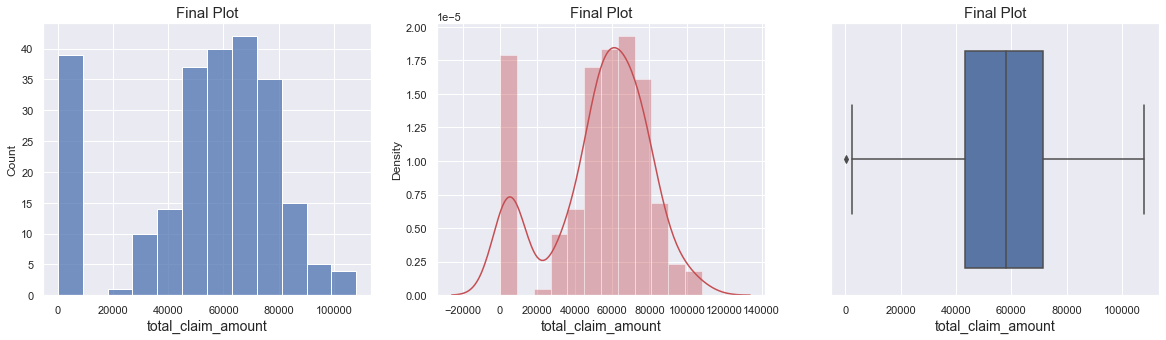

In [1235]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['total_claim_amount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['total_claim_amount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['total_claim_amount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)
plt.show()

In [1236]:
df['total_claim_amount'] = df['total_claim_amount'].replace(100,df['total_claim_amount'].mean())
#we see, 100 is very less value in this column, so, instead of removing it, we replace it

In [1237]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total_claim_amount'].mean())
print('Median of the column:----->',df['total_claim_amount'].median())
print('Mode of the column:----->',st.mode(df['total_claim_amount']))
print('std of the column:----->',df['total_claim_amount'].std())

Mean of the column:-----> 53962.218192740744
Median of the column:-----> 58050.0
Mode of the column:-----> 53135.413223140495
std of the column:-----> 25632.097915211652


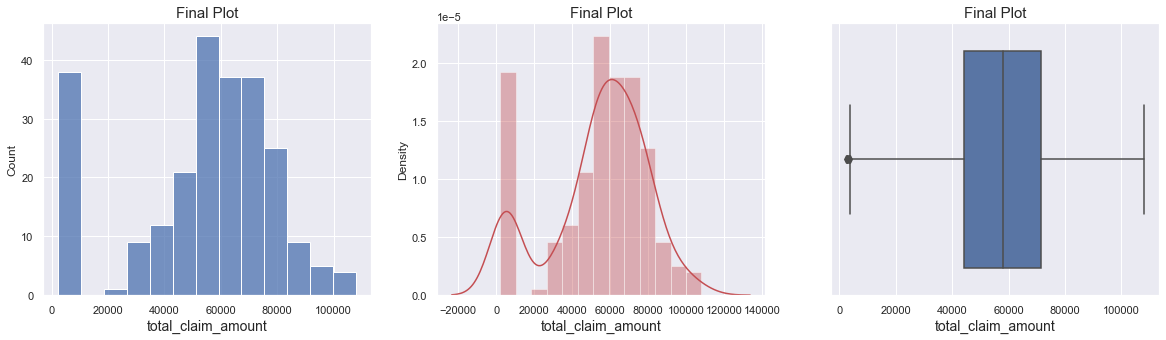

In [1238]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['total_claim_amount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['total_claim_amount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['total_claim_amount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)
plt.show()

In [1239]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['total_claim_amount'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['total_claim_amount'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['total_claim_amount'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['total_claim_amount'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 26760.0

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 12,  24,  35, 121, 128, 169, 208, 211, 218, 226, 237], dtype=int64),)


In [1240]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (242, 36)
New Shape:------>  (231, 36)


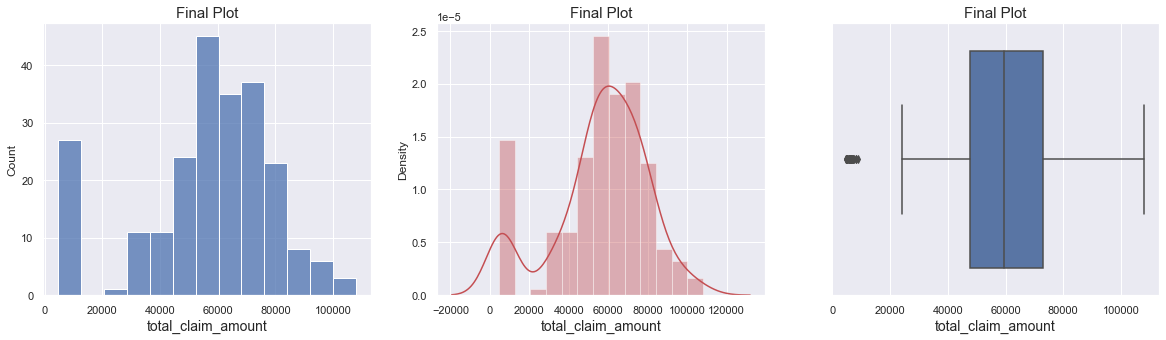

In [1241]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['total_claim_amount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['total_claim_amount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['total_claim_amount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)
plt.show()

In [1242]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['total_claim_amount'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['total_claim_amount'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['total_claim_amount'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['total_claim_amount'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 25165.0

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([  1,   2,   7,  19,  21,  34,  38,  39,  48,  52,  61,  69,  81,
        97, 106, 140, 149, 162, 172, 188, 194, 195, 196, 203, 216, 220,
       221], dtype=int64),)


In [1243]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (231, 36)
New Shape:------>  (204, 36)


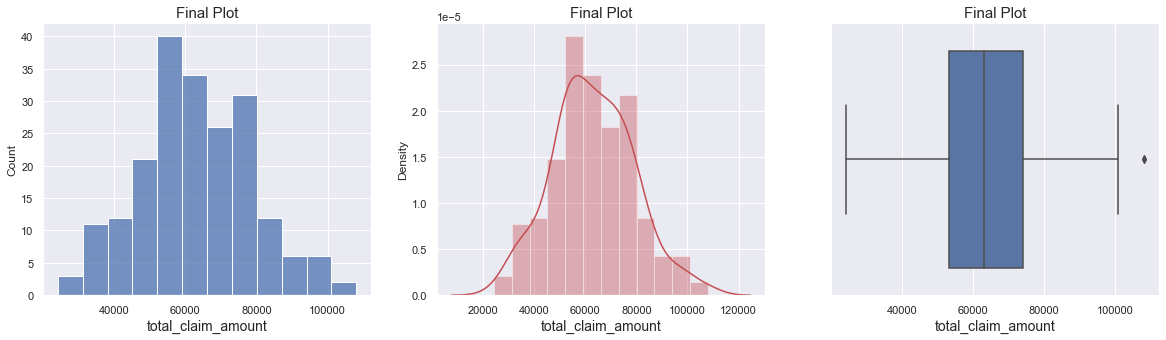

In [1244]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['total_claim_amount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['total_claim_amount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['total_claim_amount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)
plt.show()

In [1245]:
df['total_claim_amount'].unique() #check the unique values

array([ 63400.        ,  46200.        ,  72930.        ,  60400.        ,
        71520.        ,  77110.        ,  53100.        ,  56400.        ,
        70510.        ,  56430.        ,  65790.        ,  89700.        ,
        68530.        ,  68310.        ,  61290.        ,  50800.        ,
        70680.        ,  28800.        ,  53135.41322314,  70000.        ,
        47700.        ,  51260.        ,  70400.        ,  36300.        ,
        40320.        ,  63840.        ,  51000.        ,  78120.        ,
        76120.        ,  71680.        ,  63570.        ,  54240.        ,
        86060.        , 107900.        ,  99990.        ,  44910.        ,
        85150.        , 100800.        ,  73920.        ,  50490.        ,
        59400.        ,  76700.        ,  54400.        ,  34320.        ,
        57060.        ,  73500.        ,  53680.        ,  33550.        ,
        69100.        ,  79750.        ,  71060.        ,  65400.        ,
        75400.        ,  

In [1246]:
df['total_claim_amount']=df['total_claim_amount'].replace(107900,df['total_claim_amount'].mean())
df['total_claim_amount']=df['total_claim_amount'].replace(100800,df['total_claim_amount'].mean())
df['total_claim_amount']=df['total_claim_amount'].replace(108030,df['total_claim_amount'].mean())
#we see some higher values than 100000, so, we easily replace them to our mean value

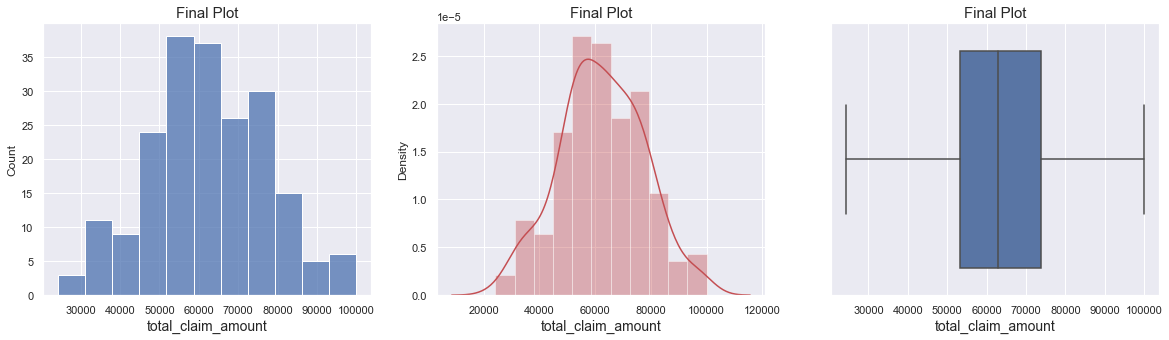

In [1247]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['total_claim_amount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['total_claim_amount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['total_claim_amount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('total_claim_amount', fontsize= 14)
plt.show()

In [1248]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total_claim_amount'].mean())
print('Median of the column:----->',df['total_claim_amount'].median())
print('Mode of the column:----->',st.mode(df['total_claim_amount']))
print('std of the column:----->',df['total_claim_amount'].std())

Mean of the column:-----> 62388.693075492614
Median of the column:-----> 62840.0
Mode of the column:-----> 53135.413223140495
std of the column:-----> 15078.781834161779


In [1249]:
df['total_claim_amount'] = df['total_claim_amount'].replace(53135.413223140495,df['total_claim_amount'].mean())

In [1250]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total_claim_amount'].mean())
print('Median of the column:----->',df['total_claim_amount'].median())
print('Mode of the column:----->',st.mode(df['total_claim_amount']))
print('std of the column:----->',df['total_claim_amount'].std())

Mean of the column:-----> 62524.77072038015
Median of the column:-----> 62840.0
Mode of the column:-----> 62388.693075492614
std of the column:-----> 15036.14598056012


In [1251]:
print('Check the skewness in Column:---------->',df['total_claim_amount'].skew())#check the skewness

Check the skewness in Column:----------> -0.0192426298579301


Text(0.5, 1.0, 'Plot3: fraud_reported vs total_claim_amount')

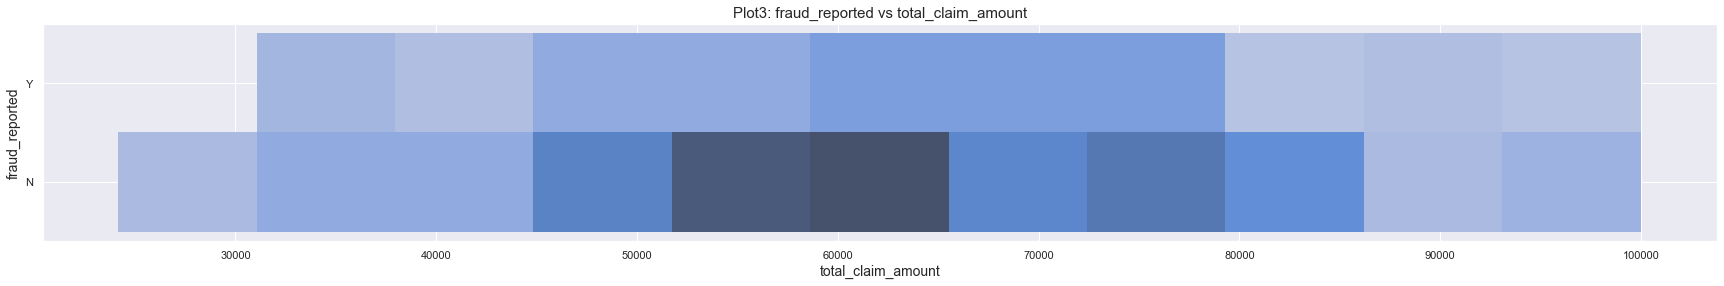

In [1252]:
#visualize this column by lineplot
plt.figure(figsize=(30,4))
sns.histplot(y= 'fraud_reported',x= 'total_claim_amount', data=df)
plt.xlabel('total_claim_amount', fontsize = 14)
plt.ylabel('fraud_reported', fontsize = 14)
plt.title('Plot3: fraud_reported vs total_claim_amount', fontsize = 15)

Observation:
- Data Cleaning
1. No zero value found
2. No null value found
3. Skewness improved from -0.62 to -0.019
4. Outliers are removed and replaced by column mean
5. Mean, median and mode values are improved
- Results by EDA
1. total claim amount is more where No fraud reported around 50000 to 75000

In [1253]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (204, 36)


# column32:injury_claim

In [1254]:
df['injury_claim'].unique()#check the unique value

array([ 6340,  4200,  6630,  6040, 17880, 14020, 10620, 11280, 12820,
           0,  7310, 13800, 12460, 12420,  6810, 10160,  5890,   480,
       14000,  4770,  9320,  6400,  3300,  5760, 10640,  8500, 17360,
       13840,  8960,  9780,  9040, 13240, 10790, 18180,  4990, 13100,
       16800, 13440,  5610,  5940,  7670,  5440,  8580,  7350,  4880,
        3050,  6910, 14500,  6460, 10900,  7540,  5960,  5240, 11840,
       10820,  7120, 11980,  5730, 14420, 17460, 13160,  4080,  5360,
       12380, 13420,  6360,  7060,  8710,  4580,  6580, 10540, 14840,
       12980,  6500,  6720, 11500,  6000,  6770,  5720,  8160,  9640,
        2200,  5570, 14740,  5820,  9880, 13660,  6090,  6230,  6750,
        4430,  5970,  8140,  7180,  5590, 16300, 15000,  6620,  9680,
        6180,  8900,  3570, 14660,  4340,  6870,  5690, 13480,  6930,
       12220,  4250, 16820, 11540, 16620,  5380, 14380,  7530,  7110,
       13880,  6050,  6730, 14140, 15500,  8150, 14080,  6600, 12500,
        6280, 13860,

In [1255]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['injury_claim'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['injury_claim'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['injury_claim'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.13652159499835423


In [1256]:
df['injury_claim'].value_counts()#check the counts of unique value

0        7
5940     3
6630     2
6340     2
13520    2
        ..
13160    1
13660    1
6500     1
11220    1
6910     1
Name: injury_claim, Length: 180, dtype: int64

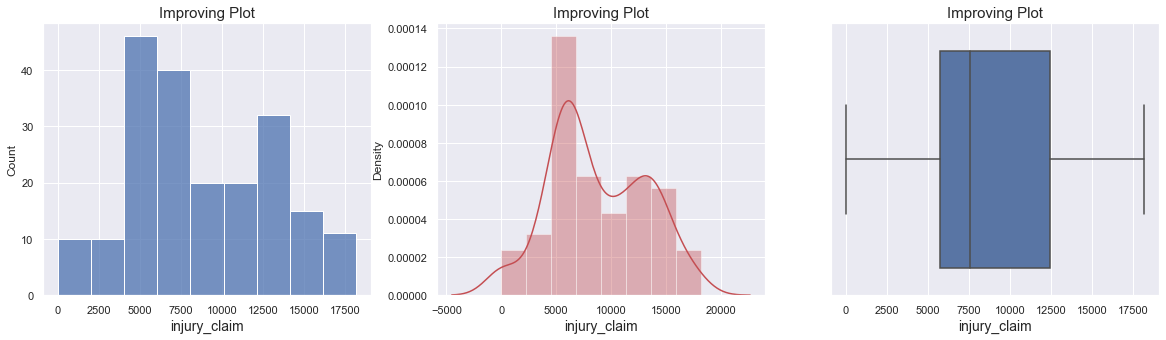

In [1257]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['injury_claim']) #visualize the outliers by using histplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['injury_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['injury_claim']) #visualize the outliers by using boxplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)
plt.show()

In [1258]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['injury_claim'].mean())
print('Median of the column:----->',df['injury_claim'].median())
print('Mode of the column:----->',st.mode(df['injury_claim']))
print('std of the column:----->',df['injury_claim'].std())

Mean of the column:-----> 8775.196078431372
Median of the column:-----> 7605.0
Mode of the column:-----> 0
std of the column:-----> 4357.038409884199


In [1259]:
df['injury_claim'] = df['injury_claim'].replace(0,df['injury_claim'].mean())
#replace mode by column mean value

In [1260]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['injury_claim'].mean())
print('Median of the column:----->',df['injury_claim'].median())
print('Mode of the column:----->',st.mode(df['injury_claim']))
print('std of the column:----->',df['injury_claim'].std())

Mean of the column:-----> 9076.30574778931
Median of the column:-----> 8285.0
Mode of the column:-----> 8775.196078431372
std of the column:-----> 4029.5604485470035


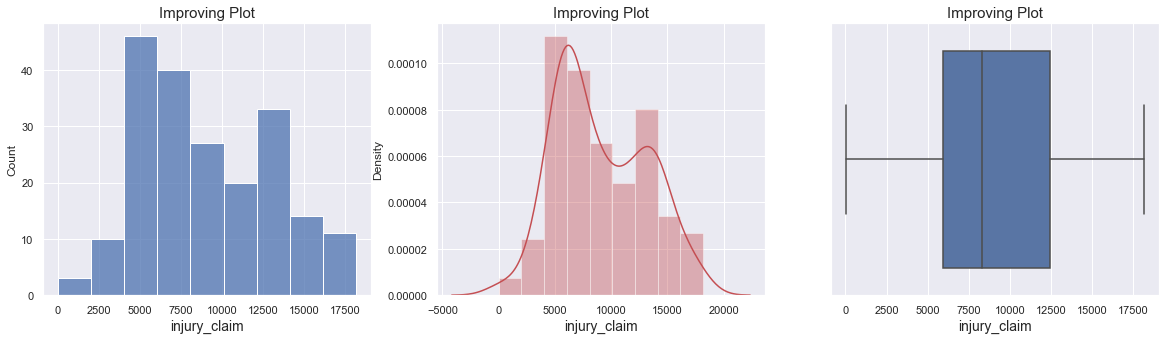

In [1261]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['injury_claim']) #visualize the outliers by using histplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['injury_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['injury_claim']) #visualize the outliers by using boxplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)
plt.show()

In [1262]:
df['injury_claim'] = df['injury_claim'].replace(8775.196078431372,df['injury_claim'].mean())
#replace mode by column mean value

In [1263]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['injury_claim'].mean())
print('Median of the column:----->',df['injury_claim'].median())
print('Mode of the column:----->',st.mode(df['injury_claim']))
print('std of the column:----->',df['injury_claim'].std())

Mean of the column:-----> 9086.637942326104
Median of the column:-----> 8285.0
Mode of the column:-----> 9076.30574778931
std of the column:-----> 4029.1591776640284


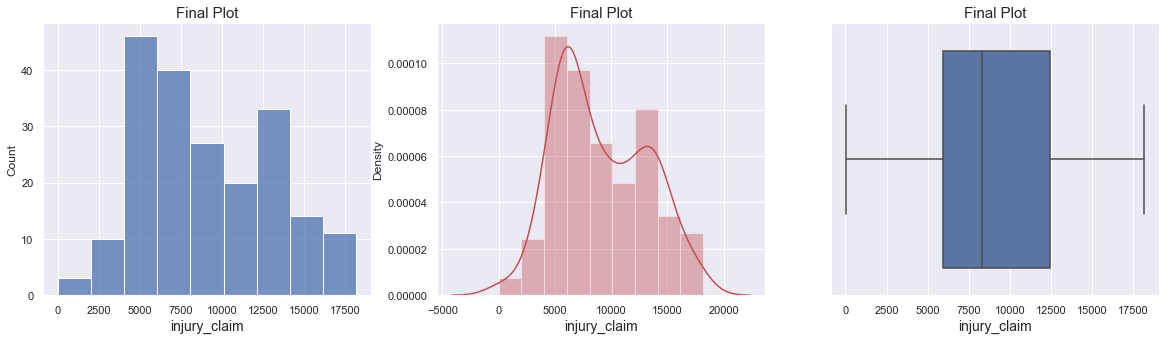

In [1264]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['injury_claim']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['injury_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['injury_claim']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('injury_claim', fontsize= 14)
plt.show()

In [1265]:
print('Check the skewness in Column:---------->',df['injury_claim'].skew())#check the skewness

Check the skewness in Column:----------> 0.29775124018582305


Text(0.5, 1.0, 'Plot3: fraud_reported vs injury_claim')

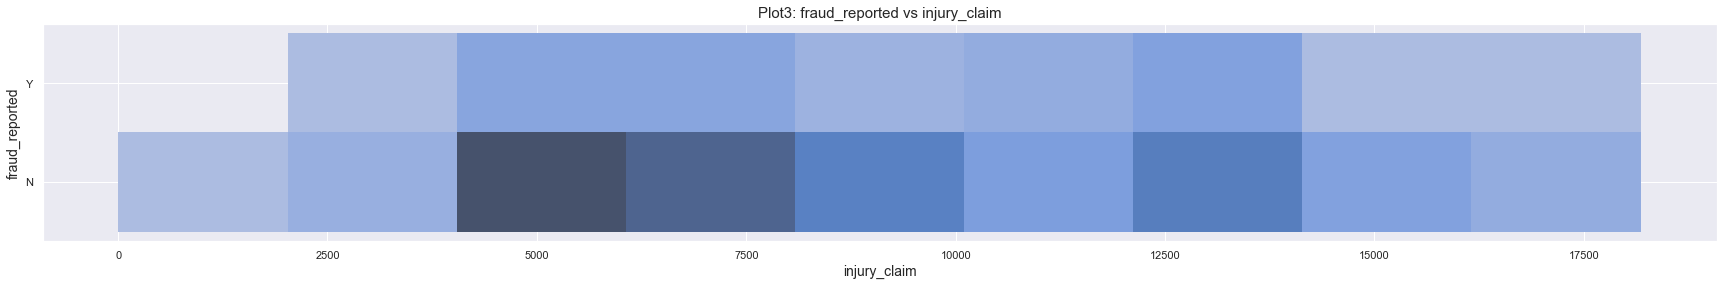

In [1266]:
#visualize this column by lineplot
plt.figure(figsize=(30,4))
sns.histplot(y= 'fraud_reported',x= 'injury_claim', data=df)
plt.xlabel('injury_claim', fontsize = 14)
plt.ylabel('fraud_reported', fontsize = 14)
plt.title('Plot3: fraud_reported vs injury_claim', fontsize = 15)

Observation:
- Data Cleaning
1. zero values found and replaced by column mean
2. No null value found
3. Skewness improved
4. No outliers found except zero values
5. Mean, median and mode values are improved
- Results by EDA
1. Injury claim is more where No fraud reported around 5000

In [1267]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (204, 36)


# column33:property_claim

In [1268]:
df['property_claim'].unique()#check the unique value

array([ 6340,  8400, 13260,  6040,  5960, 14020,  5310, 11280, 12820,
        6270,  7310, 13800,  6230,  6210,  6810, 10160, 11780,  3600,
         480,  7000,  9540,  9320, 12800,  9900,  5760, 10640,  8500,
        8680,  6920,  8960,  9780,  9040, 13240, 21580, 18180,  4990,
       13100, 16800,  6720,  5610, 11880,  7670,  5440,  4290, 14700,
        4880,  6100,  6910, 14500, 12920, 10900, 15080, 10480,  5920,
       10820,  7120,  5990, 11460, 21630, 17460,  6580,  4080, 10720,
       12380,  6710, 12720, 14120,  6680,  8710,  4580,  5270, 14840,
       12980, 13000,  5750,  6000,  6770,  5720,  9640,  4400, 11140,
       14740,  5820,     0, 13660,  6090, 12460,  6750,  4430,  5970,
        8140,  5590,  8150,  5000,  6620, 14520, 12360,  8900,  7140,
       14660,  4340, 13740, 11380, 13480, 13860, 12220,  4250,  8410,
        5770, 16620,  5380, 14380, 15060, 14220,  6940, 12100, 13460,
       14140,  7750, 16300,  7040, 13200, 12500, 12560,  5940,   960,
        6930,  4060,

In [1269]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['property_claim'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['property_claim'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['property_claim'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.3047595045526191


In [1270]:
df['property_claim'].value_counts()#check the counts of unique value

0        8
10720    2
6680     2
5960     2
6340     2
        ..
6750     1
16300    1
11560    1
5730     1
6910     1
Name: property_claim, Length: 180, dtype: int64

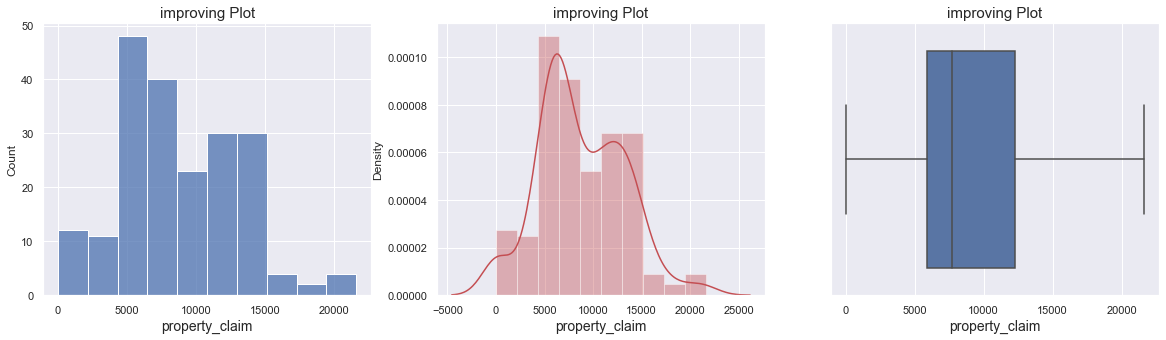

In [1271]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['property_claim']) #visualize the outliers by using histplot
plt.title('improving Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['property_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('improving Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['property_claim']) #visualize the outliers by using boxplot
plt.title('improving Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)
plt.show()

In [1272]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['property_claim'].mean())
print('Median of the column:----->',df['property_claim'].median())
print('Mode of the column:----->',st.mode(df['property_claim']))
print('std of the column:----->',df['property_claim'].std())

Mean of the column:-----> 8762.892156862745
Median of the column:-----> 7710.0
Mode of the column:-----> 0
std of the column:-----> 4400.435823482537


In [1273]:
df['property_claim']=df['property_claim'].replace(0,df['property_claim'].mean())

In [1274]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['property_claim'].mean())
print('Median of the column:----->',df['property_claim'].median())
print('Mode of the column:----->',st.mode(df['property_claim']))
print('std of the column:----->',df['property_claim'].std())

Mean of the column:-----> 9106.534986543636
Median of the column:-----> 8455.0
Mode of the column:-----> 8762.892156862745
std of the column:-----> 4027.284971799835


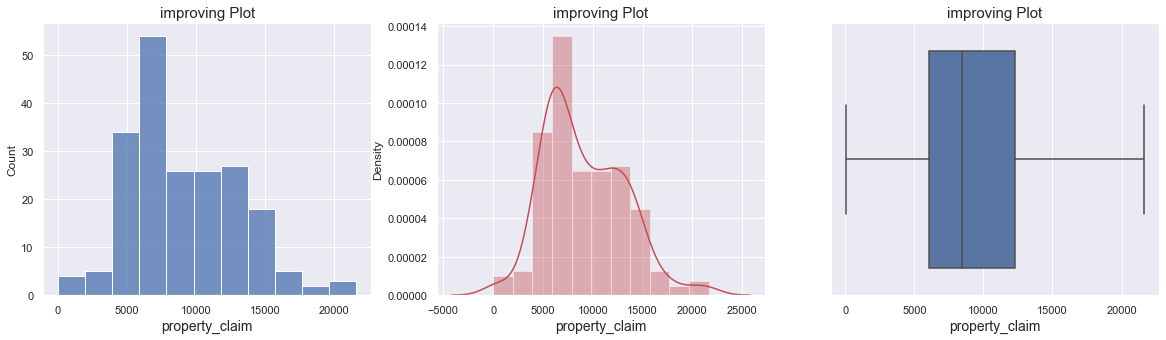

In [1275]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['property_claim']) #visualize the outliers by using histplot
plt.title('improving Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['property_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('improving Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['property_claim']) #visualize the outliers by using boxplot
plt.title('improving Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)
plt.show()

In [1276]:
df['property_claim']=df['property_claim'].replace(8762.892156862745,df['property_claim'].mean())

In [1277]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['property_claim'].mean())
print('Median of the column:----->',df['property_claim'].median())
print('Mode of the column:----->',st.mode(df['property_claim']))
print('std of the column:----->',df['property_claim'].std())

Mean of the column:-----> 9120.01117594289
Median of the column:-----> 8455.0
Mode of the column:-----> 9106.534986543636
std of the column:-----> 4026.684483932035


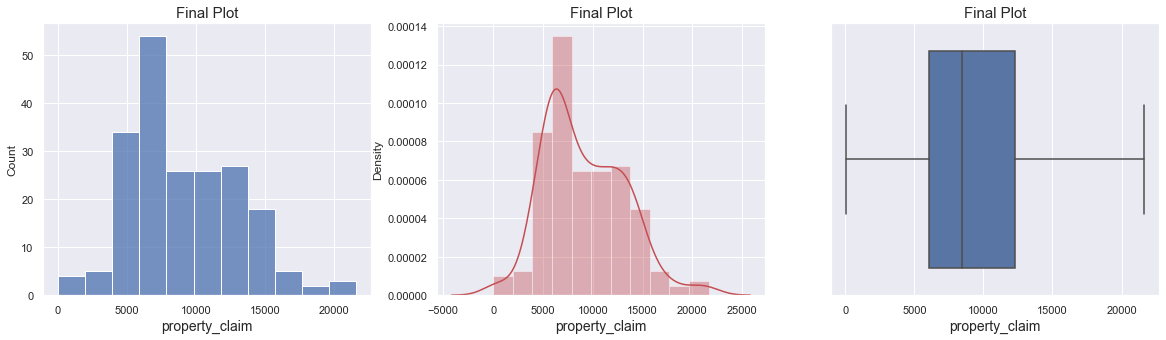

In [1278]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['property_claim']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['property_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['property_claim']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('property_claim', fontsize= 14)
plt.show()

In [1279]:
print('Check the skewness in Column:---------->',df['injury_claim'].skew())#check the skewness

Check the skewness in Column:----------> 0.29775124018582305


Text(0.5, 1.0, 'Plot1: fraud_reported vs property_claim')

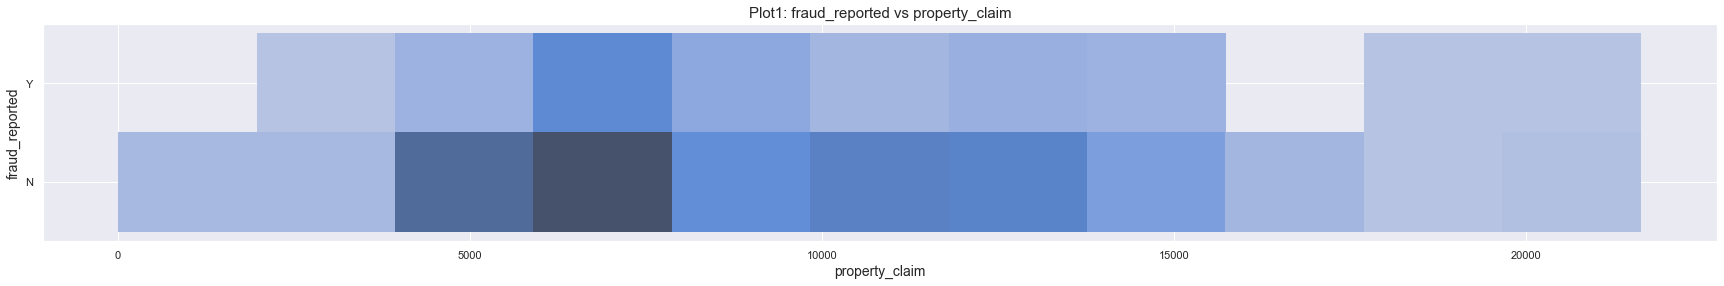

In [1280]:
#visualize this column by lineplot
plt.figure(figsize=(30,4))
sns.histplot(y= 'fraud_reported',x= 'property_claim', data=df)
plt.xlabel('property_claim', fontsize = 14)
plt.ylabel('fraud_reported', fontsize = 14)
plt.title('Plot1: fraud_reported vs property_claim', fontsize = 15)

Observation:
- Data Cleaning
1. zero values found and replaced by column mean
2. No null value found
3. Skewness improved
4. No outliers found except zero values
5. Mean, median and mode values are improved
- Results by EDA
1. property_claim is more where No fraud reported around 6000 

In [1281]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (204, 36)


# column34:vehicle_claim

In [1282]:
df['vehicle_claim'].unique()#check the unique value

array([50720, 33600, 53040, 48320, 47680, 49070, 37170, 33840, 44870,
       50160, 51170, 62100, 49840, 49680, 47670, 30480, 53010, 25200,
        3360, 49000, 33390, 32620, 51200, 23100, 28800, 42560, 34000,
       52080, 55360, 53760, 44010, 36160, 59580, 75530, 63630, 34930,
       58950, 67200, 39270, 41580, 61360, 43520, 21450, 44380, 51450,
       43920, 24400, 55280, 50750, 51680, 43600, 52780, 41720, 41920,
       35520, 43280, 41930, 34380, 57680, 52380, 46060, 28560, 48240,
       49520, 60390, 44520, 56480, 46760, 69680, 41220, 26320, 47430,
       38940, 58500, 46000, 36600, 42000, 40620, 40040, 32640, 33740,
       17600, 44560, 66330, 46560, 44460, 54640, 42630, 37380, 47250,
       39870, 35820, 65120, 57440, 44720, 57050, 30000, 26480, 38720,
       55620, 62300, 32130, 58640, 39060, 42880, 54960, 45520, 47180,
       62370, 42770, 58870, 40390, 74790, 21520, 50330, 45180, 49770,
       48580, 36300, 53840, 59670, 49490, 62000, 65200, 39690, 56320,
       39600, 43750,

In [1283]:
df['vehicle_claim'].value_counts()#check the counts of unique value

3360     3
53760    3
52780    2
42000    2
58870    2
        ..
39270    1
40390    1
49000    1
55440    1
59680    1
Name: vehicle_claim, Length: 191, dtype: int64

In [1284]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['vehicle_claim'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['vehicle_claim'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['vehicle_claim'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.5629657878340866


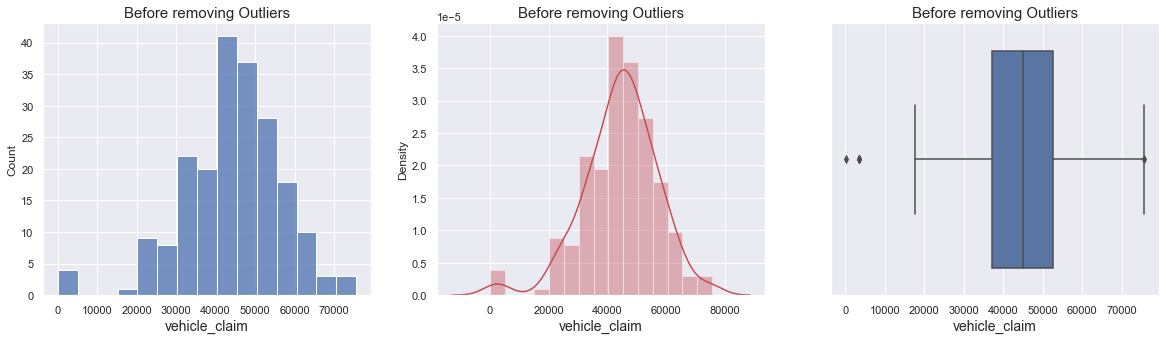

In [1285]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['vehicle_claim']) #visualize the outliers by using histplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['vehicle_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['vehicle_claim']) #visualize the outliers by using boxplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)
plt.show()

In [1286]:
df['vehicle_claim'].unique()#check the unique value

array([50720, 33600, 53040, 48320, 47680, 49070, 37170, 33840, 44870,
       50160, 51170, 62100, 49840, 49680, 47670, 30480, 53010, 25200,
        3360, 49000, 33390, 32620, 51200, 23100, 28800, 42560, 34000,
       52080, 55360, 53760, 44010, 36160, 59580, 75530, 63630, 34930,
       58950, 67200, 39270, 41580, 61360, 43520, 21450, 44380, 51450,
       43920, 24400, 55280, 50750, 51680, 43600, 52780, 41720, 41920,
       35520, 43280, 41930, 34380, 57680, 52380, 46060, 28560, 48240,
       49520, 60390, 44520, 56480, 46760, 69680, 41220, 26320, 47430,
       38940, 58500, 46000, 36600, 42000, 40620, 40040, 32640, 33740,
       17600, 44560, 66330, 46560, 44460, 54640, 42630, 37380, 47250,
       39870, 35820, 65120, 57440, 44720, 57050, 30000, 26480, 38720,
       55620, 62300, 32130, 58640, 39060, 42880, 54960, 45520, 47180,
       62370, 42770, 58870, 40390, 74790, 21520, 50330, 45180, 49770,
       48580, 36300, 53840, 59670, 49490, 62000, 65200, 39690, 56320,
       39600, 43750,

In [1287]:
df['vehicle_claim'] = df['vehicle_claim'].replace(70, df['vehicle_claim'].mean())
df['vehicle_claim'] = df['vehicle_claim'].replace(3360, df['vehicle_claim'].mean())

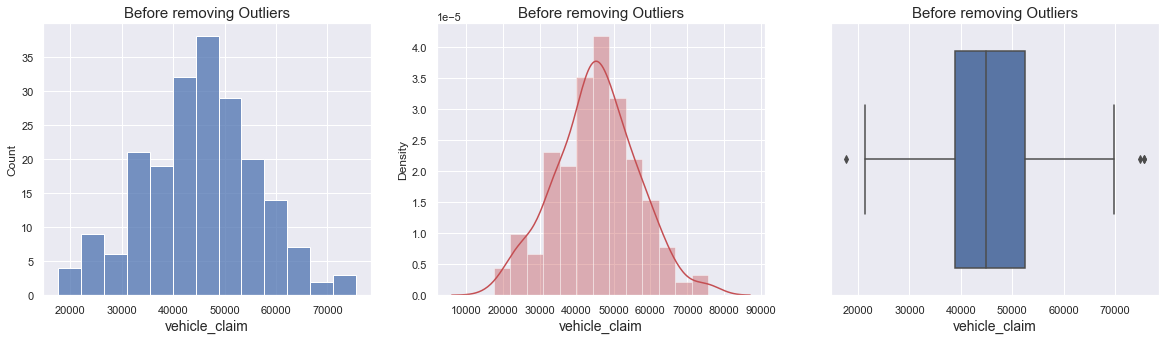

In [1288]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['vehicle_claim']) #visualize the outliers by using histplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['vehicle_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['vehicle_claim']) #visualize the outliers by using boxplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)
plt.show()

In [1289]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['vehicle_claim'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['vehicle_claim'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['vehicle_claim'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['vehicle_claim'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 13830.0

 **************************************************
Higher range:-
 (array([ 33, 119, 199], dtype=int64),)

 **************************************************
Lower range:- 
 (array([86], dtype=int64),)


In [1290]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (204, 36)
New Shape:------>  (200, 36)


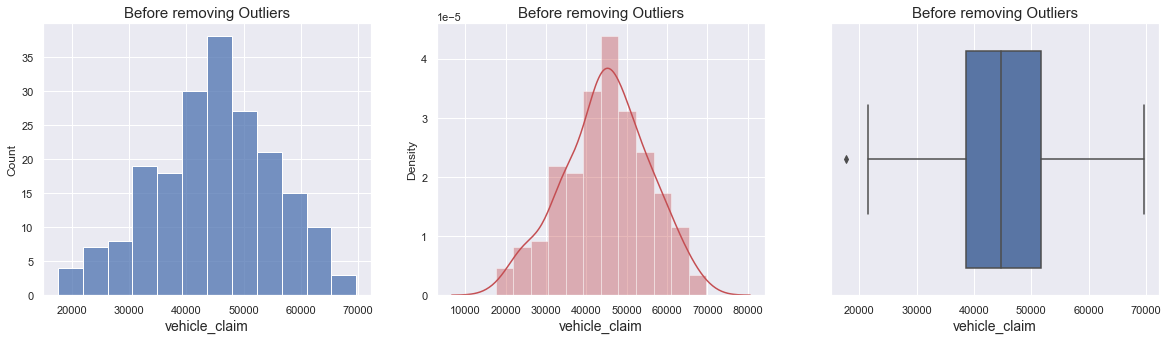

In [1291]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['vehicle_claim']) #visualize the outliers by using histplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['vehicle_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['vehicle_claim']) #visualize the outliers by using boxplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)
plt.show()

In [1292]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['vehicle_claim'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['vehicle_claim'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['vehicle_claim'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['vehicle_claim'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 13270.0

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([85], dtype=int64),)


In [1293]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (200, 36)
New Shape:------>  (199, 36)


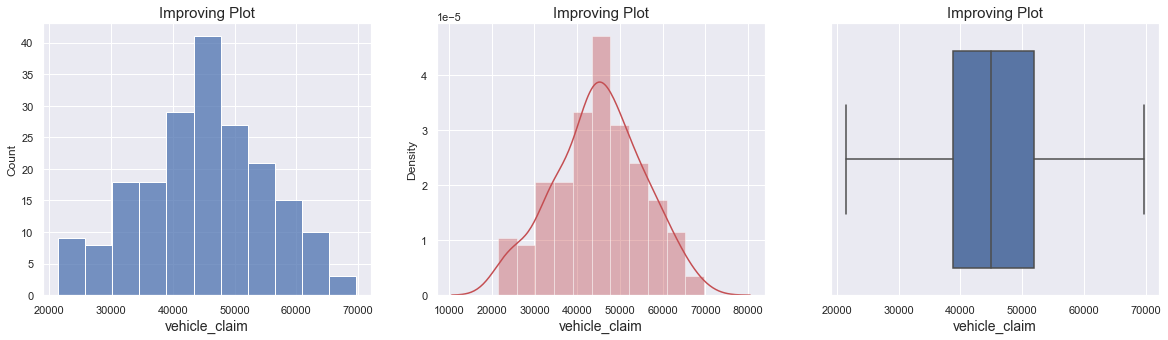

In [1294]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['vehicle_claim']) #visualize the outliers by using histplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['vehicle_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['vehicle_claim']) #visualize the outliers by using boxplot
plt.title('Improving Plot', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)
plt.show()

In [1295]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['vehicle_claim'].mean())
print('Median of the column:----->',df['vehicle_claim'].median())
print('Mode of the column:----->',st.mode(df['vehicle_claim']))
print('std of the column:----->',df['vehicle_claim'].std())

Mean of the column:-----> 45015.87068126098
Median of the column:-----> 44870.0
Mode of the column:-----> 44716.513360246056
std of the column:-----> 10345.912467223863


In [1296]:
df['vehicle_claim'] = df['vehicle_claim'].replace(44716.513360246056,df['vehicle_claim'].mean())

In [1297]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['vehicle_claim'].mean())
print('Median of the column:----->',df['vehicle_claim'].median())
print('Mode of the column:----->',st.mode(df['vehicle_claim']))
print('std of the column:----->',df['vehicle_claim'].std())

Mean of the column:-----> 45020.38360569838
Median of the column:-----> 45015.87068126098
Mode of the column:-----> 45015.87068126098
std of the column:-----> 10345.84585763893


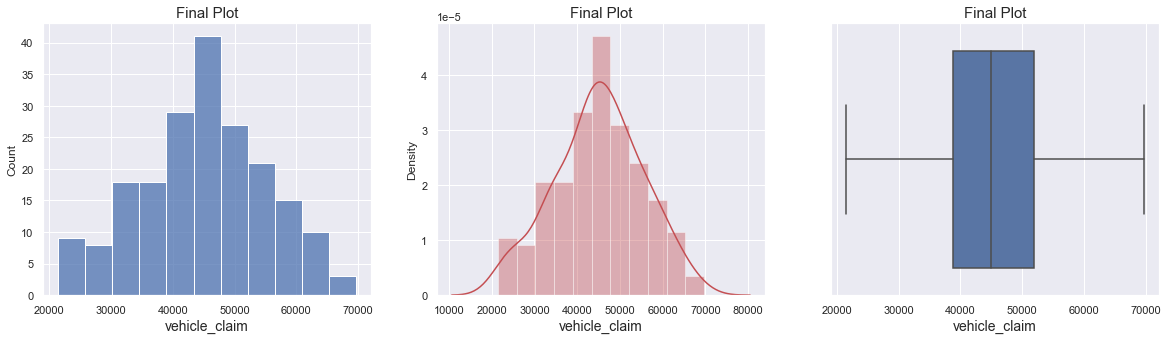

In [1298]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['vehicle_claim']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['vehicle_claim'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['vehicle_claim']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('vehicle_claim', fontsize= 14)
plt.show()

In [1299]:
print('Check the skewness in Column:---------->',df['vehicle_claim'].skew())#check the skewness

Check the skewness in Column:----------> -0.126766214843962


Text(0.5, 1.0, 'Plot1: fraud_reported vs vehicle_claim')

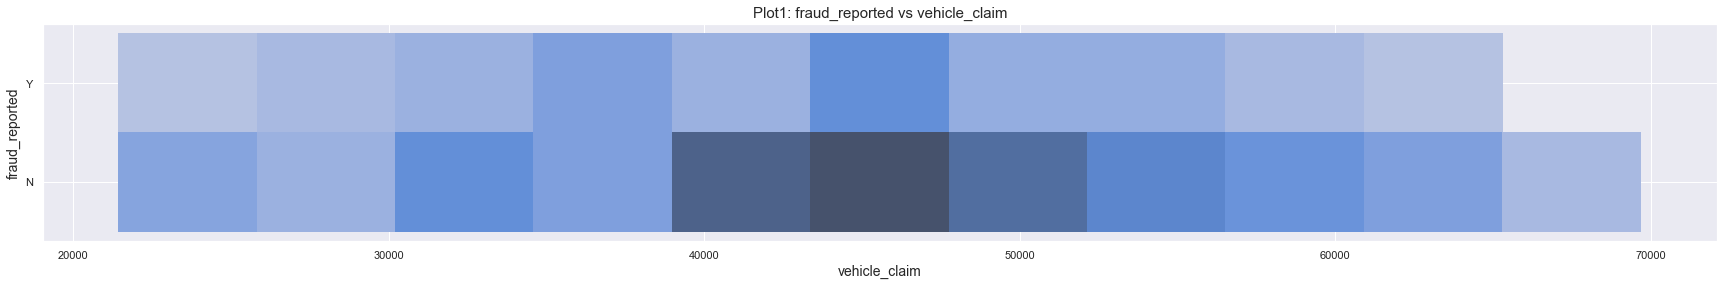

In [1300]:
#visualize this column by lineplot
plt.figure(figsize=(30,4))
sns.histplot(y= 'fraud_reported',x= 'vehicle_claim', data=df)
plt.xlabel('vehicle_claim', fontsize = 14)
plt.ylabel('fraud_reported', fontsize = 14)
plt.title('Plot1: fraud_reported vs vehicle_claim', fontsize = 15)

Observation:
- Data Cleaning
1. No zero values found 
2. No null value found
3. Skewness improved from -0.56 to -0.12
4. outliers are found
5. Mean, median and mode values are improved
- Results by EDA
1. vehicle_claim is more where No fraud reported around 40000 to 50000

In [1301]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (199, 36)


# column35:auto_make

In [1302]:
df['auto_make'].unique()#check the unique value

array(['Chevrolet', 'Dodge', 'Accura', 'Nissan', 'Suburu', 'Mercedes',
       'Toyota', 'Honda', 'Saab', 'Audi', 'Ford', 'BMW', 'Volkswagen',
       'Jeep'], dtype=object)

In [1303]:
df['auto_make'].value_counts()#check the counts of unique value

Dodge         19
Suburu        18
Toyota        17
BMW           16
Saab          15
Nissan        14
Ford          14
Accura        14
Mercedes      13
Volkswagen    13
Honda         13
Jeep          12
Chevrolet     11
Audi          10
Name: auto_make, dtype: int64

Text(0.5, 1.0, 'Plot1: auto_make vs policy_annual_premium')

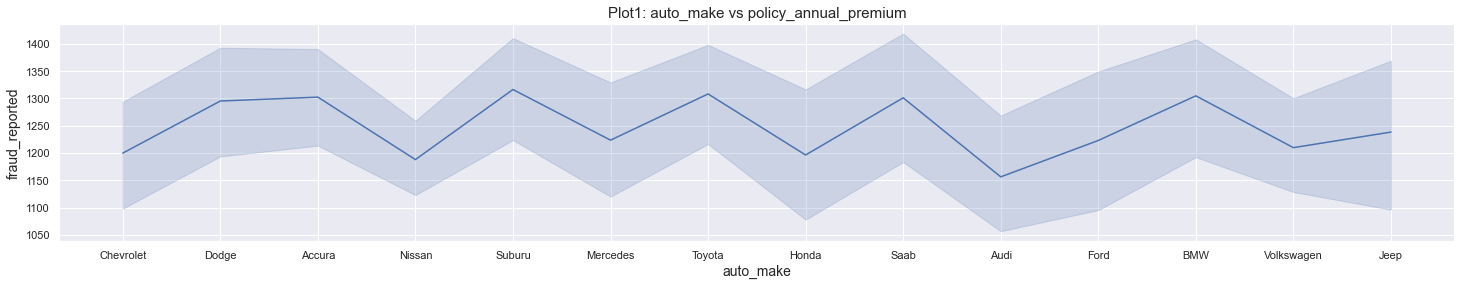

In [1304]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'auto_make',y= 'policy_annual_premium', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('auto_make', fontsize = 14)
plt.title('Plot1: auto_make vs policy_annual_premium', fontsize = 15)

Text(0.5, 1.0, 'Plot1: auto_make vs total_claim_amount')

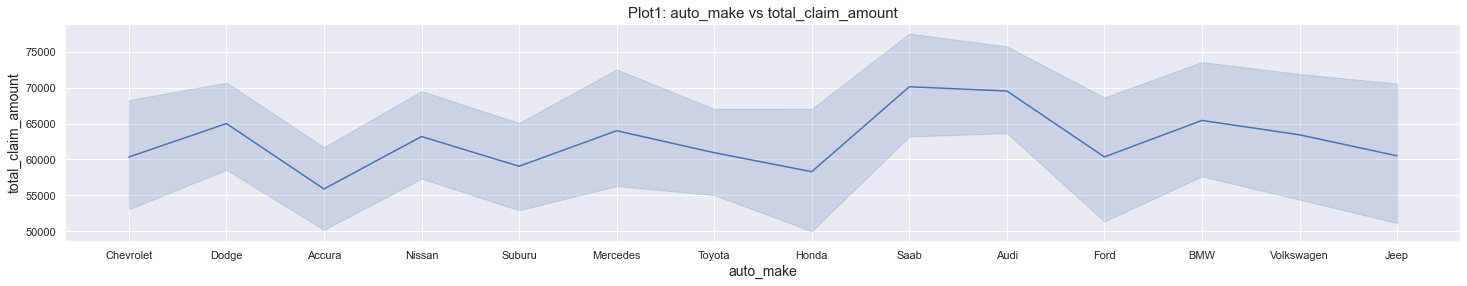

In [1305]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'auto_make',y= 'total_claim_amount', data=df)
plt.ylabel('total_claim_amount', fontsize = 14)
plt.xlabel('auto_make', fontsize = 14)
plt.title('Plot1: auto_make vs total_claim_amount', fontsize = 15)

Text(0.5, 1.0, 'Plot1: auto_make vs vehicle_claim')

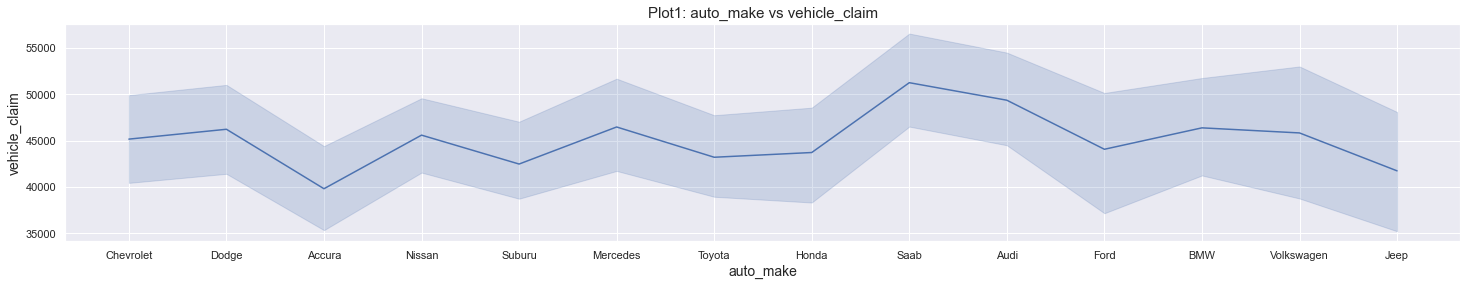

In [1306]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.lineplot(x= 'auto_make',y= 'vehicle_claim', data=df)
plt.ylabel('vehicle_claim', fontsize = 14)
plt.xlabel('auto_make', fontsize = 14)
plt.title('Plot1: auto_make vs vehicle_claim', fontsize = 15)

Text(0.5, 1.0, 'Plot1: auto_make vs fraud_reported')

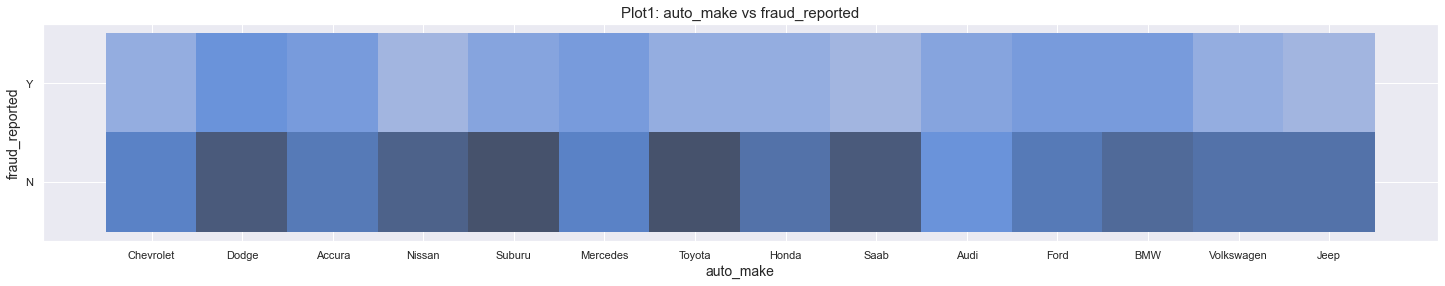

In [1307]:
#visualize this column by lineplot
plt.figure(figsize=(25,4))
sns.histplot(x= 'auto_make',y= 'fraud_reported', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('auto_make', fontsize = 14)
plt.title('Plot1: auto_make vs fraud_reported', fontsize = 15)

In [1308]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (199, 36)


# column36: auto_model

In [1309]:
df['auto_model'].unique()#check the unique value

array(['Tahoe', 'Neon', 'TL', 'Pathfinder', 'Forrestor', 'Impreza',
       'C300', 'Highlander', 'CRV', '93', 'A5', 'A3', 'Civic', 'MDX',
       'Fusion', 'E400', 'F150', 'Legacy', 'Escape', 'X5', '3 Series',
       'Camry', 'Jetta', 'Passat', 'Malibu', 'Maxima', 'M5', 'Wrangler',
       '92x', 'RAM', 'Accord', 'Corolla', 'Ultima', 'ML350', 'Silverado',
       'X6', 'Grand Cherokee', '95', 'RSX'], dtype=object)

In [1310]:
df['auto_model'].value_counts()#check the counts of unique value

RAM               12
X5                 9
Forrestor          9
Wrangler           9
E400               8
MDX                7
Highlander         7
Neon               7
Jetta              7
92x                6
TL                 6
Maxima             6
Passat             6
Fusion             6
Camry              6
Legacy             6
CRV                6
Escape             6
Silverado          5
93                 5
A5                 5
A3                 5
Pathfinder         5
Corolla            4
95                 4
Malibu             4
Civic              4
Ultima             3
Accord             3
Impreza            3
Grand Cherokee     3
M5                 3
ML350              3
C300               2
X6                 2
Tahoe              2
F150               2
3 Series           2
RSX                1
Name: auto_model, dtype: int64

In [1311]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (199, 36)


# Column37: auto_year

In [1312]:
df['auto_year'].unique()#check the unique value

array([2014, 2003, 2015, 2000, 1995, 1999, 2007, 2009, 1997, 2005, 2013,
       2002, 2011, 2001, 2006, 1998, 2010, 2012, 2004, 1996, 2008],
      dtype=int64)

In [1313]:
df['auto_year'].value_counts()#check the counts of unique value

2005    17
2013    14
1999    12
2003    12
2009    11
2002    11
2011    11
2004    10
2006    10
2010    10
1997     9
2007     9
2014     8
2012     8
1995     8
2000     8
1996     7
2015     7
2001     6
1998     6
2008     5
Name: auto_year, dtype: int64

In [1314]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (199, 36)


# Label: fraud_reported

In [1315]:
df['fraud_reported'].unique()#check the unique value

array(['Y', 'N'], dtype=object)

In [1316]:
df['fraud_reported'].value_counts()#check the counts of unique value

N    147
Y     52
Name: fraud_reported, dtype: int64

In [1317]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (199, 36)


In [1318]:
ohe = OneHotEncoder()

In [1319]:
ct = make_column_transformer((ohe,[ 'policy_state',
       'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported']), remainder = 'passthrough')

In [1320]:
ct.fit_transform(df)

<199x180 sparse matrix of type '<class 'numpy.float64'>'
	with 7044 stored elements in Compressed Sparse Row format>

In [1321]:
df['policy_state'] = df['policy_state'].map({'IL':0, 'OH':1,'IN':2})
df['policy_csl'] = df['policy_csl'].map({'250/500':0, '500/1000':1,'100/300':2})
df['insured_sex'] = df['insured_sex'].map({'FEMALE':0, 'MALE':1})
df['insured_education_level'] = df['insured_education_level'].map({'PhD':0, 'College':1, 'MD':2, 'High School':3, 'JD':4, 'Associate':5,
       'Masters':6})
df['insured_occupation'] = df['insured_occupation'].map({'armed-forces':0, 'machine-op-inspct':1, 'craft-repair':2,
       'handlers-cleaners':3, 'prof-specialty':4, 'farming-fishing':5,
       'priv-house-serv':6, 'other-service':7, 'tech-support':8,
       'exec-managerial':9, 'protective-serv':10, 'adm-clerical':11,
       'transport-moving':12, 'sales':13})
df['insured_hobbies'] = df['insured_hobbies'].map({'board-games':0, 'yachting':1, 'camping':2, 'paintball':3, 'video-games':4,
       'reading':5, 'movies':6, 'chess':7, 'sleeping':8, 'cross-fit':9, 'exercise':10,
       'bungie-jumping':11, 'kayaking':12, 'dancing':13, 'hiking':14, 'basketball':15,
       'polo':16, 'skydiving':17, 'base-jumping':18, 'golf':19})
df['insured_relationship'] = df['insured_relationship'].map({'unmarried':0, 'not-in-family':1, 'other-relative':2, 'own-child':3,
       'wife':4, 'husband':5})
df['incident_type'] = df['incident_type'].map({'Single Vehicle Collision':0, 'Multi-vehicle Collision':1,
       'Vehicle Theft':2, 'Parked Car':3})
df['auto_make'] = df['auto_make'].map({'Chevrolet':0, 'Dodge':1, 'Accura':2, 'Nissan':3, 'Suburu':4, 'Mercedes':5,
       'Toyota':6, 'Honda':7, 'Saab':8, 'Audi':9, 'Ford':10, 'BMW':11, 'Volkswagen':12,
       'Jeep':13})
df['auto_model'] = df['auto_model'].map({'Tahoe':0, 'Neon':1, 'TL':2, 'Pathfinder':3, 'Forrestor':4, 'Impreza':5,
       'C300':6, 'Highlander':7, 'CRV':8, '93':9, 'A5':10, 'A3':11, 'Civic':12, 'MDX':13,
       'Fusion':14, 'E400':15, 'F150':16, 'Legacy':17, 'Escape':18, 'X5':19, '3 Series':20,
       'Camry':21, 'Jetta':22, 'Passat':23, 'Malibu':24, 'Maxima':25, 'M5':26, 'Wrangler':27,
       '92x':28, 'RAM':29, 'Accord':30, 'Corolla':31, 'Ultima':33, 'ML350':34, 'Silverado':35,
       'X6':36, 'Grand Cherokee':37, '95':38, 'RSX':39})
df['collision_type'] = df['collision_type'].map({'Front Collision':0, 'Rear Collision':1, 'Side Collision':2})
df['incident_severity'] = df['incident_severity'].map({'Major Damage':0, 'Total Loss':1, 'Minor Damage':2, 'Trivial Damage':3})
df['authorities_contacted'] = df['authorities_contacted'].map({'Police':0, 'Other':1, 'Ambulance':2, 'Fire':3, 'None':4})
df['incident_state'] = df['incident_state'].map({'OH':0, 'SC':1, 'NY':2, 'VA':3, 'WV':4, 'NC':5, 'PA':6})


df['incident_city'] = df['incident_city'].map({'Arlington':0, 'Springfield':1, 'Northbrook':2, 'Columbus':3, 'Hillsdale':4,
       'Riverwood':5, 'Northbend':6})

In [1322]:
#df.dropna(inplace=True)

correlation between the Features and with label:-----> (35, 35)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2160x2160 with 0 Axes>

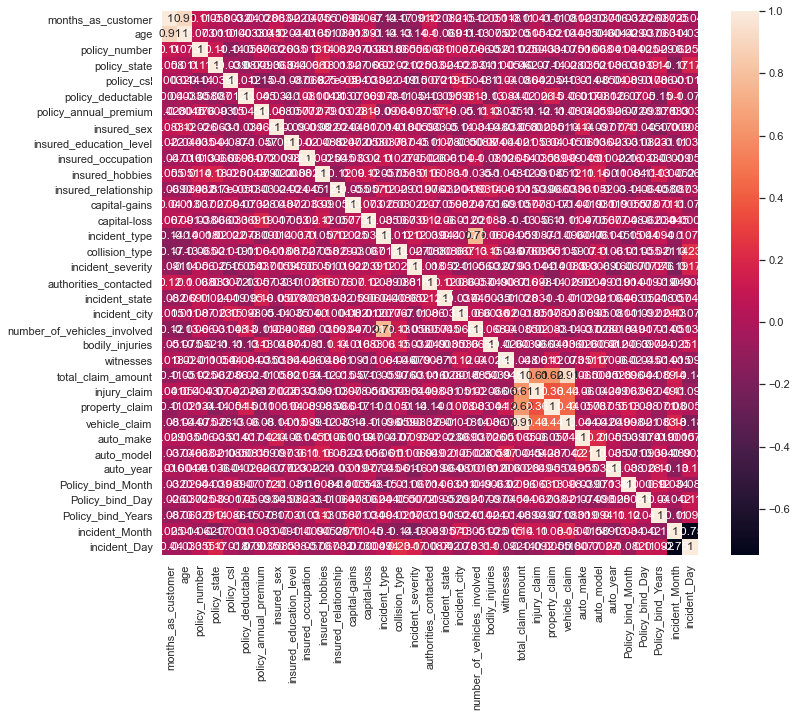

In [1323]:
# analyize the correlation
plt.figure(figsize=(30,30))
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [1324]:
#split x and y
x = df.drop(['fraud_reported'], axis=1)
y=df.fraud_reported

In [1325]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.37157721,  0.15752728, -1.26709525, ..., -1.58271793,
         2.10769727, -1.22829432],
       [-0.29443467, -0.18052192,  0.41355912, ..., -0.50037818,
        -0.74989986,  0.06841958],
       [-0.46970096, -0.29320498,  1.53241136, ...,  1.66430133,
        -0.74989986,  0.43890926],
       ...,
       [-1.67903832, -2.09613403,  0.03422792, ...,  0.71725405,
        -0.43238907,  0.06841958],
       [ 0.63447664, -0.09532807,  0.49071007, ..., -1.04154805,
        -0.74989986,  1.55037832],
       [ 0.38034052,  0.49557648, -1.74520179, ...,  0.58196158,
         0.8376541 , -1.1356719 ]])

In [1326]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #no multicollinearity between the features

vif                     features
0    7.250740           months_as_customer
1    7.033960                          age
2    1.191991                policy_number
3    1.207605                 policy_state
4    1.285668                   policy_csl
5    1.245823            policy_deductable
6    1.239256        policy_annual_premium
7    1.325286                  insured_sex
8    1.170918      insured_education_level
9    1.171325           insured_occupation
10   1.296696              insured_hobbies
11   1.157724         insured_relationship
12   1.196275                capital-gains
13   1.205279                 capital-loss
14   3.841487                incident_type
15   1.313718               collision_type
16   1.327813            incident_severity
17   1.209983        authorities_contacted
18   1.155664               incident_state
19   1.206827                incident_city
20   3.790158  number_of_vehicles_involved
21   1.225422              bodily_injuries
22   1.216490                    witnesses
23  19.590930           total_claim_amount
24   2.499835                 injury_claim
25   3.257083               property_claim
26  11.801931                vehicle_claim
27   1.206653                    auto_make
28   1.275757                   auto_model
29   1.201966                    auto_year
30   1.252703            Policy_bind_Month
31   1.133171              Policy_bind_Day
32   1.270326            Policy_bind_Years
33   2.812263               incident_Month
34   2.914199                 incident_Day

In [1327]:
x =df.drop(columns='months_as_customer', inplace=True)
x =df.drop(columns='total_claim_amount', inplace=True)
x =df.drop(columns='vehicle_claim', inplace=True)

In [1330]:
#split x and y
x = df.drop(['fraud_reported'], axis=1)
y=df.fraud_reported

In [1331]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.15752728, -1.26709525, -1.28239801, ..., -1.58271793,
         2.10769727, -1.22829432],
       [-0.18052192,  0.41355912, -0.02526893, ..., -0.50037818,
        -0.74989986,  0.06841958],
       [-0.29320498,  1.53241136, -0.02526893, ...,  1.66430133,
        -0.74989986,  0.43890926],
       ...,
       [-2.09613403,  0.03422792,  1.23186016, ...,  0.71725405,
        -0.43238907,  0.06841958],
       [-0.09532807,  0.49071007, -1.28239801, ..., -1.04154805,
        -0.74989986,  1.55037832],
       [ 0.49557648, -1.74520179, -0.02526893, ...,  0.58196158,
         0.8376541 , -1.1356719 ]])

In [1332]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #no multicollinearity between the features

vif                     features
0   1.140166                          age
1   1.160209                policy_number
2   1.180170                 policy_state
3   1.231046                   policy_csl
4   1.213138            policy_deductable
5   1.233542        policy_annual_premium
6   1.195160                  insured_sex
7   1.132290      insured_education_level
8   1.121009           insured_occupation
9   1.291987              insured_hobbies
10  1.151749         insured_relationship
11  1.123893                capital-gains
12  1.174670                 capital-loss
13  3.126302                incident_type
14  1.248683               collision_type
15  1.303547            incident_severity
16  1.205762        authorities_contacted
17  1.146049               incident_state
18  1.192187                incident_city
19  3.073044  number_of_vehicles_involved
20  1.207922              bodily_injuries
21  1.159420                    witnesses
22  1.326892                 injury_claim
23  1.488922               property_claim
24  1.174203                    auto_make
25  1.247003                   auto_model
26  1.177481                    auto_year
27  1.227169            Policy_bind_Month
28  1.131139              Policy_bind_Day
29  1.215375            Policy_bind_Years
30  2.713234               incident_Month
31  2.796206                 incident_Day

In [1333]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=13)

In [1334]:
y_train.head()

162    N
111    Y
102    N
539    N
445    Y
Name: fraud_reported, dtype: object

In [1335]:
# Check the Accuracy by using 5 classification models

In [1336]:
log_reg = LogisticRegression() #Model instantiating
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [1337]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [1338]:
log_reg.score(x_test,y_test) #Let's check how well model fits the test data
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
svc.score(x_test,y_test)
print("all models score are captured")

all models score are captured


In [1339]:
y_pred_log_reg = log_reg.predict(x_test) #save the predictions in some variables
y_pred_dt = dt.predict(x_test) 
y_pred_rf = rf.predict(x_test) 
y_pred_knn = knn.predict(x_test) 
y_pred_svc = svc.predict(x_test)

In [1340]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score of Logistic regression:-------->  ',accuracy_score(y_test,y_pred_log_reg))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_log_reg))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_log_reg))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)


print('Accuracy_score of Decision Tree:-------->  ',accuracy_score(y_test,y_pred_dt))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_dt))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_dt))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Random forest:-------->  ',accuracy_score(y_test,y_pred_rf))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_rf))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_rf))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of KNeighbors Classifiers:-------->  ',accuracy_score(y_test,y_pred_knn))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_knn))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_knn))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Support Vector Machine:-------->  ',accuracy_score(y_test,y_pred_svc))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_svc))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_svc))

Accuracy_score of Logistic regression:-------->   0.62
Confusion_matrix:
 [[29  6]
 [13  2]]
Classification_report:
               precision    recall  f1-score   support

           N       0.69      0.83      0.75        35
           Y       0.25      0.13      0.17        15

    accuracy                           0.62        50
   macro avg       0.47      0.48      0.46        50
weighted avg       0.56      0.62      0.58        50


 **************************************************

 **************************************************
Accuracy_score of Decision Tree:-------->   0.68
Confusion_matrix:
 [[27  8]
 [ 8  7]]
Classification_report:
               precision    recall  f1-score   support

           N       0.77      0.77      0.77        35
           Y       0.47      0.47      0.47        15

    accuracy                           0.68        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.68      0.68      0.68        50


 **********

In [1341]:
#check all model cv score
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5))

Logistic regression CV Score:
[0.675      0.675      0.775      0.725      0.74358974]

 **************************************************
Decision Tree CV Score:
[0.675      0.8        0.75       0.675      0.71794872]

 **************************************************
Random Forest CV Score:
[0.65       0.7        0.775      0.7        0.76923077]

 **************************************************
KNeighbour Classifier CV Score:
[0.725      0.65       0.675      0.65       0.74358974]

 **************************************************
Support Vector Machine CV Score:
[0.725      0.725      0.75       0.75       0.74358974]


In [1342]:
#Check the mean of all models cv score one by one
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5).mean())

Logistic regression CV Score:
0.7187179487179487

 **************************************************
Decision Tree CV Score:
0.7289743589743589

 **************************************************
Random Forest CV Score:
0.7489743589743589

 **************************************************
KNeighbour Classifier CV Score:
0.6887179487179487

 **************************************************
Support Vector Machine CV Score:
0.7387179487179487


In [1343]:
# Plot ROC/AUC for multiple models

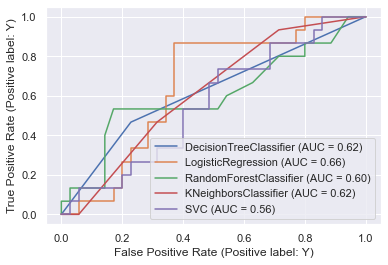

In [1344]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plot_roc_curve(svc,x_test,y_test, ax= disp.ax_)
plt.show()

In [ ]:
# GridSearchCV By using Knn as a estimator

In [1345]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,11,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid) #apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
knn1 = gridsearch.best_estimator_ #save that best param into one variable
print('Trained Model using best parameters:----->',knn1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',knn1.score(x_train,y_train)) #check the accuracy score

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

 **************************************************
GridSearchCV best parameters:-----> {'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 11}

 **************************************************
Trained Model using best parameters:-----> KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=11)

 **************************************************
Accuracy score:------> 0.7718120805369127


In [ ]:
# GridSearchCV By using SVC as a estimator

In [1346]:
param_grid = {'C': [1,2,4,5,6,7,8,9,10],         
             'gamma': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
             'kernel': ['rbf']}
gridsearch = GridSearchCV(estimator=svc, param_grid= param_grid)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into svc
svc1 = gridsearch.best_estimator_#save that best param into one variable
print('Trained Model using best parameters:----->',svc1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',svc1.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                         'kernel': ['rbf']})

 **************************************************
GridSearchCV best parameters:-----> {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

 **************************************************
Trained Model using best parameters:-----> SVC(C=1, gamma=0.2)

 **************************************************
Accuracy score:------> 1.0


In [ ]:
# GridSearchCV By using RandomForestClassifier as a estimator

In [1347]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
gridsearch = GridSearchCV(estimator=rf, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

 **************************************************
GridSearchCV best parameters:-----> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 **************************************************
Trained Model using best parameters:-----> RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=15)

 **************************************************
Accuracy score:------> 0.9194630872483222


In [ ]:
# GridSearchCV By using DecisionTreeClassifier as a estimator

In [1348]:
params = {'criterion':['entropy','gini'],
         'max_depth':range(10,15),
         'min_samples_split':[3,10],
         'min_samples_leaf':[2,10]}
gridsearch = GridSearchCV(estimator=dt, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
dtr = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',dtr.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',dtr.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 10]})

 **************************************************
GridSearchCV best parameters:-----> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 3}

 **************************************************
Trained Model using best parameters:-----> DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=3)

 **************************************************
Accuracy score:------> 0.8657718120805369


In [ ]:
# Bagging Classifier with Bootstrap = True (Using 4 models)

In [ ]:
#Using knn as a best estimator

In [1350]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.68


In [1351]:
#Using svc as a best estimator

In [1352]:
bag_svc = BaggingClassifier(SVC(),                       #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=5,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=SVC(), n_estimators=15, oob_score=True,
                  random_state=5)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7


In [1353]:
#Using RandomForestClassifier as a best estimator

In [1354]:
bag_rf = BaggingClassifier(RandomForestClassifier(),#using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=15,
                  oob_score=True, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7


In [1355]:
#Using DecisionTreeClassifier as a best estimator

In [1356]:
bag_dt = BaggingClassifier(dt,                        #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15,
                  oob_score=True, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.74


In [1357]:
# Bagging Classifier with Bootstrap = False (Using 4 models)

In [1358]:
#Using knn as a best estimator

In [1359]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),#using knn as a best estimator
                           n_estimators=10, max_samples=0.5,
                           bootstrap=False, random_state=3,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  max_samples=0.5, random_state=3)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.68


In [1360]:
#Using svc as a best estimator

In [1361]:
bag_svc = BaggingClassifier(SVC(),                  #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=5,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=SVC(), bootstrap=False, n_estimators=15,
                  random_state=5)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.68


In [1362]:
#Using RandomForestClassifier as a best estimator

In [1363]:
bag_rf = BaggingClassifier(RandomForestClassifier(),   #using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  n_estimators=15, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7


In [1364]:
#Using DecisionTreeClassifier as a best estimator

In [1365]:
bag_dt = BaggingClassifier(dt,                       #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=15, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7


In [1366]:
#saving the model

In [1367]:
# Grid search cv by using svc as a estimator is giving us improved and best accuracy that is 86.8%
#so, we select it as our best model

In [1368]:
with open('Insurance_claims_fraud_detection','wb') as f:
    pickle.dump(SVC(),f)